# # Electricity Demand Prediction - Shubham Agrawal - 113166701

# # Importing libraries to be used in the project

In [451]:
import pandas as pd
import numpy as np
import datetime 
from datetime import timedelta  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima_model import ARIMA

In [452]:
models=[]
hbhourlymae=[]
hbdailymae=[]
hchourlymae=[]
hcdailymae=[]
hfhourlymae=[]
hfdailymae=[]


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# # Reading data

In [453]:
homeb_power_df = pd.read_csv("/Users/admin/Downloads/SBU-US/Smart Energy/assignment-1/data/Home B - 2014/HomeB-meter1_2014.csv")
homeb_weather_df = pd.read_csv("/Users/admin/Downloads/SBU-US/Smart Energy/assignment-1/data/Home B - 2014/homeB2014.csv")
homec_power_df = pd.read_csv("/Users/admin/Downloads/SBU-US/Smart Energy/assignment-1/data/Home C - 2016/HomeC-meter1_2016.csv")
homec_weather_df = pd.read_csv("/Users/admin/Downloads/SBU-US/Smart Energy/assignment-1/data/Home C - 2016/homeC2016.csv")
homef_power_df = pd.read_csv("/Users/admin/Downloads/SBU-US/Smart Energy/assignment-1/data/Home F - 2016/HomeF-meter3_2016.csv")
homef_weather_df = pd.read_csv("/Users/admin/Downloads/SBU-US/Smart Energy/assignment-1/data/Home F - 2016/homeF2016.csv")

# # Visualising Raw data

Home B has 2014 data which is a non-leap year where as Home C, F have 2016 data which is a leap year.

HOME B

In [454]:
homeb_power_df.head()

Date & Time  use [kW]  gen [kW]  Grid [kW]   AC [kW]  Furnace [kW]  \
0  2014-01-01 00:00:00  0.304439       0.0   0.304439  0.000058      0.009531   
1  2014-01-01 00:30:00  0.656771       0.0   0.656771  0.001534      0.364338   
2  2014-01-01 01:00:00  0.612895       0.0   0.612895  0.001847      0.417989   
3  2014-01-01 01:30:00  0.683979       0.0   0.683979  0.001744      0.410653   
4  2014-01-01 02:00:00  0.197809       0.0   0.197809  0.000030      0.017152   

   Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
0            0.005336     0.000126                 0.011175   
1            0.005522     0.000043                 0.003514   
2            0.005504     0.000044                 0.003528   
3            0.005556     0.000059                 0.003499   
4            0.005302     0.000119                 0.003694   

   Utility Rm + Basement Bath [kW]  Garage outlets [kW]  \
0                         0.003836             0.004836   
1                         0.003512             0.004888   
2                         0.003484             0.004929   
3                         0.003476             0.004911   
4                         0.003865             0.004876   

   MBed + KBed outlets [kW]  Dryer + egauge [kW]  \
0                  0.002132             0.000009   
1                  0.002137             0.000107   
2                  0.002052             0.000170   
3                  0.002068             0.000121   
4                  0.002087             0.000052   

   Panel GFI (central vac) [kW]  Home Office (R) [kW]  Dining room (R) [kW]  \
0                      0.007159              0.063666              0.004299   
1                      0.007221              0.064698              0.003589   
2                      0.007197              0.065109              0.003522   
3                      0.007236              0.065032              0.003404   
4                      0.007133              0.062451              0.003915   

   Microwave (R) [kW]  Fridge (R) [kW]  
0            0.004733         0.042589  
1            0.004445         0.096008  
2            0.004396         0.025928  
3            0.004262         0.105472  
4            0.004407         0.016798

In [455]:
homeb_weather_df.head()

temperature                 icon  humidity  visibility        summary  \
0        34.98  partly-cloudy-night      0.64       10.00  Partly Cloudy   
1        16.49          clear-night      0.62       10.00          Clear   
2        14.63          clear-night      0.68       10.00          Clear   
3        13.31          clear-night      0.71       10.00          Clear   
4        13.57          clear-night      0.71        9.93          Clear   

   apparentTemperature  pressure  windSpeed  cloudCover        time  \
0                28.62   1017.69       7.75        0.29  1388534400   
1                16.49   1022.76       2.71        0.06  1388538000   
2                 6.87   1022.32       4.84        0.03  1388541600   
3                 6.49   1021.64       4.00        0.14  1388545200   
4                 7.29   1020.73       3.67        0.04  1388548800   

   windBearing  precipIntensity  dewPoint  precipProbability  
0          279              0.0     23.89                0.0  
1          195              0.0      5.87                0.0  
2          222              0.0      6.17                0.0  
3          209              0.0      5.63                0.0  
4          217              0.0      5.87                0.0

HOME C

In [456]:
homec_power_df.head()

Date & Time  use [kW]  gen [kW]  House overall [kW]  \
0  2016-01-01 00:00:00  0.932833  0.003483            0.932833   
1  2016-01-01 00:01:00  0.934333  0.003467            0.934333   
2  2016-01-01 00:02:00  0.931817  0.003467            0.931817   
3  2016-01-01 00:03:00  1.022050  0.003483            1.022050   
4  2016-01-01 00:04:00  1.139400  0.003467            1.139400   

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0         0.000033        0.020700        0.061917          0.442633   
1         0.000000        0.020717        0.063817          0.444067   
2         0.000017        0.020700        0.062317          0.446067   
3         0.000017        0.106900        0.068517          0.446583   
4         0.000133        0.236933        0.063983          0.446533   

   Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
0     0.124150          0.006983          0.013083         0.000417   
1     0.124000          0.006983          0.013117         0.000417   
2     0.123533          0.006983          0.013083         0.000433   
3     0.123133          0.006983          0.013000         0.000433   
4     0.122850          0.006850          0.012783         0.000450   

   Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  \
0         0.000150         0.000000   0.031350   0.001017        0.004067   
1         0.000150         0.000000   0.031500   0.001017        0.004067   
2         0.000167         0.000017   0.031517   0.001000        0.004067   
3         0.000217         0.000000   0.031500   0.001017        0.004067   
4         0.000333         0.000000   0.031500   0.001017        0.004067   

   Living room [kW]  Solar [kW]  
0          0.001517    0.003483  
1          0.001650    0.003467  
2          0.001650    0.003467  
3          0.001617    0.003483  
4          0.001583    0.003467

In [457]:
homec_weather_df.head()

temperature                 icon  humidity  visibility        summary  \
0        36.04               cloudy      0.69        10.0       Overcast   
1        37.09  partly-cloudy-night      0.66        10.0  Partly Cloudy   
2        36.78          clear-night      0.64        10.0          Clear   
3        36.84  partly-cloudy-night      0.63        10.0  Partly Cloudy   
4        36.41          clear-night      0.62        10.0          Clear   

   apparentTemperature  pressure  windSpeed  cloudCover        time  \
0                29.75   1017.50       8.03        1.00  1451606400   
1                31.25   1017.57       7.64        0.31  1451610000   
2                29.43   1017.50      10.47         NaN  1451613600   
3                31.18   1017.51       7.24        0.31  1451617200   
4                29.75   1017.30       8.87         NaN  1451620800   

   windBearing  precipIntensity  dewPoint  precipProbability  
0        282.0              0.0     26.88                0.0  
1        293.0              0.0     26.63                0.0  
2        284.0              0.0     25.68                0.0  
3        288.0              0.0     25.30                0.0  
4        287.0              0.0     24.51                0.0

HOME F

In [458]:
homef_power_df.head()

Date & Time  Usage [kW]  Generation [kW]  Net_Meter [kW]  \
0  2016-01-01 00:00:00    0.404217         0.009483        0.413700   
1  2016-01-01 00:01:00    0.338933         0.009200        0.348133   
2  2016-01-01 00:02:00    0.402850         0.009133        0.411983   
3  2016-01-01 00:03:00    0.530683         0.009883        0.540567   
4  2016-01-01 00:04:00    1.654650         0.010483        1.665133   

   Volt [kW]  Garage_E [kW]  Garage_W [kW]  Phase_A [kW]  Phase_B [kW]  \
0   0.002167       0.000000       0.000350      0.168167      0.236050   
1   0.002133       0.000017       0.000350      0.169383      0.169550   
2   0.002167       0.000000       0.000350      0.164583      0.238267   
3   0.002133       0.000000       0.000367      0.170683      0.360000   
4   0.002133       0.000017       0.000350      0.170400      1.484250   

   Solar [kW]  
0    0.009483  
1    0.009200  
2    0.009133  
3    0.009883  
4    0.010483

In [459]:
homef_weather_df.head()

temperature                 icon  humidity  visibility        summary  \
0        37.57  partly-cloudy-night      0.73        9.65  Mostly Cloudy   
1        38.28  partly-cloudy-night      0.71        9.02  Partly Cloudy   
2        36.74                 rain      0.81        8.98     Light Rain   
3        35.94                 rain      0.84        8.39     Light Rain   
4        34.99                 rain      0.88        8.73     Light Rain   

   apparentTemperature  pressure  windSpeed  cloudCover        time  \
0                30.19   1013.10      11.03        0.82  1451606400   
1                30.54   1013.02      12.35        0.31  1451610000   
2                28.54   1012.47      12.53        0.31  1451613600   
3                29.62   1012.09       8.06        0.31  1451617200   
4                29.47   1011.65       6.45        0.31  1451620800   

   windBearing  precipIntensity  dewPoint  precipProbability  
0          186           0.0000     29.89               0.00  
1          197           0.0011     29.73               0.02  
2          199           0.0124     31.40               0.53  
3          198           0.0161     31.52               0.57  
4          186           0.0153     31.84               0.56

# # Understanding data

Home B - Power Data

In [460]:
homeb_power_df.describe()

use [kW]  gen [kW]     Grid [kW]       AC [kW]  Furnace [kW]  \
count  17520.000000   17520.0  17520.000000  17520.000000  17520.000000   
mean       0.662905       0.0      0.662905      0.088999      0.085888   
std        0.678399       0.0      0.678399      0.438887      0.129054   
min        0.011083       0.0      0.011083      0.000000      0.000117   
25%        0.314125       0.0      0.314125      0.000030      0.009340   
50%        0.468725       0.0      0.468725      0.000069      0.009704   
75%        0.700617       0.0      0.700617      0.000707      0.143531   
max        6.833205       0.0      6.833205      3.687768      0.437212   

       Cellar Lights [kW]   Washer [kW]  First Floor lights [kW]  \
count        17520.000000  17520.000000             17520.000000   
mean             0.011036      0.003067                 0.015852   
std              0.013123      0.020444                 0.030792   
min              0.000083      0.000000                 0.000350   
25%              0.005414      0.000099                 0.003630   
50%              0.005881      0.000219                 0.003718   
75%              0.007042      0.000333                 0.015980   
max              0.146692      0.819167                 0.423816   

       Utility Rm + Basement Bath [kW]  Garage outlets [kW]  \
count                     17520.000000         17520.000000   
mean                          0.005105             0.005949   
std                           0.020500             0.003621   
min                           0.000017             0.000050   
25%                           0.002388             0.004841   
50%                           0.003737             0.004928   
75%                           0.003876             0.005001   
max                           0.476571             0.047370   

       MBed + KBed outlets [kW]  Dryer + egauge [kW]  \
count              1.752000e+04         17520.000000   
mean               4.602680e-02             0.069099   
std                7.525857e-02             0.430429   
min                5.560000e-07             0.000000   
25%                2.116667e-03             0.000030   
50%                3.109528e-02             0.000058   
75%                6.671972e-02             0.000096   
max                1.514727e+00             4.287879   

       Panel GFI (central vac) [kW]  Home Office (R) [kW]  \
count                  17520.000000          17520.000000   
mean                       0.005005              0.053700   
std                        0.007543              0.037668   
min                        0.000000              0.000000   
25%                        0.000298              0.003468   
50%                        0.006979              0.072627   
75%                        0.007175              0.077099   
max                        0.366653              0.211308   

       Dining room (R) [kW]  Microwave (R) [kW]  Fridge (R) [kW]  
count          17520.000000        17520.000000     17520.000000  
mean               0.004186            0.015237         0.073561  
std                0.005455            0.066807         0.062182  
min                0.000000            0.000000         0.000000  
25%                0.001346            0.004153         0.006558  
50%                0.003882            0.004624         0.070129  
75%                0.004446            0.004877         0.129642  
max                0.074872            1.701807         0.410929

Home B - Power Data has 17520 rows from the command above, i.e. interval of half an hour for each day of the year as we can see in the homeb_power_df.head(). (365 times 24 times 2 = 17520)

Home B - Weather Data

In [461]:
homeb_weather_df.describe()

temperature     humidity   visibility  apparentTemperature  \
count  8760.000000  8760.000000  8760.000000          8760.000000   
mean     48.062076     0.682888     9.025791            45.289160   
std      19.694743     0.188763     1.859263            22.860668   
min     -10.070000     0.140000     0.320000           -18.280000   
25%      33.165000     0.530000     9.040000            27.967500   
50%      49.220000     0.710000     9.970000            47.360000   
75%      63.832500     0.860000    10.000000            63.832500   
max      89.460000     0.960000    10.000000            97.520000   

          pressure    windSpeed   cloudCover          time  windBearing  \
count  8760.000000  8760.000000  7290.000000  8.760000e+03   8760.00000   
mean   1016.450749     6.534568     0.137971  1.404301e+09    204.46347   
std       7.903670     3.884500     0.212384  9.104179e+06    106.57823   
min     979.980000     0.030000     0.000000  1.388534e+09      0.00000   
25%    1011.530000     3.630000     0.000000  1.396418e+09    150.00000   
50%    1016.430000     5.850000     0.060000  1.404301e+09    210.00000   
75%    1021.310000     8.692500     0.200000  1.412184e+09    297.00000   
max    1042.400000    24.750000     1.000000  1.420067e+09    359.00000   

       precipIntensity     dewPoint  precipProbability  
count      8760.000000  8760.000000        8760.000000  
mean          0.003761    37.072056           0.066771  
std           0.015565    20.257221           0.183459  
min           0.000000   -15.870000           0.000000  
25%           0.000000    23.425000           0.000000  
50%           0.000000    38.510000           0.000000  
75%           0.000000    54.302500           0.000000  
max           0.355700    72.880000           0.870000

Home B - Weather Data has 8760 rows from the command above, i.e. every hour has 1 row as we can see in the homeb_weather_df.head(). (365 times 24 = 8760)

Home C

In [462]:
display(homec_power_df.describe())
homec_power_df

use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.000017        0.000067          0.000083       0.000067   
25%          0.020233        0.064400          0.040383       0.005083   
50%          0.020617        0.066633          0.042217       0.005433   
75%          0.068733        0.080633          0.068283       0.125417   
max          1.934083        0.794933          0.971750       0.851267   

       Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
count     503910.000000     503910.000000    503910.000000    503910.000000   
mean           0.042137          0.014139         0.002755         0.007023   
std            0.057967          0.014292         0.021860         0.076740   
min            0.000017          0.000017         0.000000         0.000000   
25%            0.007133          0.012733         0.000500         0.000017   
50%            0.008083          0.012933         0.000667         0.000050   
75%            0.053192          0.013100         0.000750         0.000167   
max            1.273933          1.088983         1.166583         2.262583   

       Kitchen 38 [kW]      Barn [kW]      Well [kW]  Microwave [kW]  \
count    503910.000000  503910.000000  503910.000000   503910.000000   
mean          0.000009       0.058530       0.015642        0.010983   
std           0.000010       0.202706       0.137841        0.098859   
min           0.000000       0.000000       0.000000        0.000000   
25%           0.000000       0.029833       0.000983        0.003617   
50%           0.000017       0.031317       0.001000        0.004000   
75%           0.000017       0.032883       0.001017        0.004067   
max           0.000183       7.027900       1.633017        1.929800   

       Living room [kW]     Solar [kW]  
count     503910.000000  503910.000000  
mean           0.035313       0.076229  
std            0.096056       0.128428  
min            0.000000       0.000000  
25%            0.001483       0.003367  
50%            0.001617       0.004283  
75%            0.001750       0.083917  
max            0.465217       0.613883

Date & Time  use [kW]  gen [kW]  House overall [kW]  \
0       2016-01-01 00:00:00  0.932833  0.003483            0.932833   
1       2016-01-01 00:01:00  0.934333  0.003467            0.934333   
2       2016-01-01 00:02:00  0.931817  0.003467            0.931817   
3       2016-01-01 00:03:00  1.022050  0.003483            1.022050   
4       2016-01-01 00:04:00  1.139400  0.003467            1.139400   
...                     ...       ...       ...                 ...   
503905  2016-12-15 22:25:00  1.601233  0.003183            1.601233   
503906  2016-12-15 22:26:00  1.599333  0.003233            1.599333   
503907  2016-12-15 22:27:00  1.924267  0.003217            1.924267   
503908  2016-12-15 22:28:00  1.978200  0.003217            1.978200   
503909  2016-12-15 22:29:00  1.990950  0.003233            1.990950   

        Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0              0.000033        0.020700        0.061917          0.442633   
1              0.000000        0.020717        0.063817          0.444067   
2              0.000017        0.020700        0.062317          0.446067   
3              0.000017        0.106900        0.068517          0.446583   
4              0.000133        0.236933        0.063983          0.446533   
...                 ...             ...             ...               ...   
503905         0.000050        0.085267        0.642417          0.041783   
503906         0.000050        0.104017        0.625033          0.041750   
503907         0.000033        0.422383        0.637733          0.042033   
503908         0.000050        0.495667        0.620367          0.042100   
503909         0.000050        0.494700        0.634133          0.042100   

        Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  \
0          0.124150          0.006983          0.013083         0.000417   
1          0.124000          0.006983          0.013117         0.000417   
2          0.123533          0.006983          0.013083         0.000433   
3          0.123133          0.006983          0.013000         0.000433   
4          0.122850          0.006850          0.012783         0.000450   
...             ...               ...               ...              ...   
503905     0.005267          0.008667          0.013483         0.000467   
503906     0.005233          0.008433          0.013433         0.000467   
503907     0.004983          0.008467          0.012933         0.000533   
503908     0.005333          0.008233          0.012817         0.000517   
503909     0.004917          0.008133          0.012833         0.000517   

        Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  \
0              0.000150         0.000000   0.031350   0.001017   
1              0.000150         0.000000   0.031500   0.001017   
2              0.000167         0.000017   0.031517   0.001000   
3              0.000217         0.000000   0.031500   0.001017   
4              0.000333         0.000000   0.031500   0.001017   
...                 ...              ...        ...        ...   
503905         0.000150         0.000017   0.032283   0.000983   
503906         0.000100         0.000033   0.032200   0.000950   
503907         0.000067         0.000000   0.032283   0.001000   
503908         0.000117         0.000017   0.032183   0.000950   
503909         0.000117         0.000017   0.032167   0.000950   

        Microwave [kW]  Living room [kW]  Solar [kW]  
0             0.004067          0.001517    0.003483  
1             0.004067          0.001650    0.003467  
2             0.004067          0.001650    0.003467  
3             0.004067          0.001617    0.003483  
4             0.004067          0.001583    0.003467  
...                ...               ...         ...  
503905        0.003800          0.000967    0.003183  
503906        0.003800          0.000933    0.003233  
503907        0.003750          0.001

Home C - Power Data has 503910 rows from the command above, i.e. interval of every minute for each day till 15th December, 10:30 PM, 2016. (350 times 24 times 60 = 504000 - 90 = 503910)

In [463]:
homec_weather_df.describe()

temperature     humidity   visibility  apparentTemperature  \
count  8760.000000  8759.000000  8759.000000          8760.000000   
mean     50.778863     0.664475     9.253204            48.307248   
std      19.115781     0.194323     1.612105            22.027423   
min     -12.640000     0.130000     0.270000           -32.080000   
25%      35.800000     0.510000     9.420000            31.127500   
50%      50.380000     0.680000    10.000000            50.380000   
75%      66.340000     0.840000    10.000000            66.340000   
max      93.720000     0.980000    10.000000           101.120000   

          pressure    windSpeed   cloudCover          time  windBearing  \
count  8759.000000  8759.000000  7646.000000  8.760000e+03  8755.000000   
mean   1016.318222     6.644007     0.151640  1.467373e+09   202.451285   
std       7.891397     3.979703     0.187327  9.104179e+06   106.555006   
min     986.400000     0.000000     0.000000  1.451606e+09     0.000000   
25%    1011.305000     3.660000     0.030000  1.459490e+09   148.000000   
50%    1016.550000     5.920000     0.090000  1.467373e+09   209.000000   
75%    1021.485000     8.930000     0.210000  1.475256e+09   295.000000   
max    1042.460000    22.910000     1.000000  1.483139e+09   359.000000   

       precipIntensity     dewPoint  precipProbability  
count      8760.000000  8759.000000        8760.000000  
mean          0.002596    38.748637           0.056281  
std           0.011263    19.088650           0.165662  
min           0.000000   -27.240000           0.000000  
25%           0.000000    24.640000           0.000000  
50%           0.000000    39.160000           0.000000  
75%           0.000000    54.820000           0.000000  
max           0.191000    75.490000           0.840000

Home C - Weather Data has 8760 rows from the command above, i.e. every hour has 1 row till 30th December. (365 times 24 = 8760)

Home F

In [464]:
homef_power_df.describe()

Usage [kW]  Generation [kW]  Net_Meter [kW]      Volt [kW]  \
count  503925.000000    503925.000000   503925.000000  503925.000000   
mean        1.606166         1.477778        2.129764       0.446904   
std         2.014176         2.491460        2.333939       1.195090   
min         0.000000         0.000000        0.000000       0.000000   
25%         0.462350         0.008700        0.444883       0.002067   
50%         0.919583         0.010950        1.046717       0.002100   
75%         1.590633         1.886333        3.582300       0.002167   
max       331.665883       351.232883       64.182217       4.144700   

       Garage_E [kW]  Garage_W [kW]   Phase_A [kW]   Phase_B [kW]  \
count  503925.000000  503925.000000  503925.000000  503925.000000   
mean        0.000460       0.000705       0.887056       0.719110   
std         0.001225       0.000974       1.059945       1.005056   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000350       0.205250       0.176900   
50%         0.000000       0.000367       0.659117       0.270100   
75%         0.000017       0.000383       0.994883       0.836367   
max         0.004267       0.039667     211.967000     119.698883   

          Solar [kW]  
count  503925.000000  
mean        1.477778  
std         2.491460  
min         0.000000  
25%         0.008700  
50%         0.010950  
75%         1.886333  
max       351.232883

Home F - Power Data has 503925 rows from the command above, i.e. interval of every minute for each day till 15th December, 15th Dec, 10:45 PM, 2016. (350 times 24 times 60 = 504000 - 75 = 503925)

In [465]:
homef_weather_df.describe()

temperature     humidity   visibility  apparentTemperature  \
count  8760.000000  8760.000000  8760.000000          8760.000000   
mean     50.950938     0.662142     9.259466            48.508163   
std      19.207176     0.198988     1.646559            22.085334   
min     -12.380000     0.130000     0.280000           -31.700000   
25%      35.960000     0.510000     9.510000            31.240000   
50%      50.520000     0.680000    10.000000            50.520000   
75%      66.550000     0.840000    10.000000            66.550000   
max      94.170000     0.980000    10.000000           100.850000   

          pressure    windSpeed   cloudCover          time  windBearing  \
count  8760.000000  8760.000000  7800.000000  8.760000e+03  8760.000000   
mean   1016.370790     6.694949     0.149892  1.467373e+09   199.924543   
std       7.909168     4.127926     0.182667  9.104179e+06   109.278412   
min     986.340000     0.130000     0.000000  1.451606e+09     0.000000   
25%    1011.357500     3.570000     0.030000  1.459490e+09   137.750000   
50%    1016.590000     5.930000     0.100000  1.467373e+09   205.000000   
75%    1021.540000     9.090000     0.220000  1.475256e+09   296.000000   
max    1042.710000    24.140000     1.000000  1.483139e+09   359.000000   

       precipIntensity     dewPoint  precipProbability  
count      8760.000000  8760.000000        8760.000000  
mean          0.002525    38.740684           0.052318  
std           0.011867    19.133319           0.161126  
min           0.000000   -27.590000           0.000000  
25%           0.000000    24.610000           0.000000  
50%           0.000000    39.095000           0.000000  
75%           0.000000    54.840000           0.000000  
max           0.236400    75.500000           0.850000

Home F - Weather Data has 8760 rows from the command above, i.e. every hour has 1 row, till 30th December. (365 times 24 = 8760)

Note: Home B data set is for 2014 - non Leap Year, whereas Home C and F is for 2016 which is a leap year. For Home B, we have the full data set for the whole year for power and weather. For Home C and F, we have power data till 15th dec, 2016 and weather data till 30th December, 2016.

# # Preprocessing

Before proceeding forward with the machine learning models, we need to pre process the data in order to make it suitable for applying in the machine learning models. We need to combine the two data sets upon a same column. Therefore, we need to normalize the power data set to hour basis and combine with the weather data set.

1. Converting to Date Time field for Power Data - This is required to leverage the pandas date time properties to get hourly, daily, weekly, monthly data sets.
2. Adding Date Time column to Weather Data - This is required to have a column which will be same as the energy data set and merge can be possible of the power and energy data sets is possible.

In [466]:
homeb_power_df['Date & Time']= pd.to_datetime(homeb_power_df['Date & Time'])
homec_power_df['Date & Time']= pd.to_datetime(homec_power_df['Date & Time'])
homef_power_df['Date & Time']= pd.to_datetime(homef_power_df['Date & Time'])

def GetCurrentDate(currentyear):
    currenttime = datetime.datetime(currentyear,1,1,0,0,0) 
    datearr = []
    for index, row in homeb_weather_df.iterrows():
        datearr.append(currenttime)
        #add delta of one hour to each iteration
        currenttime = currenttime + timedelta(hours=1)

    return datearr

homeb_weather_df['Date & Time'] = GetCurrentDate(2014)
homec_weather_df['Date & Time'] = GetCurrentDate(2016)
homef_weather_df['Date & Time'] = GetCurrentDate(2016)

3. Rounding off every half an hour to the below hour - Required to normalise the data set which can be merged
4. Group by hour to calculate the sum of power used every hour - Grouping by the normalised time, adding energy used for the whole hour
5. Merge the power and weather data frames by date & time column since both of them has same rows after the grouping

In [467]:
homeb_power_df['Date & Time']= homeb_power_df["Date & Time"].dt.floor(freq = 'H')
homec_power_df['Date & Time']= homec_power_df["Date & Time"].dt.floor(freq = 'H')
homef_power_df['Date & Time']= homef_power_df["Date & Time"].dt.floor(freq = 'H')

homeb_hourly_power_df = homeb_power_df.groupby('Date & Time').sum().reset_index()
homec_hourly_power_df = homec_power_df.groupby('Date & Time').sum().reset_index()
homef_hourly_power_df = homef_power_df.groupby('Date & Time').sum().reset_index()

In [468]:
def datasetComparison(homeb_df, homec_df, homef_df):
    homes=[]
    emaxs=[]
    emins=[]
    emeans=[]
    emedians=[]
    tmaxs=[]
    tmins=[]
    tmeans=[]
    tmedians=[]

    homes.append("B")
    emaxs.append(homeb_df['use [kW]'].max())
    emins.append(homeb_df['use [kW]'].min())
    emeans.append(homeb_df['use [kW]'].mean())
    emedians.append(homeb_df['use [kW]'].median())
    tmaxs.append(homeb_df['temperature'].max())
    tmins.append(homeb_df['temperature'].min())
    tmeans.append(homeb_df['temperature'].mean())
    tmedians.append(homeb_df['temperature'].median())

    homes.append("C")
    emaxs.append(homec_df['use [kW]'].max())
    emins.append(homec_df['use [kW]'].min())
    emeans.append(homec_df['use [kW]'].mean())
    emedians.append(homec_df['use [kW]'].median())
    tmaxs.append(homec_df['temperature'].max())
    tmins.append(homec_df['temperature'].min())
    tmeans.append(homec_df['temperature'].mean())
    tmedians.append(homec_df['temperature'].median())

    homes.append("F")
    emaxs.append(homef_df['Usage [kW]'].max())
    emins.append(homef_df['Usage [kW]'].min())
    emeans.append(homef_df['Usage [kW]'].mean())
    emedians.append(homef_df['Usage [kW]'].median())
    tmaxs.append(homef_df['temperature'].max())
    tmins.append(homef_df['temperature'].min())
    tmeans.append(homef_df['temperature'].mean())
    tmedians.append(homef_df['temperature'].median())

    comparison = pd.DataFrame({
        'Home': homes,
        'Energy Maximum': emaxs,
        'Energy Minimum': emins,
        'Energy Mean': emeans,
        'Energy Median': emedians,
        'Temperature Maximum': tmaxs,
        'Temperature Minimum': tmins,
        'Temperature Mean': tmeans,
        'Temperature Median': tmedians,
    })
    
    return comparison

# Hourly - Energy : Weather Merged Data Frames

In [469]:
homeb_hourly_df = homeb_hourly_power_df.merge(homeb_weather_df, on="Date & Time", how = 'left')
homec_hourly_df = homec_hourly_power_df.merge(homec_weather_df, on="Date & Time", how = 'left')
homef_hourly_df = homef_hourly_power_df.merge(homef_weather_df, on="Date & Time", how = 'left')

Visualising the merged data frame

In [470]:
homeb_hourly_df.head()

Date & Time  use [kW]  gen [kW]  Grid [kW]   AC [kW]  Furnace [kW]  \
0 2014-01-01 00:00:00  0.961211       0.0   0.961211  0.001592      0.373869   
1 2014-01-01 01:00:00  1.296874       0.0   1.296874  0.003591      0.828642   
2 2014-01-01 02:00:00  0.594908       0.0   0.594908  0.000472      0.144112   
3 2014-01-01 03:00:00  1.128584       0.0   1.128584  0.002928      0.678013   
4 2014-01-01 04:00:00  0.842418       0.0   0.842418  0.001718      0.397099   

   Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
0            0.010858     0.000169                 0.014689   
1            0.011060     0.000104                 0.007027   
2            0.010717     0.000173                 0.007321   
3            0.011016     0.000063                 0.007144   
4            0.010854     0.000174                 0.007240   

   Utility Rm + Basement Bath [kW]  ...        summary  apparentTemperature  \
0                         0.007348  ...  Partly Cloudy                28.62   
1                         0.006960  ...          Clear                16.49   
2                         0.007614  ...          Clear                 6.87   
3                         0.007091  ...          Clear                 6.49   
4                         0.007300  ...          Clear                 7.29   

   pressure  windSpeed  cloudCover        time  windBearing  precipIntensity  \
0   1017.69       7.75        0.29  1388534400          279              0.0   
1   1022.76       2.71        0.06  1388538000          195              0.0   
2   1022.32       4.84        0.03  1388541600          222              0.0   
3   1021.64       4.00        0.14  1388545200          209              0.0   
4   1020.73       3.67        0.04  1388548800          217              0.0   

   dewPoint precipProbability  
0     23.89               0.0  
1      5.87               0.0  
2      6.17               0.0  
3      5.63               0.0  
4      5.87               0.0  

[5 rows x 32 columns]

In [471]:
homec_hourly_df.head()

Date & Time   use [kW]  gen [kW]  House overall [kW]  \
0 2016-01-01 00:00:00  62.647783  0.198417           62.647783   
1 2016-01-01 01:00:00  55.090017  0.205300           55.090017   
2 2016-01-01 02:00:00  42.884167  0.206900           42.884167   
3 2016-01-01 03:00:00  57.600767  0.206850           57.600767   
4 2016-01-01 04:00:00  38.390183  0.206350           38.390183   

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0         0.003817        8.077850       15.513433         14.508850   
1         0.005950       14.194200       13.208250          2.597617   
2         0.002550        5.965467       16.364733          2.604967   
3         0.008300       22.509200       14.473017          3.900833   
4         0.003617        9.180000       11.450550          2.603500   

   Fridge [kW]  Wine cellar [kW]  ...        summary  apparentTemperature  \
0     2.271667          3.801033  ...       Overcast                29.75   
1     4.531317          6.776500  ...  Partly Cloudy                31.25   
2     3.569133          0.431050  ...          Clear                29.43   
3     3.624717          0.422683  ...  Partly Cloudy                31.18   
4     2.106350          0.428567  ...          Clear                29.75   

   pressure  windSpeed  cloudCover        time  windBearing  precipIntensity  \
0   1017.50       8.03        1.00  1451606400        282.0              0.0   
1   1017.57       7.64        0.31  1451610000        293.0              0.0   
2   1017.50      10.47         NaN  1451613600        284.0              0.0   
3   1017.51       7.24        0.31  1451617200        288.0              0.0   
4   1017.30       8.87         NaN  1451620800        287.0              0.0   

   dewPoint  precipProbability  
0     26.88                0.0  
1     26.63                0.0  
2     25.68                0.0  
3     25.30                0.0  
4     24.51                0.0  

[5 rows x 33 columns]

In [472]:
homef_hourly_df.head()

Date & Time  Usage [kW]  Generation [kW]  Net_Meter [kW]  Volt [kW]  \
0 2016-01-01 00:00:00   46.765833         0.585750       47.351583   0.128733   
1 2016-01-01 01:00:00   45.321500         0.588167       45.909667   0.128700   
2 2016-01-01 02:00:00   43.066550         0.587600       43.654150   0.128533   
3 2016-01-01 03:00:00   45.190517         0.589967       45.780483   0.129267   
4 2016-01-01 04:00:00   44.654733         0.573967       45.228700   0.129133   

   Garage_E [kW]  Garage_W [kW]  Phase_A [kW]  Phase_B [kW]  Solar [kW]  ...  \
0       0.000233       0.021133      9.948817     36.817017    0.585750  ...   
1       0.000233       0.021283      9.837400     35.484100    0.588167  ...   
2       0.000217       0.021183      9.821067     33.245483    0.587600  ...   
3       0.000200       0.020833      9.788833     35.401683    0.589967  ...   
4       0.000267       0.020867      9.756333     34.898400    0.573967  ...   

         summary apparentTemperature  pressure  windSpeed cloudCover  \
0  Mostly Cloudy               30.19   1013.10      11.03       0.82   
1  Partly Cloudy               30.54   1013.02      12.35       0.31   
2     Light Rain               28.54   1012.47      12.53       0.31   
3     Light Rain               29.62   1012.09       8.06       0.31   
4     Light Rain               29.47   1011.65       6.45       0.31   

         time  windBearing  precipIntensity  dewPoint  precipProbability  
0  1451606400          186           0.0000     29.89               0.00  
1  1451610000          197           0.0011     29.73               0.02  
2  1451613600          199           0.0124     31.40               0.53  
3  1451617200          198           0.0161     31.52               0.57  
4  1451620800          186           0.0153     31.84               0.56  

[5 rows x 24 columns]

# # # Comparing Data Set

In [473]:
comparison = datasetComparison(homeb_hourly_df,homec_hourly_df,homef_hourly_df)
display(comparison)

Home  Energy Maximum  Energy Minimum  Energy Mean  Energy Median  \
0    B       11.599703        0.022167     1.325961       0.943233   
1    C      574.811067        0.048000    51.540812      40.567117   
2    F      581.152450        0.000000    96.378541      60.103283   

   Temperature Maximum  Temperature Minimum  Temperature Mean  \
0                89.46               -10.07         48.063286   
1                93.72               -12.64         51.719827   
2                94.17               -12.38         51.889837   

   Temperature Median  
0               49.22  
1               51.83  
2               51.99

On comparing the the raw merged data sets of the three homes, it is seen than Home B has a relative less power usage in the Home C and F. Also, we can see that Mean and Median Energy is maximum in Home F. Temperatures are relatively same for all the three houses, hence we can say that all the homes are almost in the same temperature region. Precisely Home B is in the coldest region with respect to the other 2 homes.

# Daily - Energy : Weather Merged Data Frames

1. Taking sum of all the rows for particular days in Power Data Set
2. Taking median of rows for particular days in Weather Data Set. (We cannot simply do a sum like the power data set as adding temperatures is not a practical solution. We are taking median and not mean of the temperatures data set to handle outliers)
3. Merging the power and weather daily data frames on Date & Time column

Home B

In [474]:
homeb_hourly_power_df['Date & Time']= homeb_hourly_power_df["Date & Time"].dt.floor(freq = 'D')
homeb_daily_power_df = homeb_hourly_power_df.groupby('Date & Time').sum().reset_index()
homeb_weather_df['Date & Time']= homeb_weather_df["Date & Time"].dt.floor(freq = 'D')
homeb_daily_weather_df = homeb_weather_df.groupby('Date & Time').median().reset_index()
homeb_daily_df = homeb_daily_power_df.merge(homeb_daily_weather_df, on="Date & Time", how = 'left')
homeb_daily_df.head()

Date & Time   use [kW]  gen [kW]  Grid [kW]   AC [kW]  Furnace [kW]  \
0  2014-01-01  65.013592       0.0  65.013592  0.042977      8.814319   
1  2014-01-02  32.305336       0.0  32.305336  0.047452     10.830045   
2  2014-01-03  31.164468       0.0  31.164468  0.055865     12.417151   
3  2014-01-04  45.287782       0.0  45.287782  0.048827     11.147332   
4  2014-01-05  36.316643       0.0  36.316643  0.039831      9.301135   

   Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
0            1.137579     0.750298                 0.567603   
1            0.600321     0.323182                 0.506440   
2            0.442453     0.004276                 0.507426   
3            0.674477     1.046294                 0.515988   
4            0.686189     0.235143                 0.519449   

   Utility Rm + Basement Bath [kW]  ...  visibility  apparentTemperature  \
0                         0.178529  ...      10.000                9.210   
1                         0.178024  ...       2.460                5.725   
2                         0.176649  ...       2.030               -9.710   
3                         0.180056  ...       9.945               -7.110   
4                         0.178556  ...       9.500                9.255   

   pressure  windSpeed  cloudCover          time  windBearing  \
0  1026.500      6.260         0.0  1.388576e+09        250.0   
1  1024.790      8.305         0.0  1.388662e+09         29.0   
2  1013.220     13.210         0.0  1.388749e+09        327.5   
3  1030.675      3.585         0.0  1.388835e+09        241.0   
4  1025.590      2.745         0.0  1.388921e+09        192.5   

   precipIntensity  dewPoint  precipProbability  
0          0.00000     5.745               0.00  
1          0.00145    10.585               0.03  
2          0.00135    -1.270               0.04  
3          0.00000   -10.385               0.00  
4          0.00000     4.585               0.00  

[5 rows x 30 columns]

Home C

In [475]:
homec_hourly_power_df['Date & Time']= homec_hourly_power_df["Date & Time"].dt.floor(freq = 'D')
homec_daily_power_df = homec_hourly_power_df.groupby('Date & Time').sum().reset_index()
homec_weather_df['Date & Time']= homec_weather_df["Date & Time"].dt.floor(freq = 'D')
homec_daily_weather_df = homec_weather_df.groupby('Date & Time').median().reset_index() # taking median to handle outliers
homec_daily_df = homec_daily_power_df.merge(homec_daily_weather_df, on="Date & Time", how = 'left')
homec_daily_df.head()

Date & Time     use [kW]    gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  2016-01-01  1810.161500   19.022500         1810.161500        90.702550   
1  2016-01-02  1840.842500   76.048383         1840.842500        85.025517   
2  2016-01-03  1571.230283   74.115183         1571.230283        52.463267   
3  2016-01-04  1729.139800  108.491333         1729.139800        79.997800   
4  2016-01-05  1353.719217  148.115900         1353.719217        51.867483   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0      284.578017      309.489933        144.769717   111.682933   
1      306.089100      345.523100        155.771717    94.898667   
2      257.112450      356.112383        194.758500    72.527317   
3      346.583333      355.638600        162.271567    86.542233   
4      411.645100      389.896900        146.072683    62.283900   

   Wine cellar [kW]  ...  visibility  apparentTemperature  pressure  \
0         31.257550  ...       10.00               29.770  1015.690   
1         24.075917  ...       10.00               24.225  1014.245   
2         32.892950  ...       10.00               26.990  1009.015   
3         31.016717  ...        9.81               13.425  1014.125   
4         20.896983  ...       10.00               -5.460  1034.280   

   windSpeed  cloudCover        time  windBearing  precipIntensity  dewPoint  \
0      7.595        0.31  1451647800        266.5              0.0    24.515   
1      8.010        0.19  1451734200        268.0              0.0    18.175   
2      7.050        0.10  1451820600        219.5              0.0    19.945   
3     11.885        0.16  1451907000        321.5              0.0    12.875   
4      7.210        0.00  1451993400        345.0              0.0    -3.360   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 31 columns]

Home F

In [476]:
homef_hourly_power_df['Date & Time']= homef_hourly_power_df["Date & Time"].dt.floor(freq = 'D')
homef_daily_power_df = homef_hourly_power_df.groupby('Date & Time').sum().reset_index()
homef_weather_df['Date & Time']= homef_weather_df["Date & Time"].dt.floor(freq = 'D')
homef_daily_weather_df = homef_weather_df.groupby('Date & Time').median().reset_index() # taking median to handle outliers
homef_daily_df = homef_daily_power_df.merge(homef_daily_weather_df, on="Date & Time", how = 'left')
homef_daily_df.head()

Date & Time   Usage [kW]  Generation [kW]  Net_Meter [kW]   Volt [kW]  \
0  2016-01-01  2389.825167       434.905650     2275.905717  719.561400   
1  2016-01-02  1427.899933      1743.282517     2368.395850   32.293400   
2  2016-01-03  1563.034550      1062.297650     1858.140033  161.129334   
3  2016-01-04  2610.471967      1148.176633     3292.872400  969.680533   
4  2016-01-05  2890.258183      2356.093583     4116.747600  951.455400   

   Garage_E [kW]  Garage_W [kW]  Phase_A [kW]  Phase_B [kW]   Solar [kW]  ...  \
0       0.739033       0.951383   1360.178600   1029.646567   434.905650  ...   
1       0.038833       0.510800    760.068650    667.831283  1743.282517  ...   
2       0.170500       0.581550    745.949100    817.085450  1062.297650  ...   
3       0.994867       1.104600   1247.334067   1363.137900  1148.176633  ...   
4       0.980050       1.097817   1269.920700   1620.337483  2356.093583  ...   

   visibility  apparentTemperature  pressure  windSpeed  cloudCover  \
0        10.0               30.295  1014.700      7.410       0.310   
1        10.0               24.355  1014.240      7.735       0.185   
2        10.0               27.180  1009.075      6.925       0.080   
3         9.9               14.905  1014.000     12.130       0.150   
4        10.0               -5.350  1034.090      7.405       0.000   

           time  windBearing  precipIntensity  dewPoint  precipProbability  
0  1.451648e+09        259.0              0.0    24.540                0.0  
1  1.451734e+09        270.0              0.0    18.115                0.0  
2  1.451821e+09        217.0              0.0    20.065                0.0  
3  1.451907e+09        322.5              0.0    13.980                0.0  
4  1.451993e+09        296.0              0.0    -3.525                0.0  

[5 rows x 22 columns]

# # # Comparing Data Set

In [477]:
comparison = datasetComparison(homeb_daily_df,homec_daily_df,homef_daily_df)
display(comparison)

Home  Energy Maximum  Energy Minimum  Energy Mean  Energy Median  \
0    B       96.443073       10.572219    31.819442      27.108372   
1    C     5254.366733      430.373867  1236.684973    1071.454292   
2    F     4349.090050      841.572550  2312.534240    2278.626975   

   Temperature Maximum  Temperature Minimum  Temperature Mean  \
0               77.575               -2.120         46.960753   
1               80.590               -4.980         50.507743   
2               80.925               -4.615         50.688029   

   Temperature Median  
0             48.8300  
1             49.8800  
2             49.9125

The Daily Raw Data set comparison shows the same pattern as we discussed while comparing the hourly data sets

# # Visualising/ Analysing Processed Data Sets

# # # Hourly

count    8759.000000
mean        1.325961
std         1.279215
min         0.022167
25%         0.674555
50%         0.943233
75%         1.412282
max        11.599703
Name: use [kW], dtype: float64


Text(0,0.5,'Hourly power usage: House B')

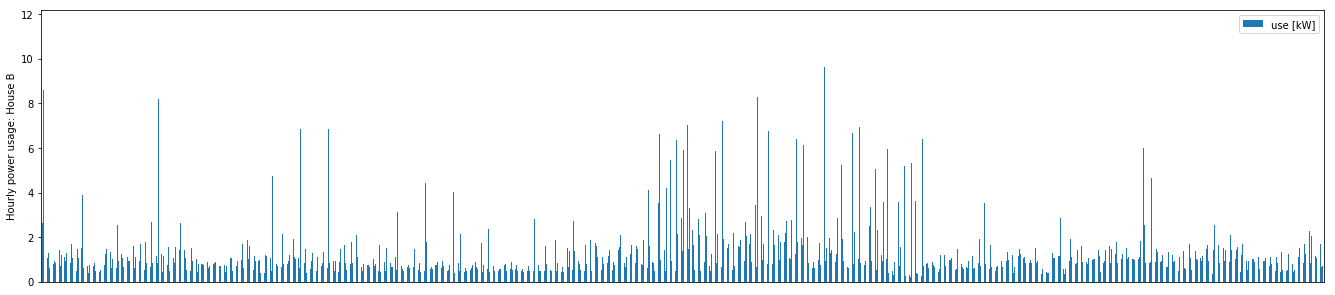

In [478]:
#plt.bar(homeb_hourly_df['Date & Time'], homeb_hourly_df['use [kW]'])
print(homeb_hourly_df['use [kW]'].describe())
plot_homeb_hourly = homeb_hourly_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homeb_hourly.xaxis.set_visible(False)
plot_homeb_hourly.set_ylabel("Hourly power usage: House B")

count    8398.000000
mean       51.540812
std        48.400143
min         0.048000
25%        25.775000
50%        40.567117
75%        61.021271
max       574.811067
Name: use [kW], dtype: float64


Text(0,0.5,'Hourly power usage: House C')

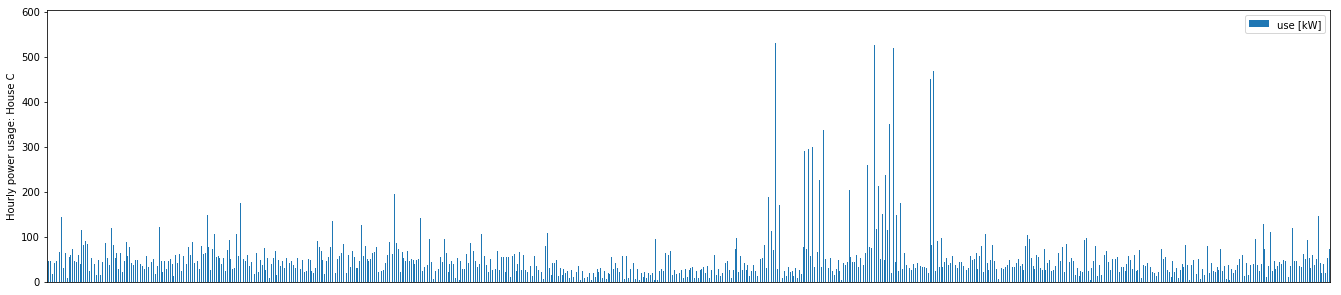

In [479]:
print(homec_hourly_df['use [kW]'].describe())
plot_homec_hourly = homec_hourly_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homec_hourly.xaxis.set_visible(False)
plot_homec_hourly.set_ylabel("Hourly power usage: House C")

count    8398.000000
mean       96.378541
std        86.243906
min         0.000000
25%        37.982413
50%        60.103283
75%       120.700233
max       581.152450
Name: Usage [kW], dtype: float64


Text(0,0.5,'Hourly power usage: House F')

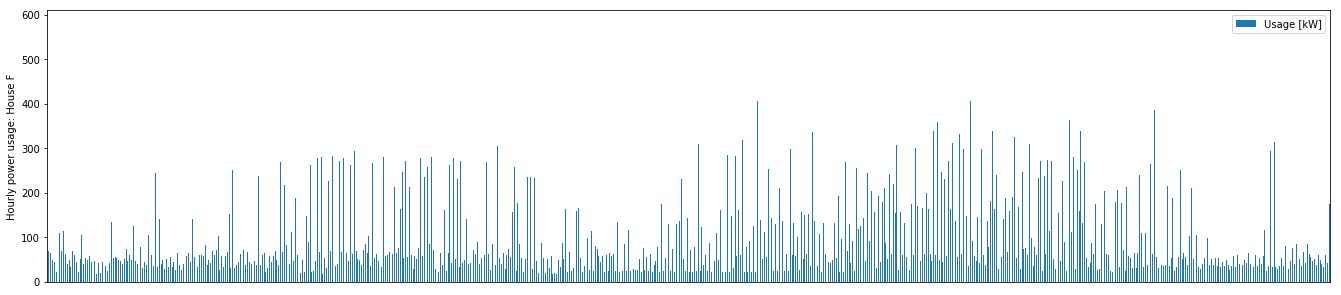

In [480]:
print(homef_hourly_df['Usage [kW]'].describe())
plot_homef_hourly = homef_hourly_df.plot(kind='bar', x = 'Date & Time', y = 'Usage [kW]',figsize=(23,5))
plot_homef_hourly.xaxis.set_visible(False)
plot_homef_hourly.set_ylabel("Hourly power usage: House F")

# # Day time/ Night time

In [481]:
homeb_hourly_df['night']=0
for i in range(homeb_hourly_df.shape[0]):
    time_hour = homeb_hourly_df['Date & Time'][i].hour
    if time_hour<=7:
        homeb_hourly_df['night'][i]=1

night_bdf = homeb_hourly_df.loc[homeb_hourly_df["night"] == 1]
day_bdf = homeb_hourly_df.loc[homeb_hourly_df["night"] == 0]
print ("Night Data")
display(night_bdf.describe())
print ("Day Data")
display(day_bdf.describe())

Night Data


use [kW]  gen [kW]    Grid [kW]       AC [kW]  Furnace [kW]  \
count  2919.000000    2919.0  2919.000000  2.919000e+03   2919.000000   
mean      1.061207       0.0     1.061207  7.869868e-02      0.185420   
std       0.801769       0.0     0.801769  5.180376e-01      0.232881   
min       0.196889       0.0     0.196889  5.560000e-07      0.017303   
25%       0.689454       0.0     0.689454  5.722200e-05      0.018683   
50%       0.874608       0.0     0.874608  1.444450e-04      0.019384   
75%       1.144213       0.0     1.144213  1.557222e-03      0.328229   
max       8.723483       0.0     8.723483  7.365221e+00      0.853546   

       Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
count         2919.000000  2919.000000              2919.000000   
mean             0.017633     0.001857                 0.013164   
std              0.015304     0.015528                 0.029235   
min              0.008471     0.000004                 0.006836   
25%              0.010793     0.000148                 0.007289   
50%              0.013319     0.000529                 0.007410   
75%              0.014184     0.000698                 0.007586   
max              0.180321     0.301174                 0.302212   

       Utility Rm + Basement Bath [kW]  Garage outlets [kW]  ...  \
count                      2919.000000          2919.000000  ...   
mean                          0.010353             0.010565  ...   
std                           0.036043             0.004261  ...   
min                           0.004026             0.009227  ...   
25%                           0.004800             0.009826  ...   
50%                           0.007488             0.009928  ...   
75%                           0.007802             0.010017  ...   
max                           0.633298             0.059629  ...   

       apparentTemperature     pressure    windSpeed   cloudCover  \
count          2919.000000  2919.000000  2919.000000  2507.000000   
mean             42.619709  1016.537276     5.613008     0.139777   
std              20.924509     7.751719     3.385064     0.239870   
min             -18.280000   980.900000     0.050000     0.000000   
25%              27.690000  1012.160000     3.110000     0.000000   
50%              44.160000  1016.440000     4.960000     0.040000   
75%              60.620000  1021.180000     7.430000     0.170000   
max              84.920000  1040.370000    19.960000     1.000000   

               time  windBearing  precipIntensity     dewPoint  \
count  2.919000e+03  2919.000000      2919.000000  2919.000000   
mean   1.404275e+09   201.499829         0.004029    37.331761   
std    9.104887e+06   105.390035         0.015943    19.995607   
min    1.388534e+09     0.000000         0.000000   -14.370000   
25%    1.396406e+09   146.000000         0.000000    24.145000   
50%    1.404274e+09   200.000000         0.000000    38.290000   
75%    1.412141e+09   295.000000         0.000000    54.535000   
max    1.420009e+09   359.000000         0.204000    71.850000   

       precipProbability   night  
count        2919.000000  2919.0  
mean            0.071319     1.0  
std             0.188989     0.0  
min             0.000000     1.0  
25%             0.000000     1.0  
50%             0.000000     1.0  
75%             0.000000     1.0  
max             0.840000     1.0  

[8 rows x 30 columns]

Day Data


use [kW]  gen [kW]    Grid [kW]      AC [kW]  Furnace [kW]  \
count  5840.000000    5840.0  5840.000000  5840.000000   5840.000000   
mean      1.458293       0.0     1.458293     0.227660      0.164987   
std       1.442442       0.0     1.442442     0.962844      0.227478   
min       0.022167       0.0     0.022167     0.000000      0.000233   
25%       0.662790       0.0     0.662790     0.000076      0.018768   
50%       1.006206       0.0     1.006206     0.000191      0.019707   
75%       1.554133       0.0     1.554133     0.001405      0.270560   
max      11.599703       0.0    11.599703     7.325216      0.866592   

       Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
count         5840.000000  5840.000000              5840.000000   
mean             0.024293     0.008273                 0.040976   
std              0.024348     0.041700                 0.068011   
min              0.000167     0.000000                 0.000700   
25%              0.010982     0.000213                 0.007262   
50%              0.013668     0.000407                 0.007466   
75%              0.028013     0.000652                 0.050815   
max              0.213497     1.053217                 0.714623   

       Utility Rm + Basement Bath [kW]  Garage outlets [kW]  ...  \
count                      5840.000000          5840.000000  ...   
mean                          0.010141             0.012566  ...   
std                           0.037382             0.006391  ...   
min                           0.000033             0.000100  ...   
25%                           0.004749             0.009654  ...   
50%                           0.007501             0.009827  ...   
75%                           0.007710             0.010081  ...   
max                           0.739755             0.059793  ...   

       apparentTemperature     pressure    windSpeed   cloudCover  \
count          5840.000000  5840.000000  5840.000000  4782.000000   
mean             46.625772  1016.408353     6.994967     0.137054   
std              23.659535     7.979250     4.033863     0.196479   
min             -16.720000   979.980000     0.030000     0.000000   
25%              28.160000  1011.250000     3.940000     0.000000   
50%              50.715000  1016.430000     6.280000     0.070000   
75%              65.872500  1021.382500     9.362500     0.210000   
max              97.520000  1042.400000    24.750000     1.000000   

               time  windBearing  precipIntensity     dewPoint  \
count  5.840000e+03  5840.000000      5840.000000  5840.000000   
mean   1.404315e+09   205.925685         0.003628    36.944185   
std    9.104420e+06   107.144832         0.015373    20.388384   
min    1.388563e+09     0.000000         0.000000   -15.870000   
25%    1.396439e+09   151.000000         0.000000    22.987500   
50%    1.404315e+09   213.000000         0.000000    38.605000   
75%    1.412191e+09   298.000000         0.000000    54.180000   
max    1.420067e+09   359.000000         0.355700    72.880000   

       precipProbability   night  
count        5840.000000  5840.0  
mean            0.064509     0.0  
std             0.180620     0.0  
min             0.000000     0.0  
25%             0.000000     0.0  
50%             0.000000     0.0  
75%             0.000000     0.0  
max             0.870000     0.0  

[8 rows x 30 columns]

In [482]:
homec_hourly_df['night']=0
for i in range(homec_hourly_df.shape[0]):
    time_hour = homec_hourly_df['Date & Time'][i].hour
    if time_hour<=7:
        homec_hourly_df['night'][i]=1

night_cdf = homec_hourly_df.loc[homec_hourly_df["night"] == 1]
day_cdf = homec_hourly_df.loc[homec_hourly_df["night"] == 0]
print ("Night Data")
display(night_cdf.describe())
print ("Day Data")
display(day_cdf.describe())

Night Data


use [kW]     gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  2799.000000  2799.000000         2799.000000      2799.000000   
mean     43.427664     0.309680           43.427664         0.483690   
std      22.469923     0.414581           22.469923         3.654831   
min      16.718267     0.054833           16.718267         0.000067   
25%      27.041308     0.186842           27.041308         0.000317   
50%      37.645417     0.204950           37.645417         0.003117   
75%      54.174750     0.255675           54.174750         0.010975   
max     379.521983     4.301567          379.521983        41.890233   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
count     2799.000000     2799.000000       2799.000000  2799.000000   
mean         6.342980        9.445490          2.842645     3.486282   
std          7.281331        7.424434          1.407417     2.537000   
min          0.651850        3.666250          1.631367     0.273550   
25%          1.235267        3.897058          2.481275     1.908667   
50%          1.265850        4.821317          2.534083     3.134667   
75%         10.057025       13.782092          2.598450     4.437117   
max         31.928683       43.145100         32.316050    18.251917   

       Wine cellar [kW]  Garage door [kW]  ...  apparentTemperature  \
count       2799.000000       2799.000000  ...          2799.000000   
mean           2.201135          0.787246  ...            46.426517   
std            2.605586          0.090867  ...            19.784428   
min            0.257583          0.723533  ...           -30.200000   
25%            0.437333          0.773550  ...            31.420000   
50%            0.501250          0.782483  ...            47.070000   
75%            3.532233          0.788942  ...            63.555000   
max           13.161200          2.344350  ...            89.720000   

          pressure    windSpeed   cloudCover          time  windBearing  \
count  2799.000000  2799.000000  2511.000000  2.799000e+03  2797.000000   
mean   1016.207449     5.645516     0.151302  1.466699e+09   199.629246   
std       7.441834     3.275034     0.207812  8.731016e+06   103.103790   
min     990.760000     0.000000     0.000000  1.451606e+09     0.000000   
25%    1011.520000     3.220000     0.030000  1.459139e+09   159.000000   
50%    1016.640000     5.110000     0.080000  1.466726e+09   199.000000   
75%    1021.140000     7.550000     0.200000  1.474256e+09   288.000000   
max    1036.480000    22.910000     1.000000  1.481785e+09   359.000000   

       precipIntensity     dewPoint  precipProbability   night  
count      2799.000000  2799.000000        2799.000000  2799.0  
mean          0.002297    39.956792           0.050632     1.0  
std           0.010954    18.651937           0.156249     0.0  
min           0.000000   -26.620000           0.000000     1.0  
25%           0.000000    26.060000           0.000000     1.0  
50%           0.000000    40.630000           0.000000     1.0  
75%           0.000000    55.780000           0.000000     1.0  
max           0.182000    74.460000           0.840000     1.0  

[8 rows x 31 columns]

Day Data


use [kW]     gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  5599.000000  5599.000000         5599.000000      5599.000000   
mean     55.596662     6.705835           55.596662         2.581275   
std      56.675725     8.309650           56.675725         8.262204   
min       0.048000     0.013000            0.048000         0.000000   
25%      24.134025     0.212675           24.134025         0.000450   
50%      42.374967     2.221083           42.374967         0.002400   
75%      66.099400    12.414075           66.099400         0.010033   
max     574.811067    32.710450          574.811067        49.475367   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
count     5599.000000     5599.000000       5599.000000  5599.000000   
mean         5.758003        7.588224          5.894752     3.977247   
std          6.812613        6.670747          6.578081     2.649775   
min          0.014000        0.004000          0.005000     0.006000   
25%          1.215100        3.945367          2.409083     2.247942   
50%          2.531800        4.128967          2.755600     3.531183   
75%          8.169850        8.210950          6.144133     5.181600   
max         53.850333       45.036250         39.994233    23.459183   

       Wine cellar [kW]  Garage door [kW]  ...  apparentTemperature  \
count       5599.000000       5599.000000  ...          5599.000000   
mean           2.691928          0.878969  ...            50.887876   
std            2.939775          0.432345  ...            22.455574   
min            0.001000          0.003000  ...           -32.080000   
25%            0.440825          0.764617  ...            33.435000   
50%            1.133100          0.775233  ...            53.140000   
75%            4.832550          0.792467  ...            69.100000   
max           46.992567         17.666050  ...           101.120000   

          pressure    windSpeed   cloudCover          time  windBearing  \
count  5599.000000  5599.000000  4858.000000  5.599000e+03  5597.000000   
mean   1016.057923     7.109652     0.152635  1.466736e+09   202.975344   
std       7.734295     4.209281     0.173150  8.728741e+06   108.903547   
min     986.400000     0.000000     0.000000  1.451635e+09     0.000000   
25%    1011.100000     3.930000     0.040000  1.459179e+09   136.000000   
50%    1016.300000     6.360000     0.100000  1.466723e+09   213.000000   
75%    1021.365000     9.620000     0.220000  1.474295e+09   297.000000   
max    1036.620000    22.850000     1.000000  1.481839e+09   359.000000   

       precipIntensity     dewPoint  precipProbability   night  
count      5599.000000  5599.000000        5599.000000  5599.0  
mean          0.002722    39.388812           0.058464     0.0  
std           0.011498    18.989119           0.169324     0.0  
min           0.000000   -27.240000           0.000000     0.0  
25%           0.000000    25.260000           0.000000     0.0  
50%           0.000000    40.890000           0.000000     0.0  
75%           0.000000    55.130000           0.000000     0.0  
max           0.191000    75.490000           0.840000     0.0  

[8 rows x 31 columns]

In [483]:
homef_hourly_df['night']=0
for i in range(homef_hourly_df.shape[0]):
    time_hour = homef_hourly_df['Date & Time'][i].hour
    if time_hour<=7:
        homef_hourly_df['night'][i]=1

night_fdf = homef_hourly_df.loc[homef_hourly_df["night"] == 1]
day_fdf = homef_hourly_df.loc[homef_hourly_df["night"] == 0]
print ("Night Data")
display(night_fdf.describe())
print ("Day Data")
display(day_fdf.describe())

Night Data


Usage [kW]  Generation [kW]  Net_Meter [kW]    Volt [kW]  \
count  2799.000000      2799.000000     2799.000000  2799.000000   
mean     58.768533         5.308447       55.779087     5.932256   
std      51.524289        14.221554       49.795956    32.806093   
min       0.000000         0.000000        0.000000     0.090967   
25%      28.933225         0.538150       28.104808     0.124167   
50%      42.426983         0.564083       39.477200     0.127433   
75%      62.028217         0.612392       58.360600     0.130600   
max     394.235933       112.571733      377.903217   234.889133   

       Garage_E [kW]  Garage_W [kW]  Phase_A [kW]  Phase_B [kW]   Solar [kW]  \
count    2799.000000    2799.000000   2799.000000   2799.000000  2799.000000   
mean        0.006182       0.026566     30.258681     28.509852     5.308447   
std         0.033693       0.026218     28.767698     25.990975    14.221554   
min         0.000000       0.007017      0.000000      0.000000     0.000000   
25%         0.000117       0.021242     12.171183     11.489217     0.538150   
50%         0.000167       0.021767     18.423333     21.622833     0.564083   
75%         0.000267       0.022550     38.847825     32.229042     0.612392   
max         0.241433       0.319283    205.835800    188.400133   112.571733   

       temperature  ...  apparentTemperature     pressure    windSpeed  \
count  2799.000000  ...          2799.000000  2799.000000  2799.000000   
mean     48.981783  ...            46.570825  1016.261790     5.665841   
std      17.125313  ...            19.840660     7.461876     3.418264   
min     -10.110000  ...           -30.070000   990.700000     0.130000   
25%      35.855000  ...            31.555000  1011.595000     3.085000   
50%      48.820000  ...            47.110000  1016.660000     5.110000   
75%      63.640000  ...            63.640000  1021.180000     7.615000   
max      84.570000  ...            89.710000  1036.390000    24.140000   

        cloudCover          time  windBearing  precipIntensity     dewPoint  \
count  2550.000000  2.799000e+03  2799.000000      2799.000000  2799.000000   
mean      0.147514  1.466699e+09   196.249732         0.002224    40.022937   
std       0.203099  8.731016e+06   106.897134         0.011434    18.712125   
min       0.000000  1.451606e+09     0.000000         0.000000   -26.920000   
25%       0.020000  1.459139e+09   146.500000         0.000000    26.190000   
50%       0.080000  1.466726e+09   196.000000         0.000000    40.580000   
75%       0.200000  1.474256e+09   290.000000         0.000000    55.920000   
max       1.000000  1.481785e+09   359.000000         0.227100    74.550000   

       precipProbability   night  
count        2799.000000  2799.0  
mean            0.047510     1.0  
std             0.152044     0.0  
min             0.000000     1.0  
25%             0.000000     1.0  
50%             0.000000     1.0  
75%             0.000000     1.0  
max             0.850000     1.0  

[8 rows x 22 columns]

Day Data


Usage [kW]  Generation [kW]  Net_Meter [kW]    Volt [kW]  \
count  5599.000000      5599.000000     5599.000000  5599.000000   
mean    115.180186       130.350218      163.799894    37.256981   
std      93.644507       157.094640      120.790411    78.168136   
min       0.000000         0.000000        0.000000     0.000000   
25%      51.467792         0.540233       56.685825     0.122900   
50%      72.561383        49.372900      133.040400     0.126900   
75%     157.853167       249.824683      260.281608     0.133733   
max     581.152450       548.452350      581.356567   235.791500   

       Garage_E [kW]  Garage_W [kW]  Phase_A [kW]  Phase_B [kW]   Solar [kW]  \
count    5599.000000    5599.000000   5599.000000   5599.000000  5599.000000   
mean        0.038337       0.050170     64.710771     50.469415   130.350218   
std         0.080083       0.064478     49.185843     46.261317   157.094640   
min         0.000000       0.001000      0.000000      0.000000     0.000000   
25%         0.000167       0.021250     29.691942     15.858192     0.540233   
50%         0.000250       0.022250     46.942283     29.262267    49.372900   
75%         0.000567       0.047233     90.588433     70.721358   249.824683   
max         0.243700       0.927517    304.012567    277.139883   548.452350   

       temperature  ...  apparentTemperature     pressure    windSpeed  \
count  5599.000000  ...          5599.000000  5599.000000  5599.000000   
mean     53.343604  ...            51.109709  1016.111507     7.178405   
std      19.621006  ...            22.515243     7.751876     4.358630   
min     -12.380000  ...           -31.700000   986.340000     0.130000   
25%      37.970000  ...            33.505000  1011.120000     3.800000   
50%      53.360000  ...            53.360000  1016.330000     6.440000   
75%      69.380000  ...            69.380000  1021.430000     9.840000   
max      94.170000  ...           100.850000  1036.460000    23.750000   

        cloudCover          time  windBearing  precipIntensity     dewPoint  \
count  4959.000000  5.599000e+03  5599.000000      5599.000000  5599.000000   
mean      0.151960  1.466736e+09   200.853545         0.002663    39.343468   
std       0.169068  8.728741e+06   111.078028         0.012226    19.029018   
min       0.000000  1.451635e+09     0.000000         0.000000   -27.590000   
25%       0.030000  1.459179e+09   121.000000         0.000000    25.225000   
50%       0.110000  1.466723e+09   210.000000         0.000000    40.850000   
75%       0.230000  1.474295e+09   299.000000         0.000000    55.100000   
max       1.000000  1.481839e+09   359.000000         0.236400    75.500000   

       precipProbability   night  
count        5599.000000  5599.0  
mean            0.054085     0.0  
std             0.164538     0.0  
min             0.000000     0.0  
25%             0.000000     0.0  
50%             0.000000     0.0  
75%             0.000000     0.0  
max             0.850000     0.0  

[8 rows x 22 columns]

# # # # Analysis - Day/Night Time

All the Houses have higher power consumption during the Day time. However, the mean power consumption of the day time in House F is comparitvely higher than its night time when compared to the other houses.

# # # Daily

count    365.000000
mean      31.819442
std       14.466709
min       10.572219
25%       21.660309
50%       27.108372
75%       37.879129
max       96.443073
Name: use [kW], dtype: float64


Text(0,0.5,'Daily power usage: House B')

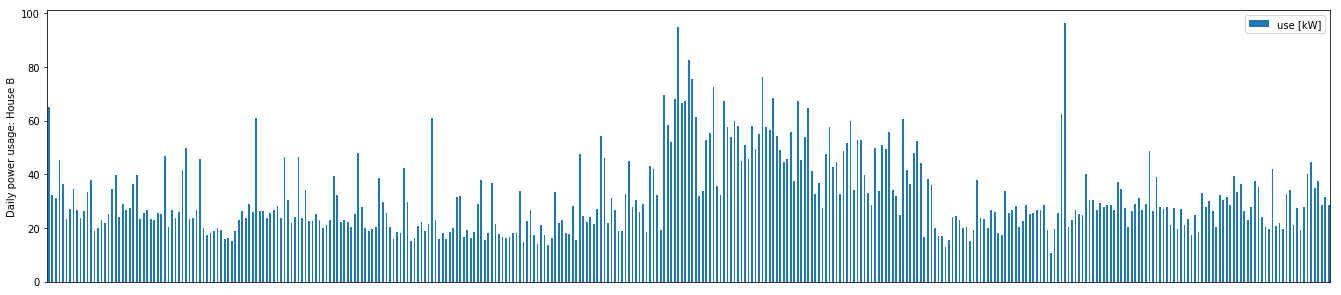

In [484]:
print(homeb_daily_df['use [kW]'].describe())
plot_homeb_daily = homeb_daily_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homeb_daily.xaxis.set_visible(False)
plot_homeb_daily.set_ylabel("Daily power usage: House B")

count     350.000000
mean     1236.684973
std       680.553565
min       430.373867
25%       818.485533
50%      1071.454292
75%      1387.455538
max      5254.366733
Name: use [kW], dtype: float64


Text(0,0.5,'Daily power usage: House C')

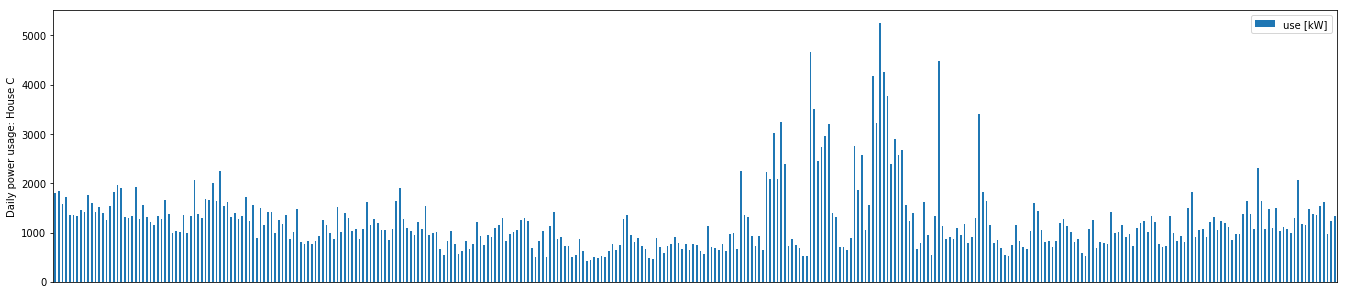

In [485]:
print(homec_daily_df['use [kW]'].describe())
plot_homec_daily = homec_daily_df.plot(kind='bar', x = 'Date & Time', y = 'use [kW]',figsize=(23,5))
plot_homec_daily.xaxis.set_visible(False)
plot_homec_daily.set_ylabel("Daily power usage: House C")

count     350.000000
mean     2312.534240
std       635.507639
min       841.572550
25%      1889.813592
50%      2278.626975
75%      2685.114629
max      4349.090050
Name: Usage [kW], dtype: float64


Text(0,0.5,'Daily power usage: House F')

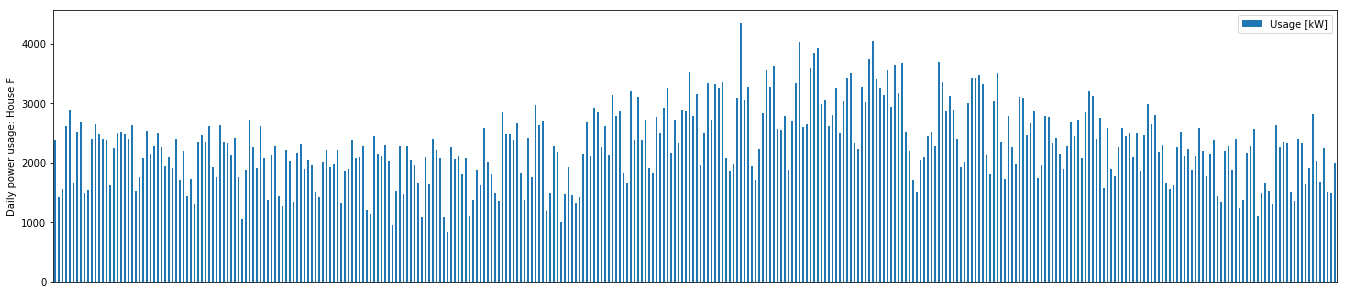

In [486]:
print(homef_daily_df['Usage [kW]'].describe())
plot_homef_daily = homef_daily_df.plot(kind='bar', x = 'Date & Time', y = 'Usage [kW]',figsize=(23,5))
plot_homef_daily.xaxis.set_visible(False)
plot_homef_daily.set_ylabel("Daily power usage: House F")

# # # Weekends

Weekend Data


use [kW]  gen [kW]   Grid [kW]     AC [kW]  Furnace [kW]  \
count  104.000000     104.0  104.000000  104.000000    104.000000   
mean    33.833365       0.0   33.833365    3.200412      3.803213   
std     15.044213       0.0   15.044213    7.923208      2.793919   
min     13.090967       0.0   13.090967    0.000812      0.427623   
25%     22.691131       0.0   22.691131    0.007526      1.302212   
50%     30.102993       0.0   30.102993    0.023451      3.828812   
75%     42.487687       0.0   42.487687    0.044402      5.720931   
max     94.781311       0.0   94.781311   38.168614     11.147332   

       Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
count          104.000000   104.000000               104.000000   
mean             0.564194     0.283010                 0.717363   
std              0.157990     0.360503                 0.542525   
min              0.323815     0.002028                 0.249503   
25%              0.445117     0.012803                 0.313338   
50%              0.522345     0.020837                 0.509004   
75%              0.658413     0.560047                 0.963340   
max              1.009337     1.687092                 3.372894   

       Utility Rm + Basement Bath [kW]  Garage outlets [kW]  \
count                       104.000000           104.000000   
mean                          0.205796             0.288969   
std                           0.178900             0.041169   
min                           0.105867             0.231849   
25%                           0.113051             0.257486   
50%                           0.182958             0.279075   
75%                           0.189083             0.311174   
max                           1.424932             0.433799   

       MBed + KBed outlets [kW]  Dryer + egauge [kW]  \
count                104.000000           104.000000   
mean                   2.086507             6.360575   
std                    1.880033             8.728466   
min                    0.001494             0.001367   
25%                    0.431782             0.002799   
50%                    1.865764             0.004048   
75%                    3.068799            10.981323   
max                   11.602281            38.739007   

       Panel GFI (central vac) [kW]  Home Office (R) [kW]  \
count                    104.000000            104.000000   
mean                       0.257551              2.563702   
std                        0.214177              1.798914   
min                        0.008077              0.000000   
25%                        0.013576              0.254894   
50%                        0.335869              3.581981   
75%                        0.346321              3.728236   
max                        1.162627              4.941033   

       Dining room (R) [kW]  Microwave (R) [kW]  Fridge (R) [kW]  weekend  
count            104.000000          104.000000       104.000000    104.0  
mean               0.199652            0.894012         3.579834      1.0  
std                0.146380            0.969516         2.130752      0.0  
min                0.000000            0.000000         0.000000      1.0  
25%                0.157346            0.223616         2.919031      1.0  
50%                0.209564            0.667430         3.936704      1.0  
75%                0.224951            1.342095         5.148011      1.0  
max                0.668127            5.932151         7.183168      1.0

Weekday Data


use [kW]  gen [kW]   Grid [kW]     AC [kW]  Furnace [kW]  \
count  261.000000     261.0  261.000000  261.000000    261.000000   
mean    31.016960       0.0   31.016960    4.698910      4.249920   
std     14.179926       0.0   14.179926   10.864271      3.128931   
min     10.572219       0.0   10.572219    0.000735      0.430862   
25%     21.307644       0.0   21.307644    0.010242      1.809262   
50%     26.706789       0.0   26.706789    0.029959      3.680652   
75%     35.541359       0.0   35.541359    0.059684      6.352981   
max     96.443073       0.0   96.443073   79.528491     12.909847   

       Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
count          261.000000   261.000000               261.000000   
mean             0.515964     0.093114                 0.778242   
std              0.170845     0.201562                 0.639236   
min              0.317791     0.001850                 0.248611   
25%              0.416768     0.005387                 0.317561   
50%              0.465159     0.014293                 0.515011   
75%              0.552594     0.020390                 0.975232   
max              1.362866     1.134358                 3.831434   

       Utility Rm + Basement Bath [kW]  Garage outlets [kW]  \
count                       261.000000           261.000000   
mean                          0.260685             0.284195   
std                           0.737776             0.044159   
min                           0.104656             0.229094   
25%                           0.115933             0.260778   
50%                           0.180819             0.278699   
75%                           0.185686             0.295604   
max                          10.092493             0.691627   

       MBed + KBed outlets [kW]  Dryer + egauge [kW]  \
count                261.000000           261.000000   
mean                   2.258210             2.103865   
std                    2.318630             5.071669   
min                    0.001671             0.001339   
25%                    0.342079             0.002648   
50%                    2.401282             0.003341   
75%                    3.368142             0.005992   
max                   17.404963            31.938131   

       Panel GFI (central vac) [kW]  Home Office (R) [kW]  \
count                    261.000000            261.000000   
mean                       0.233365              2.583110   
std                        0.157917              1.757974   
min                        0.008112              0.000000   
25%                        0.014544              0.471053   
50%                        0.336146              3.560984   
75%                        0.346123              3.716977   
max                        0.614236              4.807152   

       Dining room (R) [kW]  Microwave (R) [kW]  Fridge (R) [kW]  weekend  
count            261.000000          261.000000       261.000000    261.0  
mean               0.201413            0.666591         3.511469      0.0  
std                0.157491            0.813637         1.990758      0.0  
min                0.000000            0.000000         0.000000      0.0  
25%                0.155262            0.244826         3.174661      0.0  
50%                0.203771            0.578784         3.747944      0.0  
75%                0.223186            0.870774         4.678456      0.0  
max                1.234702            9.313185         7.097426      0.0

Text(0,0.5,'Weekday power usage: House B')

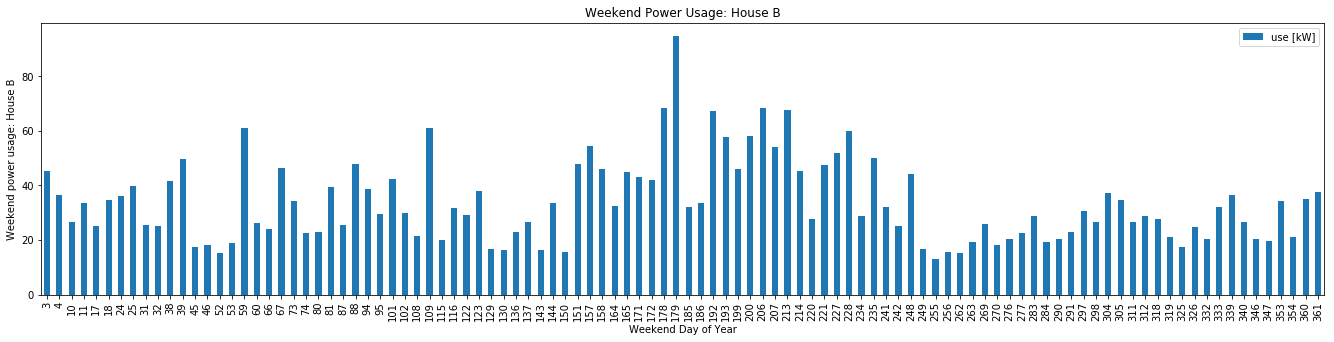

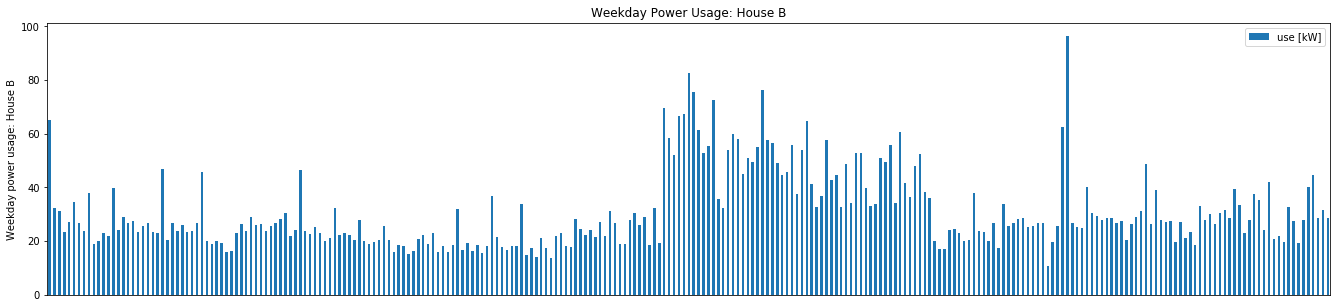

In [487]:
homeb_daily_power_df['weekend']=0
for i in range(homeb_daily_power_df.shape[0]):
    day = homeb_daily_power_df['Date & Time'][i].weekday()
    if day==5 or day==6:
        homeb_daily_power_df['weekend'][i]=1

weekendDf = homeb_daily_power_df.loc[homeb_daily_power_df["weekend"] == 1]
weekdayDf = homeb_daily_power_df.loc[homeb_daily_power_df["weekend"] == 0]
print ("Weekend Data")
display(weekendDf.describe())
print ("Weekday Data")
display(weekdayDf.describe())
plot_weekly = weekendDf.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekend Power Usage: House B')
plot_weekly.set_xlabel("Weekend Day of Year")
plot_weekly.set_ylabel("Weekend power usage: House B")
plot_weekly = weekdayDf.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekday Power Usage: House B')
plot_weekly.xaxis.set_visible(False)
plot_weekly.set_ylabel("Weekday power usage: House B")

Weekend Data


use [kW]    gen [kW]  House overall [kW]  Dishwasher [kW]  \
count   100.000000  100.000000          100.000000       100.000000   
mean   1276.000843  110.995018         1276.000843        43.425867   
std     726.745364   57.385315          726.745364        41.476206   
min     464.762867    8.685533          464.762867         0.006367   
25%     860.002738   51.500138          860.002738         0.225900   
50%    1189.342792  125.088750         1189.342792        52.159942   
75%    1481.594275  158.031296         1481.594275        70.406713   
max    5254.366733  211.167567         5254.366733       135.506733   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
count      100.000000      100.000000        100.000000   100.000000   
mean       142.758529      203.306987         99.818672    92.554251   
std        125.199261      106.295091         39.374719    25.259696   
min         29.413883       94.490667         40.462417    58.043383   
25%         35.572096       98.943896         61.517508    73.486367   
50%         93.000667      192.204592         93.992242    89.811817   
75%        226.302854      272.524479        122.124483   101.119150   
max        636.010633      580.911733        205.543283   193.406767   

       Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
count        100.000000        100.000000       100.000000       100.000000   
mean          65.865741         20.827844         3.641385         9.478102   
std           46.864638          3.370405         9.243263         5.613164   
min           15.342900         17.911950         0.809817         0.048783   
25%           35.390471         19.207246         0.890942         6.237100   
50%           45.328442         19.844033         0.946367        10.224092   
75%           86.916329         21.252133         2.666279        13.452329   
max          220.802633         41.548017        58.960783        23.087117   

       Kitchen 38 [kW]   Barn [kW]   Well [kW]  Microwave [kW]  \
count       100.000000  100.000000  100.000000      100.000000   
mean          0.013530  112.174109   24.009548       13.743031   
std           0.001696   87.984875   13.645435        9.617410   
min           0.010767   43.064450    1.353900        4.498383   
25%           0.012371   48.192787   14.999433        6.688738   
50%           0.013225   65.598158   24.036992       11.196008   
75%           0.014134  148.034067   33.626475       17.355642   
max           0.021050  400.418250   81.116567       58.443767   

       Living room [kW]  Solar [kW]  weekend  
count        100.000000  100.000000    100.0  
mean          41.339000  110.995018      1.0  
std           40.033547   57.385315      0.0  
min            1.387467    8.685533      1.0  
25%            8.669483   51.500138      1.0  
50%           35.727017  125.088750      1.0  
75%           60.739525  158.031296      1.0  
max          184.211533  211.167567      1.0

Weekday Data


use [kW]    gen [kW]  House overall [kW]  Dishwasher [kW]  \
count   250.000000  250.000000          250.000000       250.000000   
mean   1220.958625  109.253052         1220.958625        45.855279   
std     662.041155   56.558546          662.041155        33.494401   
min     430.373867    4.204083          430.373867         0.006600   
25%     816.442346   59.159358          816.442346         0.257438   
50%    1041.112975  113.860400         1041.112975        57.733933   
75%    1359.484850  155.609779         1359.484850        68.673938   
max    4662.946183  222.199667         4662.946183       170.972383   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
count      250.000000      250.000000        250.000000   250.000000   
mean       142.868838      194.374788        123.917643    91.085142   
std        121.968045      107.225050         45.715051    21.358983   
min         22.279500       91.284783         40.443700    56.726983   
25%         36.276204       98.081971         92.093333    74.054192   
50%        100.256667      163.380600        119.926833    88.126125   
75%        225.864942      266.917892        147.037837   104.482263   
max        575.864483      538.389800        378.260533   166.633383   

       Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
count        250.000000        250.000000       250.000000       250.000000   
mean          58.586021         20.168252         4.097240        10.364805   
std           38.023611          1.739308        12.087430         3.805050   
min           19.420533         17.911117         0.719083         0.055100   
25%           31.861483         19.265546         0.882588         7.947771   
50%           45.615783         19.844292         0.929000        10.485125   
75%           76.103783         20.452283         0.983121        12.939788   
max          223.158033         38.491867        77.454783        23.642150   

       Kitchen 38 [kW]   Barn [kW]   Well [kW]  Microwave [kW]  \
count       250.000000  250.000000  250.000000      250.000000   
mean          0.013463   73.104891   21.924836       16.640548   
std           0.001513   46.409454   11.380224       11.454791   
min           0.010600   42.609450    1.280550        4.236733   
25%           0.012421   47.076746   14.812050        9.174296   
50%           0.013125   51.114250   18.764792       12.413950   
75%           0.014213   76.348033   26.253704       21.139375   
max           0.018400  256.091383   77.128333       62.881817   

       Living room [kW]  Solar [kW]  weekend  
count        250.000000  250.000000    250.0  
mean          54.642307  109.253052      0.0  
std           28.876251   56.558546      0.0  
min            1.275200    4.204083      0.0  
25%           36.434008   59.159358      0.0  
50%           48.169650  113.860400      0.0  
75%           64.878462  155.609779      0.0  
max          167.569517  222.199667      0.0

Text(0,0.5,'Weekday power usage: House C')

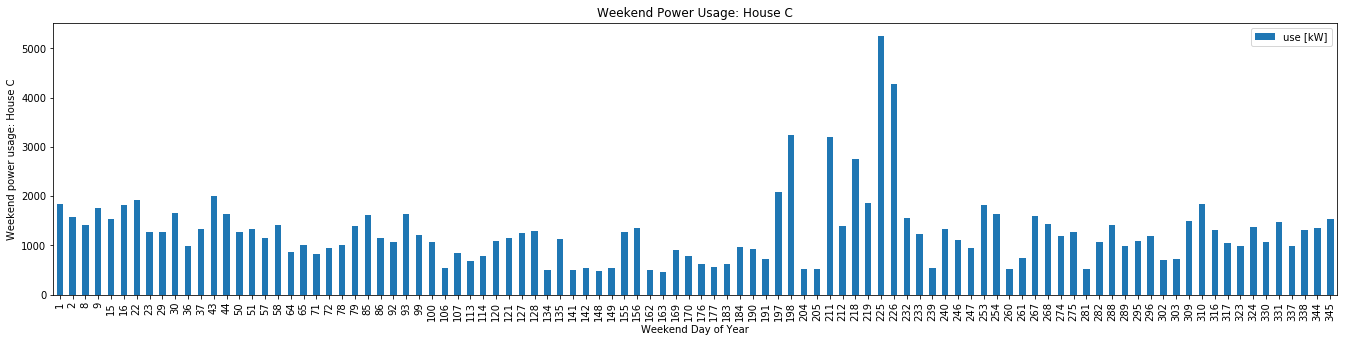

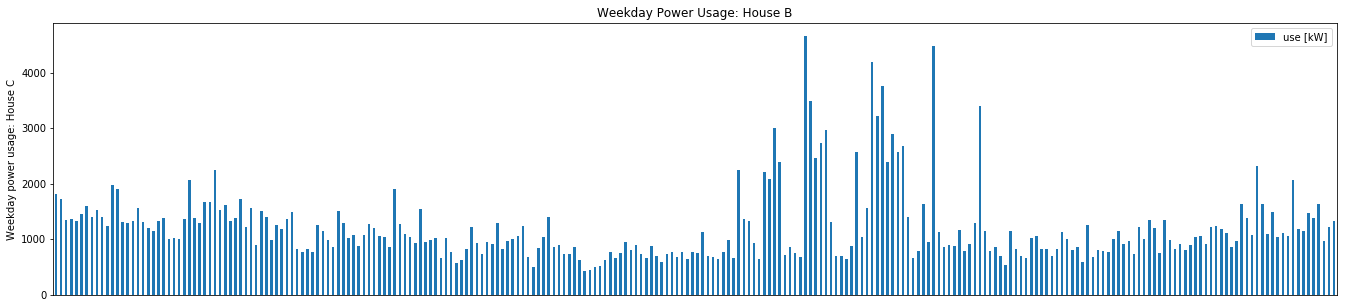

In [488]:
homec_daily_power_df['weekend'] = 0
for i in range(homec_daily_power_df.shape[0]):
    day = homec_daily_power_df['Date & Time'][i].weekday()
    if day==5 or day==6:
        homec_daily_power_df['weekend'][i]=1

weekend_cDf = homec_daily_power_df.loc[homec_daily_power_df['weekend'] == 1]
weekday_cDf = homec_daily_power_df.loc[homec_daily_power_df["weekend"] == 0]
print ("Weekend Data")
display(weekend_cDf.describe())
print ("Weekday Data")
display(weekday_cDf.describe())
plot_weekly = weekend_cDf.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekend Power Usage: House C')
plot_weekly.set_xlabel("Weekend Day of Year")
plot_weekly.set_ylabel("Weekend power usage: House C")
plot_weekly = weekday_cDf.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekday Power Usage: House B')
plot_weekly.xaxis.set_visible(False)
plot_weekly.set_ylabel("Weekday power usage: House C")

Weekend Data


Usage [kW]  Generation [kW]  Net_Meter [kW]    Volt [kW]  \
count   100.000000       100.000000      100.000000   100.000000   
mean   1910.426124      2138.343914     2617.954361   279.130444   
std     557.118007      1051.224013      763.198438   384.969316   
min     841.572550       102.629533     1045.221417     2.944633   
25%    1487.765625      1101.630487     2202.680604     3.102125   
50%    1845.576358      2312.302367     2588.008483    39.593366   
75%    2276.481367      2908.305208     3253.328938   487.270641   
max    3322.584217      3943.400650     4221.548433  1557.019367   

       Garage_E [kW]  Garage_W [kW]  Phase_A [kW]  Phase_B [kW]   Solar [kW]  \
count     100.000000     100.000000    100.000000    100.000000   100.000000   
mean        0.290789       0.890692   1063.195751    847.230372  2138.343914   
std         0.395981       0.615295    290.503320    300.005833  1051.224013   
min         0.002283       0.178450    474.349667    306.444200   102.629533   
25%         0.006492       0.530613    838.325258    602.278517  1101.630487   
50%         0.046533       0.595242   1052.699875    824.262375  2312.302367   
75%         0.501713       1.126508   1241.897088   1093.959604  2908.305208   
max         1.610367       3.621600   1826.267517   1542.433200  3943.400650   

       weekend  
count    100.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

Weekday Data


Usage [kW]  Generation [kW]  Net_Meter [kW]    Volt [kW]  \
count   250.000000       250.000000      250.000000   250.000000   
mean   2473.377486      2123.419290     3245.783326   789.172704   
std     593.086738      1098.054209      841.772543   374.589951   
min    1008.781183        11.170500      985.787150     2.804534   
25%    2101.103650      1207.092362     2589.783342   636.986358   
50%    2395.544517      2285.734950     3298.062850   948.842567   
75%    2818.178458      3027.709137     3900.444400   974.765350   
max    4349.090050      4022.852633     5158.049000  1618.636500   

       Garage_E [kW]  Garage_W [kW]  Phase_A [kW]  Phase_B [kW]   Solar [kW]  \
count     250.000000     250.000000    250.000000    250.000000   250.000000   
mean        0.811497       1.064772   1362.760319   1110.617167  2123.419290   
std         0.383808       0.511276    298.303863    326.226139  1098.054209   
min         0.002150       0.169650    538.996350    401.606583    11.170500   
25%         0.653771       0.911258   1159.682863    883.235533  1207.092362   
50%         0.977483       1.104600   1314.413600   1073.530342  2285.734950   
75%         0.999883       1.160854   1576.990983   1337.279154  3027.709137   
max         1.648183       6.714267   2324.904367   2041.720600  4022.852633   

       weekend  
count    250.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

Text(0,0.5,'Weekday power usage: House F')

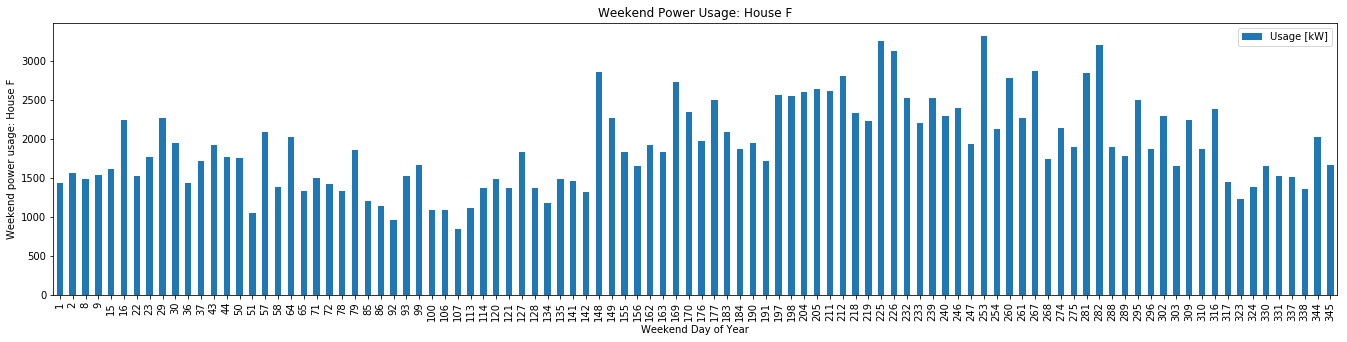

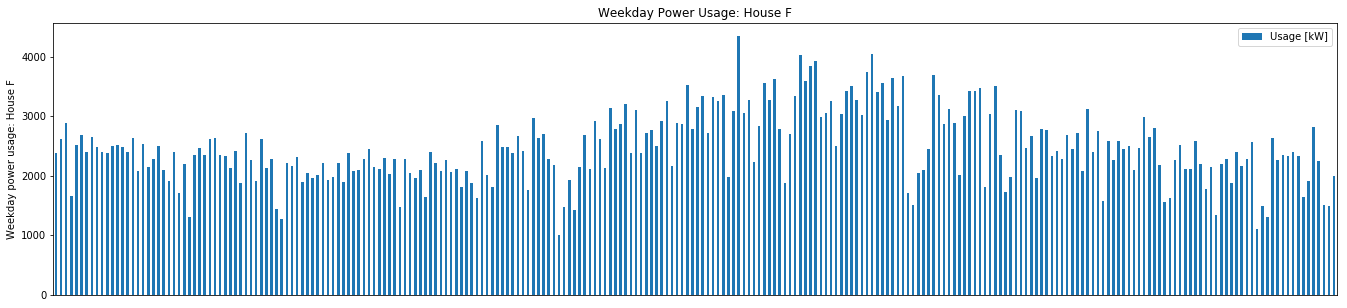

In [489]:
homef_daily_power_df['weekend'] = 0
for i in range(homef_daily_power_df.shape[0]):
    day = homef_daily_power_df['Date & Time'][i].weekday()
    if day==5 or day==6:
        homef_daily_power_df['weekend'][i]=1

weekend_fDf = homef_daily_power_df.loc[homef_daily_power_df['weekend'] == 1]
weekday_fDf = homef_daily_power_df.loc[homef_daily_power_df["weekend"] == 0]
print ("Weekend Data")
display(weekend_fDf.describe())
print ("Weekday Data")
display(weekday_fDf.describe())
plot_weekly = weekend_fDf.plot(kind='bar', y='Usage [kW]',figsize=(23,5),title='Weekend Power Usage: House F')
plot_weekly.set_xlabel("Weekend Day of Year")
plot_weekly.set_ylabel("Weekend power usage: House F")
plot_weekly = weekday_fDf.plot(kind='bar', y='Usage [kW]',figsize=(23,5),title='Weekday Power Usage: House F')
plot_weekly.xaxis.set_visible(False)
plot_weekly.set_ylabel("Weekday power usage: House F")

# # # #Analysis - Weekend

Mean Weekend Power usage is more for Home B and Home C, but for Home F, mean weekday power usage is more

# # # Weekly

count     52.000000
mean     223.348008
std       75.739687
min      125.292188
25%      175.043376
50%      195.473557
75%      240.703998
max      419.109036
Name: use [kW], dtype: float64


Text(0,0.5,'Weekly power usage: House B')

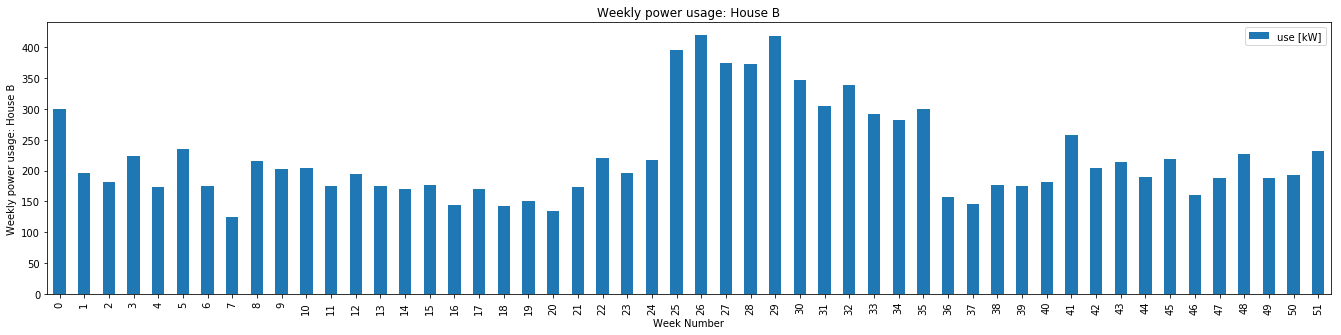

In [490]:
homeb_weekly_power_df = homeb_daily_power_df.groupby(homeb_daily_power_df["Date & Time"].dt.week).sum().reset_index()
print(homeb_weekly_power_df['use [kW]'].describe())
plot_weekly = homeb_weekly_power_df.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekly power usage: House B')
plot_weekly.set_xlabel("Week Number")
plot_weekly.set_ylabel("Weekly power usage: House B")

count       51.000000
mean      8487.053735
std       3638.271482
min       3879.041333
25%       6195.315875
50%       7725.073817
75%       9825.232367
max      22104.308783
Name: use [kW], dtype: float64


Text(0,0.5,'Weekly power usage: House C')

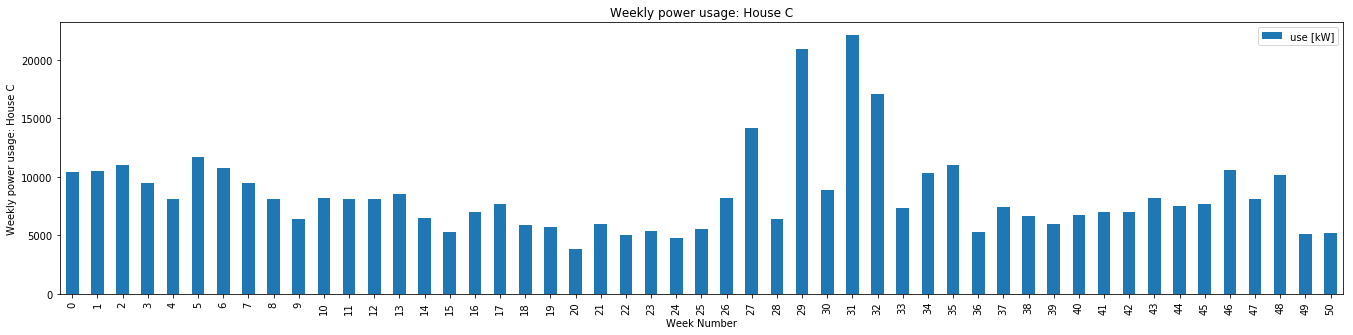

In [491]:
homec_weekly_power_df = homec_daily_power_df.groupby(homec_daily_power_df["Date & Time"].dt.week).sum().reset_index()
print(homec_weekly_power_df['use [kW]'].describe())
plot_weekly = homec_weekly_power_df.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Weekly power usage: House C')
plot_weekly.set_xlabel("Week Number")
plot_weekly.set_ylabel("Weekly power usage: House C")

count       51.000000
mean     15870.333019
std       3577.122702
min       5380.759650
25%      13488.453358
50%      15759.576950
75%      18101.961600
max      23893.800033
Name: Usage [kW], dtype: float64


Text(0,0.5,'Weekly power usage: House F')

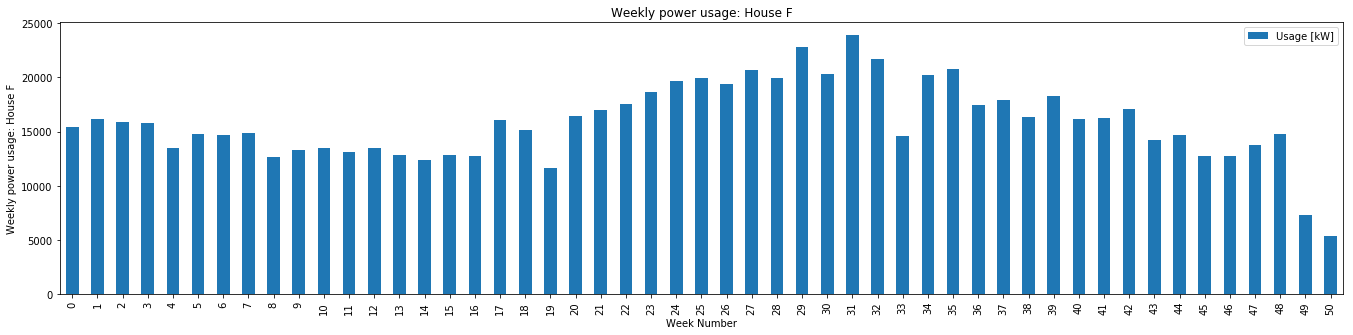

In [492]:
homef_weekly_power_df = homef_daily_power_df.groupby(homef_daily_power_df["Date & Time"].dt.week).sum().reset_index()
print(homef_weekly_power_df['Usage [kW]'].describe())
plot_weekly = homef_weekly_power_df.plot(kind='bar', y='Usage [kW]',figsize=(23,5),title='Weekly power usage: House F')
plot_weekly.set_xlabel("Week Number")
plot_weekly.set_ylabel("Weekly power usage: House F")

In [493]:
def power_comparison(homeb_df,homec_df, homef_df):
    homes=[]
    emaxs=[]
    emins=[]
    emeans=[]
    emedians=[]
    
    homes.append("B")
    emaxs.append(homeb_df['use [kW]'].max())
    emins.append(homeb_df['use [kW]'].min())
    emeans.append(homeb_df['use [kW]'].mean())
    emedians.append(homeb_df['use [kW]'].median())

    homes.append("C")
    emaxs.append(homec_df['use [kW]'].max())
    emins.append(homec_df['use [kW]'].min())
    emeans.append(homec_df['use [kW]'].mean())
    emedians.append(homec_df['use [kW]'].median())

    homes.append("F")
    emaxs.append(homef_df['Usage [kW]'].max())
    emins.append(homef_df['Usage [kW]'].min())
    emeans.append(homef_df['Usage [kW]'].mean())
    emedians.append(homef_df['Usage [kW]'].median())

    comparison = pd.DataFrame({
        'Home': homes,
        'Energy Maximum': emaxs,
        'Energy Minimum': emins,
        'Energy Mean': emeans,
        'Energy Median': emedians,
    })
    
    return comparison
    
comparison = power_comparison(homeb_weekly_power_df,homec_weekly_power_df,homef_weekly_power_df)    
display(comparison)

Home  Energy Maximum  Energy Minimum   Energy Mean  Energy Median
0    B      419.109036      125.292188    223.348008     195.473557
1    C    22104.308783     3879.041333   8487.053735    7725.073817
2    F    23893.800033     5380.759650  15870.333019   15759.576950

# # # Monthly

count      12.000000
mean      967.841366
std       305.072658
min       654.486656
25%       800.514892
50%       898.745998
75%       985.176992
max      1711.816064
Name: use [kW], dtype: float64


Text(0,0.5,'Month power usage: House B')

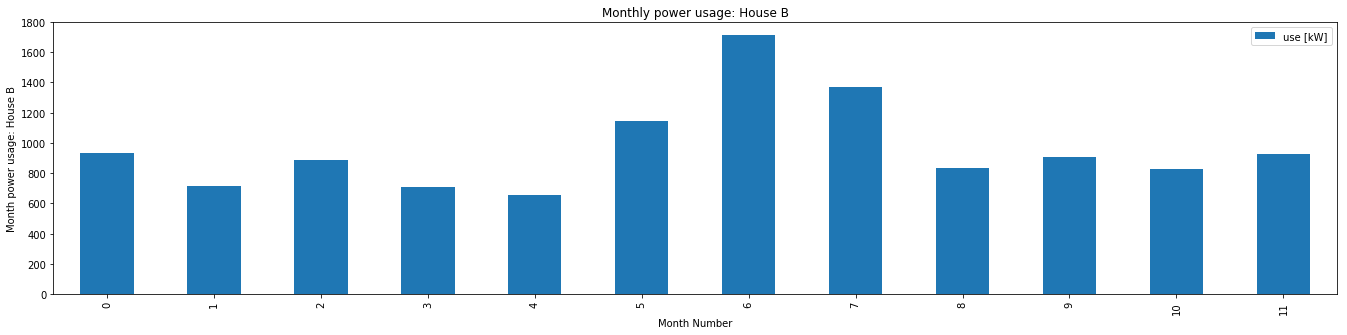

In [494]:
plot_homeb_monthly= homeb_daily_power_df.groupby(homeb_daily_power_df["Date & Time"].dt.month).sum().reset_index()
print(plot_homeb_monthly['use [kW]'].describe())
plot_monthly = plot_homeb_monthly.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Monthly power usage: House B')
plot_monthly.set_xlabel("Month Number")
plot_monthly.set_ylabel("Month power usage: House B")

count       12.000000
mean     36069.978372
std      12452.205249
min      19782.607000
25%      28690.317392
50%      32854.351533
75%      42738.032242
max      61866.223967
Name: use [kW], dtype: float64


Text(0,0.5,'Month power usage: House C')

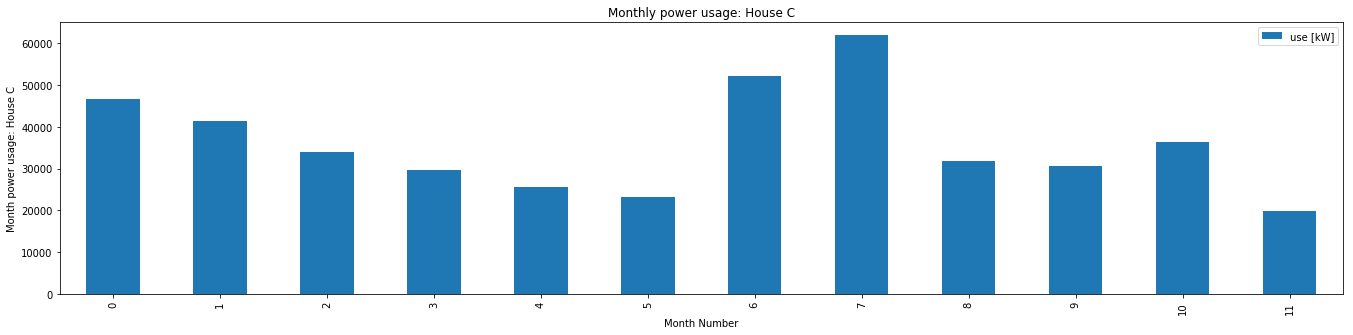

In [495]:
plot_homec_monthly= homec_daily_power_df.groupby(homec_daily_power_df["Date & Time"].dt.month).sum().reset_index()
print(plot_homec_monthly['use [kW]'].describe())
plot_monthly = plot_homec_monthly.plot(kind='bar', y='use [kW]',figsize=(23,5),title='Monthly power usage: House C')
plot_monthly.set_xlabel("Month Number")
plot_monthly.set_ylabel("Month power usage: House C")

count       12.000000
mean     67448.915329
std      17059.982556
min      29601.658967
25%      59356.484050
50%      66961.108875
75%      79328.063492
max      90444.868083
Name: Usage [kW], dtype: float64


Text(0,0.5,'Month power usage: House F')

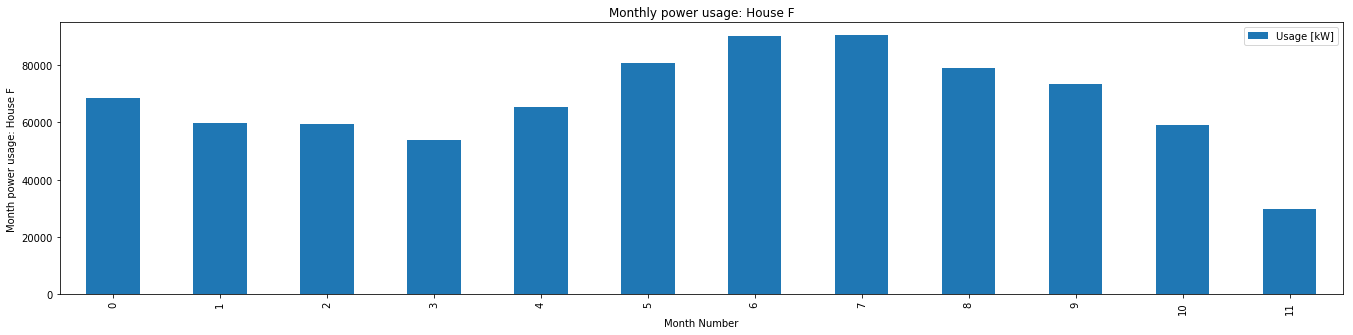

In [496]:
plot_homef_monthly= homef_daily_power_df.groupby(homef_daily_power_df["Date & Time"].dt.month).sum().reset_index()
print(plot_homef_monthly['Usage [kW]'].describe())
plot_monthly = plot_homef_monthly.plot(kind='bar', y='Usage [kW]',figsize=(23,5),title='Monthly power usage: House F')
plot_monthly.set_xlabel("Month Number")
plot_monthly.set_ylabel("Month power usage: House F")

In [497]:
comparison = power_comparison(plot_homeb_monthly,plot_homec_monthly,plot_homef_monthly)    
display(comparison)

Home  Energy Maximum  Energy Minimum   Energy Mean  Energy Median
0    B     1711.816064      654.486656    967.841366     898.745998
1    C    61866.223967    19782.607000  36069.978372   32854.351533
2    F    90444.868083    29601.658967  67448.915329   66961.108875

# # # #Analysis - Seasons/ Vacations

On Visualising the graphs, we can infer some patterns
Hourly graphs have a spiky nature which can suggest that power consumption is more during daytime than night
On looking at other graphs on a high level, house b shows that there was high power usage during summer and some anamolies of high consumption in October. After summer, we can see that there is relatively high usage in december and january as well, which could suggest heavy usage of appliances during winter too.
House C has high usage in Summer and January. Could be inferred as Winter is late here or January could be the coldest time where heating appliances might be used.
House F has the highest power consumption across all homes with November and December being the lowest. 
On all three houses, highest power consumption is in mid year, which could suggest summer months. Winter usage pattern is slightly different in all the three homes. Unrelated to season, Winter also suggests Christmas time. Could be a probability that House A has most guests during this time, which increases the relative power consumption when we see across the year. For C and F, it is slightly lower than the rest of the year.

# # Prediction Models

I have used four prediction models including linear regression, XGBoost (gradient decision trees algorithm), random forest and a time series model, ARIMA to analyze differnce between traditional and time-series models. Mean absolute error is used to compare efficiency of models. Data Sets are devided as given in the question. Training data is used for data upto November and is getting tested against December data set. We can also use Validation. We can take January - October as training data set, November as Validation Data Set and December as the Training Data set. We can also normalize the data to have better accuracy. In this assignment, I have not normalized the data since I was getting models with better accuracy than naive without doing the same. I will be using only training and testing for this assignment. Naive model is used as the baseline model as mentioned in the question which uses the last observed value as the prediction for all steps into the future.

A couple of points to consider here, the split point for Home B data set is taken as 8014 for hourly data sets which is equivalent to 334 * 24 ( days upto November * number of hours per day). For Home C and F, split point is taken as 8040 for hourly data sets which is equivalent to 335 * 24 ( days upto November * number of hours per day). Similarly for daily data set, for Home B, 334 is taken as split point and 335 for Home C and F. Also, the visualisations for all predictions have been provided to have a better visualisation on where the predictions are lying.

# Naive Model

In [498]:
models.append("Naive")

naive_type=[]
naive_mae=[]

def naivePredictionHourly(inputDF, split, home):
    power_train = inputDF[0:split]
    power_test = inputDF[split:]
    
    if (home == 'f'):
        p_train = power_train['Usage [kW]'].to_numpy()
    else:
        p_train = power_train['use [kW]'].to_numpy()
    
    power_predict = power_test.copy()
    power_predict['naive'] = p_train[split-1]
    
    return power_train,power_test,power_predict

# # # Hourly

HOME B

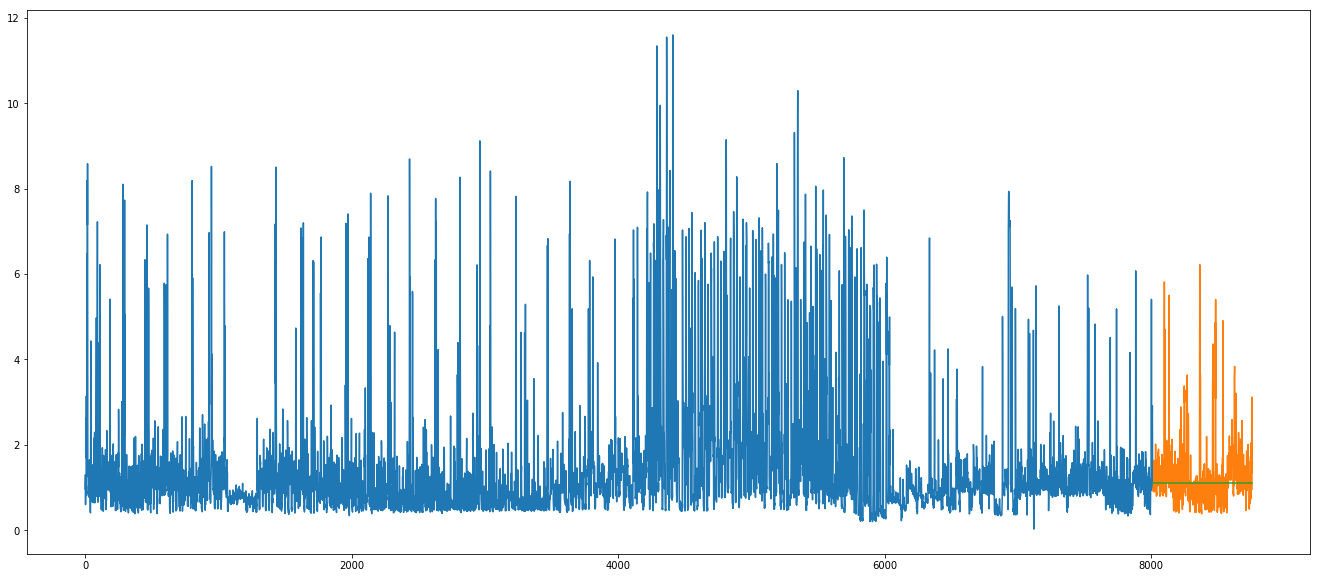

Home B Hourly MAE :  0.4795294990740242


In [499]:
power_hourly_train,power_hourly_test,power_hour_predict = naivePredictionHourly(homeb_hourly_power_df, 8016, 'b')
plt.figure(figsize=(23,10))
plt.plot(power_hourly_train.index, power_hourly_train['use [kW]'], label='Train')
plt.plot(power_hourly_test.index, power_hourly_test['use [kW]'], label='Test')
plt.plot(power_hour_predict.index, power_hour_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_hourly_test['use [kW]'], power_hour_predict['naive'])
hbhourlymae.append(error)
print("Home B Hourly MAE : ", error)
naive_type.append("Home B Hourly")
naive_mae.append(error)

HOME C

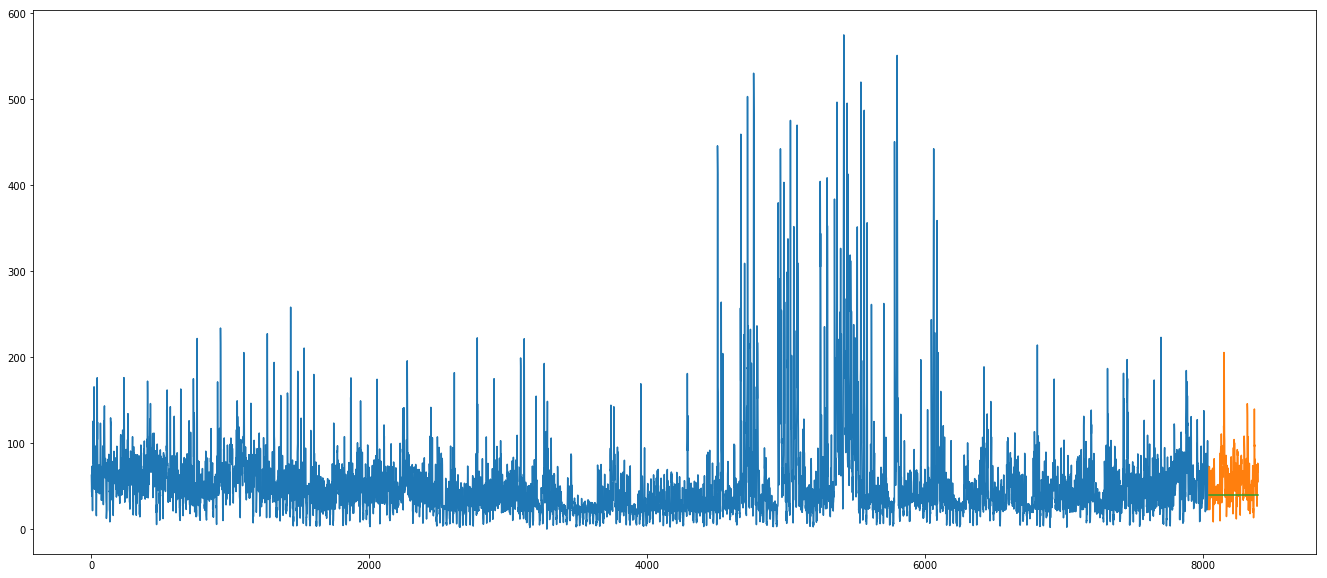

Home C Hourly MAE :  21.314182542027936


In [500]:
power_hourly_train,power_hourly_test,power_hour_predict = naivePredictionHourly(homec_hourly_power_df, 8040, 'c')
plt.figure(figsize=(23,10))
plt.plot(power_hourly_train.index, power_hourly_train['use [kW]'], label='Train')
plt.plot(power_hourly_test.index, power_hourly_test['use [kW]'], label='Test')
plt.plot(power_hour_predict.index, power_hour_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_hourly_test['use [kW]'], power_hour_predict['naive'])
hchourlymae.append(error)
print("Home C Hourly MAE : ", error)
naive_type.append("Home C Hourly")
naive_mae.append(error)

HOME F

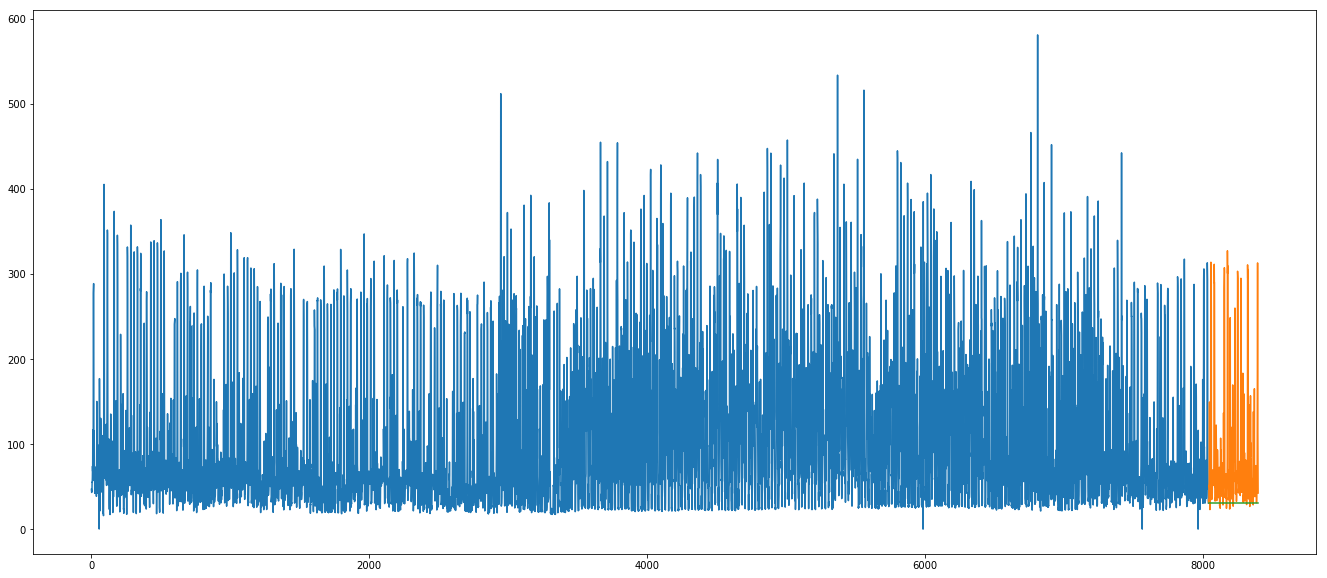

Home F Hourly MAE :  52.4850792830335


In [501]:
power_hourly_train,power_hourly_test,power_hour_predict = naivePredictionHourly(homef_hourly_power_df, 8040, 'f')
plt.figure(figsize=(23,10))
plt.plot(power_hourly_train.index, power_hourly_train['Usage [kW]'], label='Train')
plt.plot(power_hourly_test.index, power_hourly_test['Usage [kW]'], label='Test')
plt.plot(power_hour_predict.index, power_hour_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_hourly_test['Usage [kW]'], power_hour_predict['naive'])
hfhourlymae.append(error)
print("Home F Hourly MAE : ", error)
naive_type.append("Home F Hourly")
naive_mae.append(error)

# # # Daily

HOME B

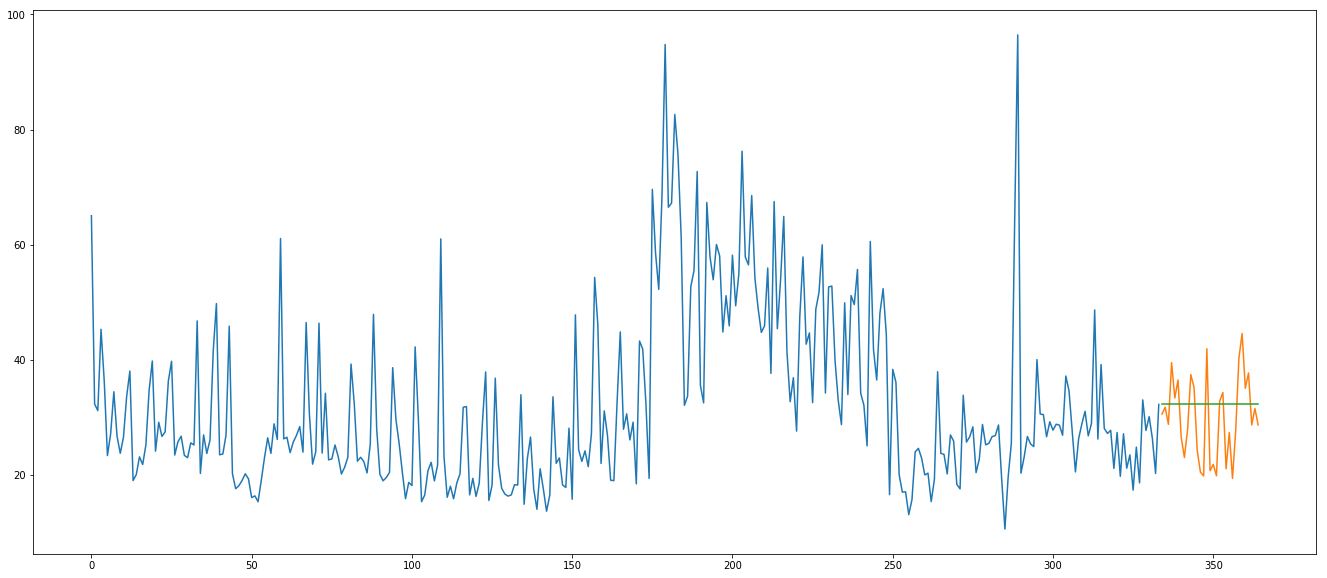

Home B Daily MAE :  6.272363512870969


In [502]:
power_daily_train,power_daily_test,power_day_predict = naivePredictionHourly(homeb_daily_power_df, 334, 'b')
plt.figure(figsize=(23,10))
plt.plot(power_daily_train.index, power_daily_train['use [kW]'], label='Train')
plt.plot(power_daily_test.index, power_daily_test['use [kW]'], label='Test')
plt.plot(power_day_predict.index, power_day_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_daily_test['use [kW]'], power_day_predict['naive'])
hbdailymae.append(error)
print("Home B Daily MAE : ", error)
naive_type.append("Home B Daily")
naive_mae.append(error)

HOME C

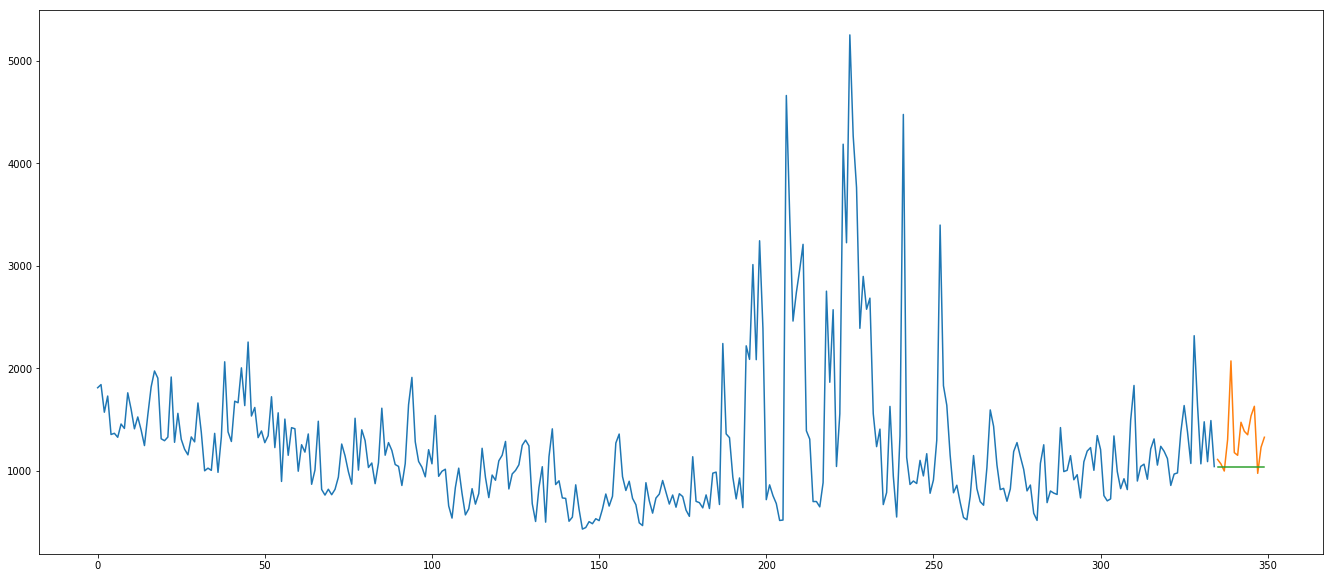

Home C Daily MAE :  292.76391332266655


In [503]:
power_daily_train,power_daily_test,power_day_predict = naivePredictionHourly(homec_daily_power_df, 335, 'c')
plt.figure(figsize=(23,10))
plt.plot(power_daily_train.index, power_daily_train['use [kW]'], label='Train')
plt.plot(power_daily_test.index, power_daily_test['use [kW]'], label='Test')
plt.plot(power_day_predict.index, power_day_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_daily_test['use [kW]'], power_day_predict['naive'])
hcdailymae.append(error)
print("Home C Daily MAE : ", error)
naive_type.append("Home C Daily")
naive_mae.append(error)

HOME F

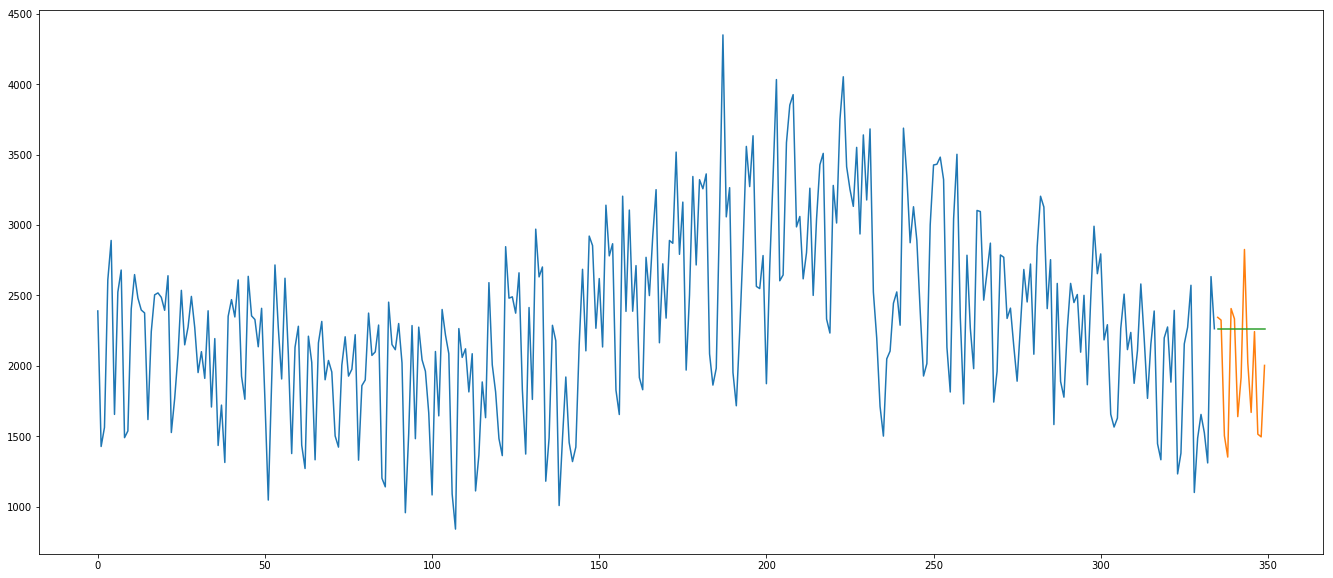

Home F Daily MAE :  412.6529211150667


In [504]:
power_daily_train,power_daily_test,power_day_predict = naivePredictionHourly(homef_daily_power_df, 335, 'f')
plt.figure(figsize=(23,10))
plt.plot(power_daily_train.index, power_daily_train['Usage [kW]'], label='Train')
plt.plot(power_daily_test.index, power_daily_test['Usage [kW]'], label='Test')
plt.plot(power_day_predict.index, power_day_predict['naive'], label='Naive Forecast')
plt.show()

error = mean_absolute_error(power_daily_test['Usage [kW]'], power_day_predict['naive'])
hfdailymae.append(error)
print("Home F Daily MAE : ", error)
naive_type.append("Home F Daily")
naive_mae.append(error)

In [505]:
print("NAIVE METHOD")

comparison = pd.DataFrame({
        'Type': naive_type,
        'MAE': naive_mae,
    })

display(comparison)

NAIVE METHOD


Type         MAE
0  Home B Hourly    0.479529
1  Home C Hourly   21.314183
2  Home F Hourly   52.485079
3   Home B Daily    6.272364
4   Home C Daily  292.763913
5   Home F Daily  412.652921

# # Co-relation

Corelation matrix is used to show the corelation coeffecients between variables. It acts as a diagnostic analysis to see patterns on features which are strongly dependendent on the feature which we are trying to predict. In all the below corelation matrices, I am using Pearson’s Product-Moment Correlation.

The diagonal line of 1 which can be seen in all the below corelation matrices shows that each variable perfectly co-relates to itself.

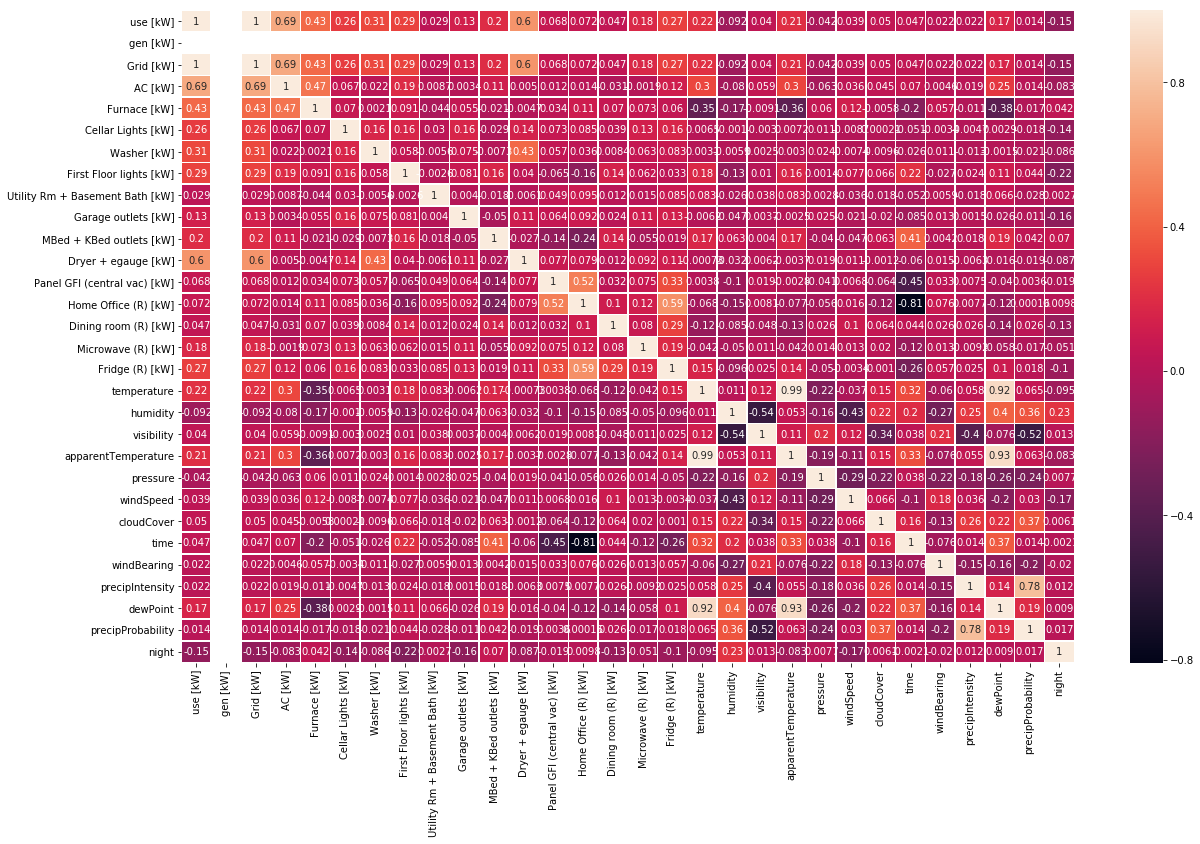

In [506]:
corr_traindf=homeb_hourly_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_traindf, annot=True, linewidths=.5)
plt.show()

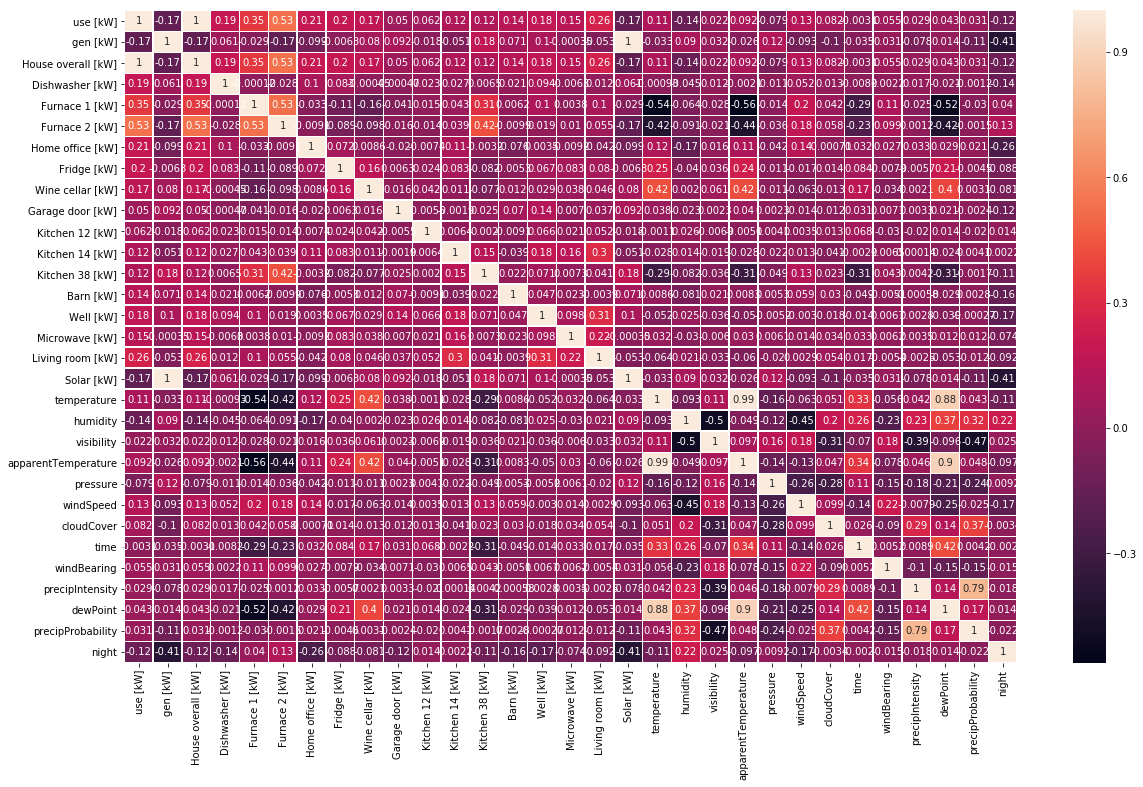

In [507]:
corr_traindf=homec_hourly_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_traindf, annot=True, linewidths=.5)
plt.show()

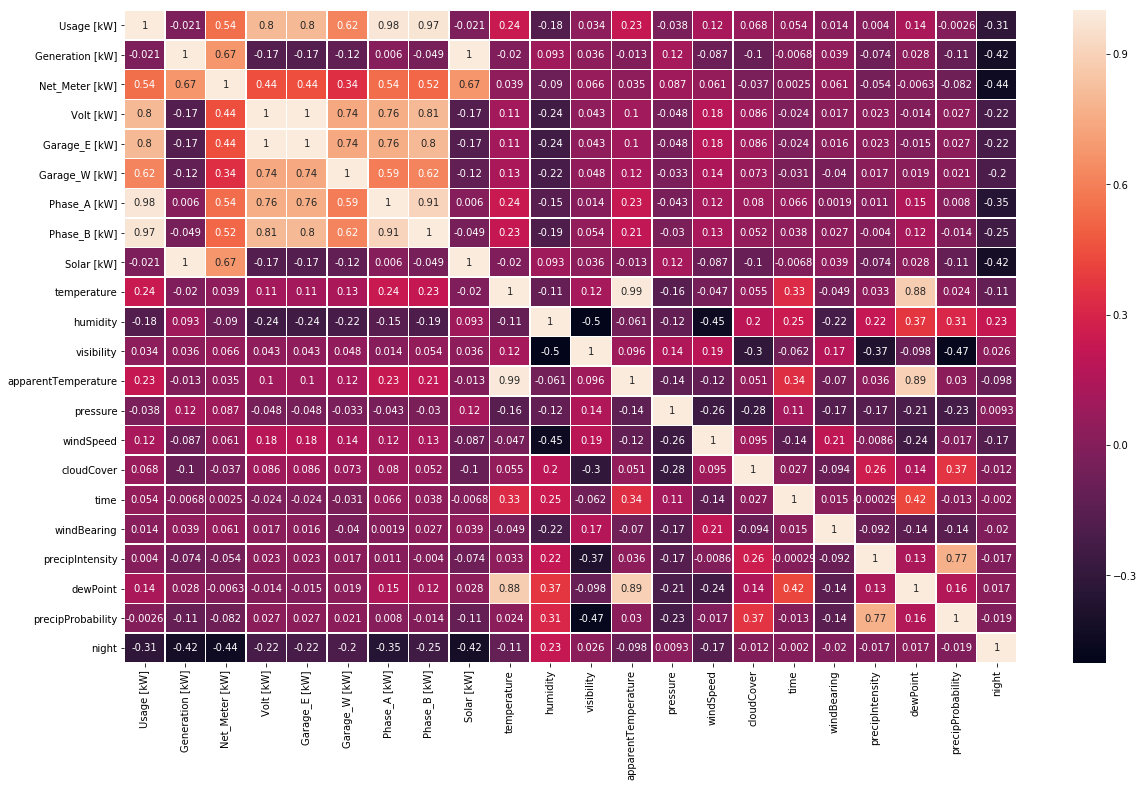

In [508]:
corr_traindf=homef_hourly_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_traindf, annot=True, linewidths=.5)
plt.show()

# # Linear Regression

From the above co-relation matrix, we are seeing that temperature, apparent temperature and dewPoint are the three major features which are effecting the power usage. Hence we have tried to train the models on all combinations of these features to get the least MAE and the best regression model. Here simple and multiple linear regressors are used for getting the best MAE among the features described above.

As discussed above training data set is taken from January - November and test data set is taken for December. We are then fitting training data to the regressor and then predicting test results using the given regressor. Then, we calculate mean absolute error for each prediction

In [509]:
models.append("Linear Regression")

regression = linear_model.LinearRegression()
linear_regression_type=[]
linear_regression_mae=[]

best_temperature_df = homeb_hourly_df

def getLinearRegressionMAE(input_df,temperature_df, split):
    kw_train = input_df[0:split]
    kw_test = input_df[split:]
    temperature_train = temperature_df[0:split]
    temperature_test = temperature_df[split:]
    regression.fit(temperature_train, kw_train)
    kw_prediction = regression.predict(temperature_test)
    error= mean_absolute_error(kw_test, kw_prediction)
    return error

def getBestLinearRegressionFeaturesDF(inputDf, split, home):
    minError = 1000
    features=[]
    linear_mae_error=[]
    
    temperature_df = inputDf[['temperature','apparentTemperature','dewPoint']]
    features.append("'temperature','apparentTemperature','dewPoint'")

    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)

    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature','apparentTemperature']]
    features.append("'temperature','apparentTemperature'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature']]
    features.append("'temperature'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['apparentTemperature']]
    features.append("'apparentTemperature'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['apparentTemperature','dewPoint']]
    features.append("'apparentTemperature','dewPoint'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)    
    
    linear_mae_error.append(error)
    
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['dewPoint']]
    features.append("'dewPoint'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature','dewPoint']]
    features.append("'temperature','dewPoint'")
    
    if (home == 'f'):
        error = getLinearRegressionMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getLinearRegressionMAE(inputDf[['use [kW]']], temperature_df, split)
    
    linear_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    finalcomparison = pd.DataFrame({
        'Features': features,
        'MAE error': linear_mae_error,
    })
    display(finalcomparison)
    return best_temperature_df

# # # Hourly

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'   0.477976
1             'temperature','apparentTemperature'   0.487377
2                                   'temperature'   0.471592
3                           'apparentTemperature'   0.472414
4                'apparentTemperature','dewPoint'   0.462008
5                                      'dewPoint'   0.495423
6                        'temperature','dewPoint'   0.461046

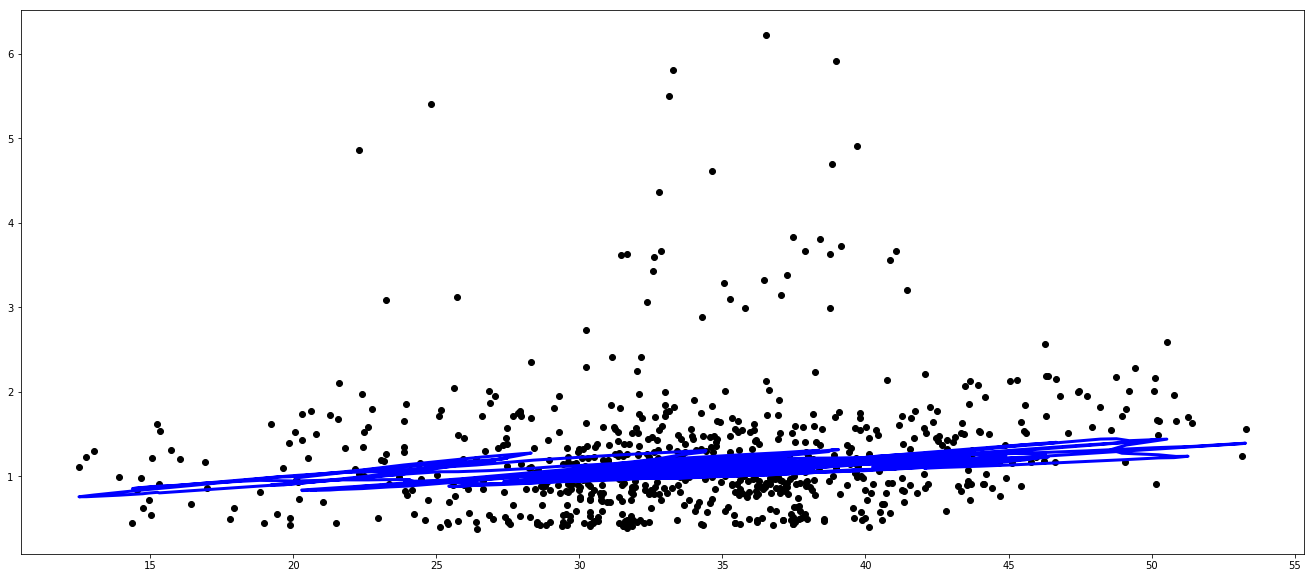

Linear Regression: Home B Hourly MAE :  0.46104649537201425


In [510]:
kw_hourly_df = homeb_hourly_df[['use [kW]']]
kw_train = kw_hourly_df[0:8016]
kw_test = kw_hourly_df[8016:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homeb_hourly_df, 8016, 'b')

temperature_train = best_temperature_df[0:8016]
temperature_test = best_temperature_df[8016:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['temperature'], kw_test,  color='black')
plt.plot(temperature_test['temperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hbhourlymae.append(error)
print("Linear Regression: Home B Hourly MAE : ", error)
linear_regression_type.append("Home B Hourly")
linear_regression_mae.append(error)

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'  19.901728
1             'temperature','apparentTemperature'  20.174424
2                                   'temperature'  19.487962
3                           'apparentTemperature'  19.417272
4                'apparentTemperature','dewPoint'  18.972826
5                                      'dewPoint'  19.193634
6                        'temperature','dewPoint'  18.970539

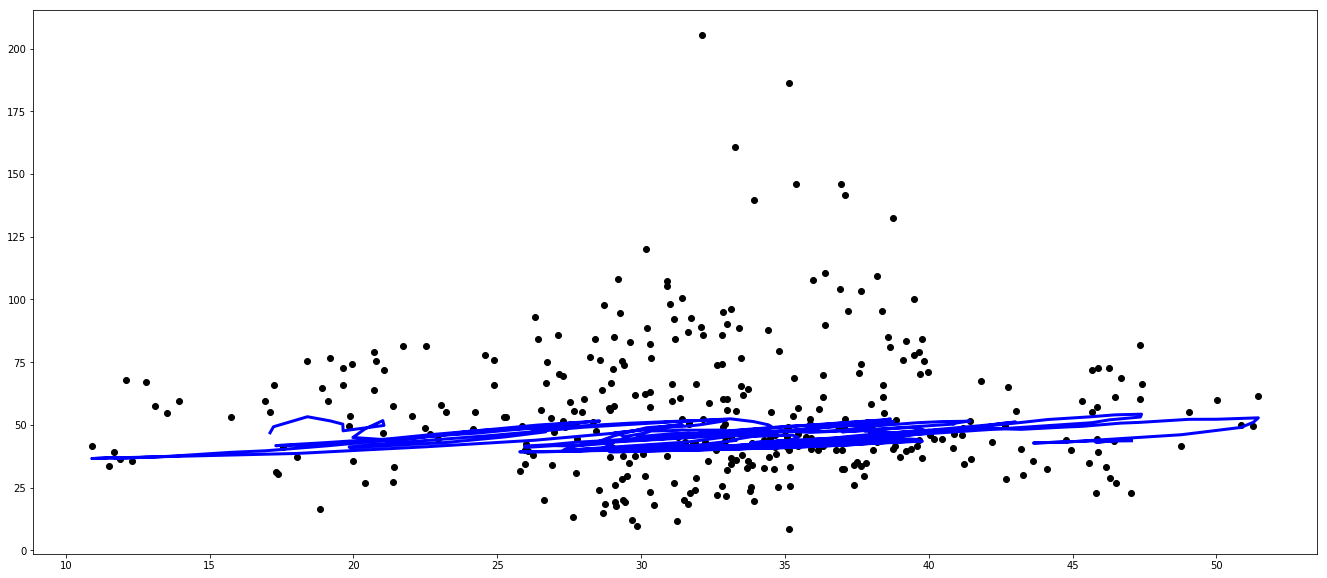

Linear Regression: Home C Hourly MAE :  18.970539021781608


In [511]:
kw_hourly_df = homec_hourly_df[['use [kW]']]
kw_train = kw_hourly_df[0:8040]
kw_test = kw_hourly_df[8040:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homec_hourly_df, 8040, 'c')

temperature_train = best_temperature_df[0:8040]
temperature_test = best_temperature_df[8040:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['temperature'], kw_test,  color='black')
plt.plot(temperature_test['temperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hchourlymae.append(error)
print("Linear Regression: Home C Hourly MAE : ", error)
linear_regression_type.append("Home C Hourly")
linear_regression_mae.append(error)

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'  43.413790
1             'temperature','apparentTemperature'  44.726998
2                                   'temperature'  44.372554
3                           'apparentTemperature'  45.328323
4                'apparentTemperature','dewPoint'  43.205572
5                                      'dewPoint'  51.108722
6                        'temperature','dewPoint'  42.508479

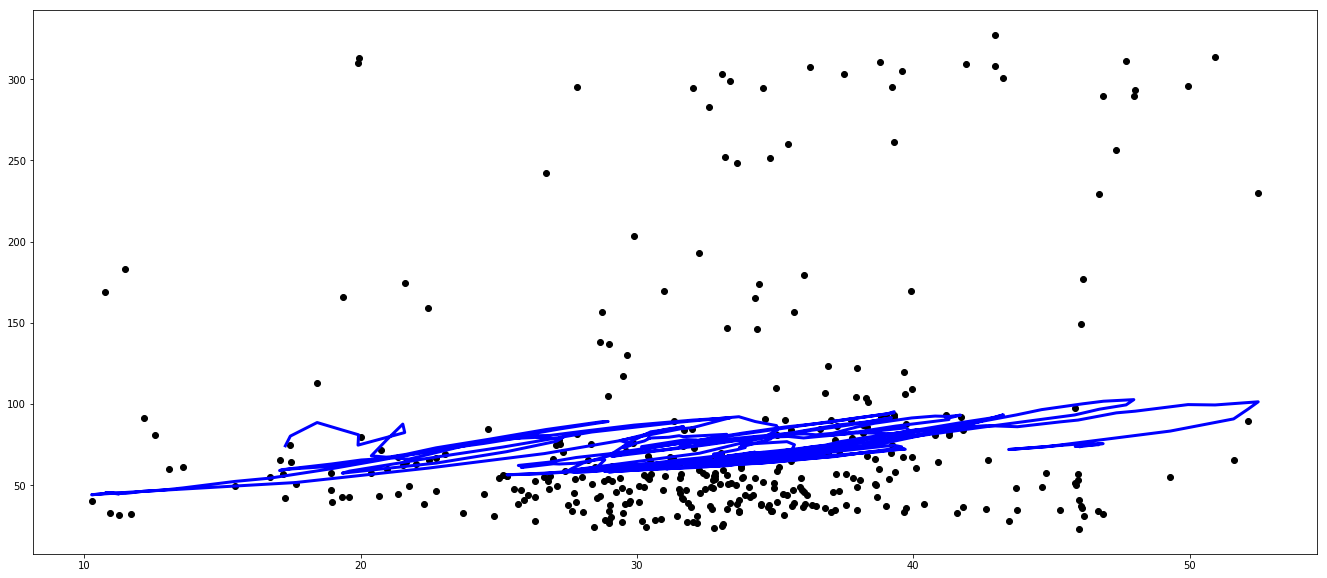

Linear Regression: Home F Hourly MAE :  42.50847911455019


In [512]:
kw_hourly_df = homef_hourly_df[['Usage [kW]']]
kw_train = kw_hourly_df[0:8040]
kw_test = kw_hourly_df[8040:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homef_hourly_df, 8040, 'f')

temperature_train = best_temperature_df[0:8040]
temperature_test = best_temperature_df[8040:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['temperature'], kw_test,  color='black')
plt.plot(temperature_test['temperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hfhourlymae.append(error)
print("Linear Regression: Home F Hourly MAE : ", error)
linear_regression_type.append("Home F Hourly")
linear_regression_mae.append(error)

# # # Daily

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'   6.387254
1             'temperature','apparentTemperature'   6.328855
2                                   'temperature'   5.965023
3                           'apparentTemperature'   5.946851
4                'apparentTemperature','dewPoint'   6.266157
5                                      'dewPoint'   6.266756
6                        'temperature','dewPoint'   5.965290

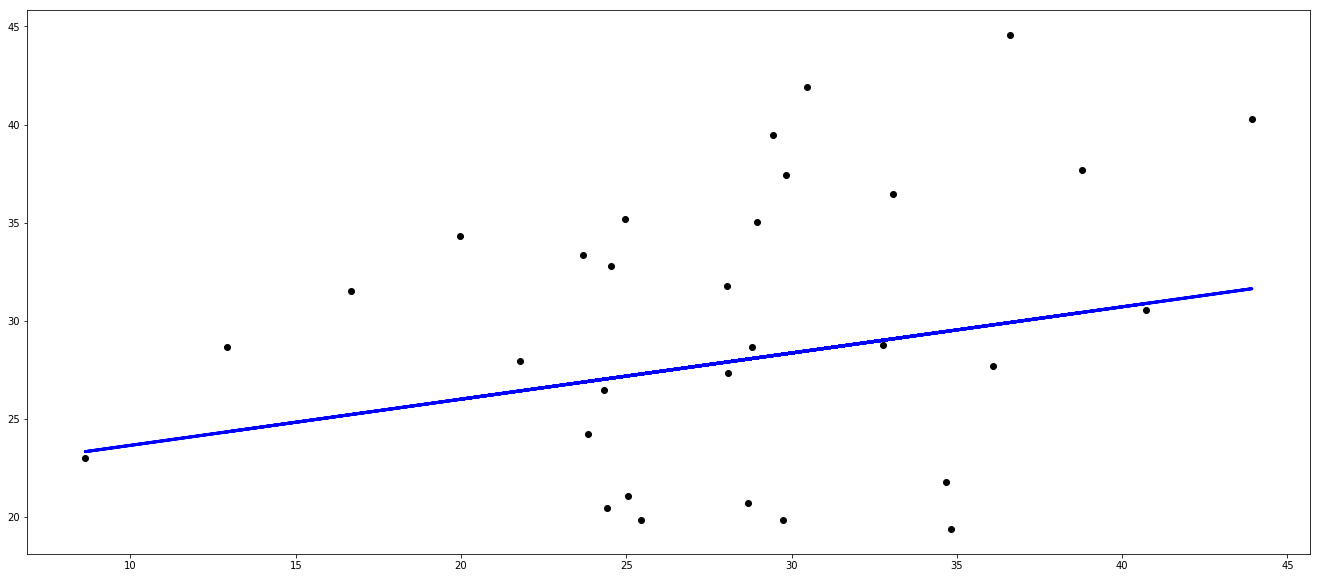

Linear Regression: Home B Daily MAE :  5.946851346016581


In [513]:
best_temperature_df = homeb_daily_df

kw_daily_df = homeb_daily_df[['use [kW]']]

kw_train = kw_daily_df[0:334]
kw_test = kw_daily_df[334:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homeb_daily_df, 334, 'b')

temperature_train = best_temperature_df[0:334]
temperature_test = best_temperature_df[334:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['apparentTemperature'], kw_test,  color='black')
plt.plot(temperature_test['apparentTemperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hbdailymae.append(error)
print("Linear Regression: Home B Daily MAE : ", error)
linear_regression_type.append("Home B Daily")
linear_regression_mae.append(error)

Features   MAE error
0  'temperature','apparentTemperature','dewPoint'  319.518725
1             'temperature','apparentTemperature'  332.591642
2                                   'temperature'  227.376885
3                           'apparentTemperature'  216.661517
4                'apparentTemperature','dewPoint'  229.253068
5                                      'dewPoint'  235.128803
6                        'temperature','dewPoint'  222.387490

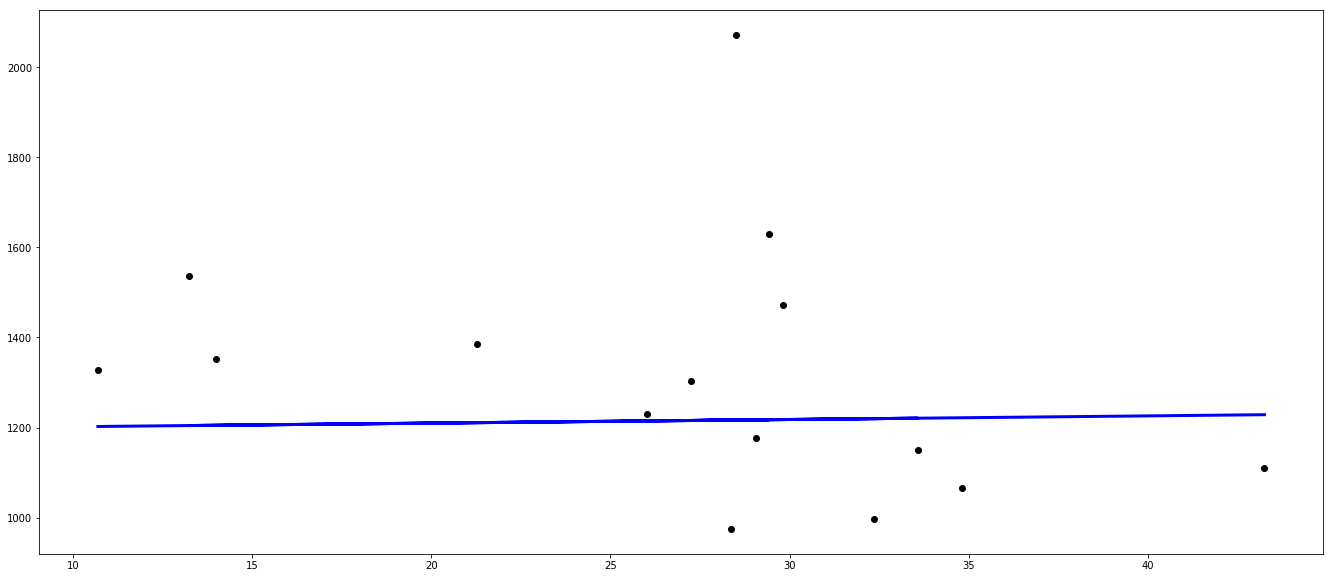

Linear Regression: Home C Daily MAE :  216.6615165948333


In [514]:
kw_daily_df = homec_daily_df[['use [kW]']]

kw_train = kw_daily_df[0:335]
kw_test = kw_daily_df[335:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homec_daily_df, 335, 'c')

temperature_train = best_temperature_df[0:335]
temperature_test = best_temperature_df[335:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test['apparentTemperature'], kw_test,  color='black')
plt.plot(temperature_test['apparentTemperature'], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hcdailymae.append(error)
print("Linear Regression: Home C Daily MAE : ", error)
linear_regression_type.append("Home C Daily")
linear_regression_mae.append(error)

Features   MAE error
0  'temperature','apparentTemperature','dewPoint'  365.840541
1             'temperature','apparentTemperature'  385.492401
2                                   'temperature'  364.394770
3                           'apparentTemperature'  366.126336
4                'apparentTemperature','dewPoint'  358.774926
5                                      'dewPoint'  359.688195
6                        'temperature','dewPoint'  361.018588

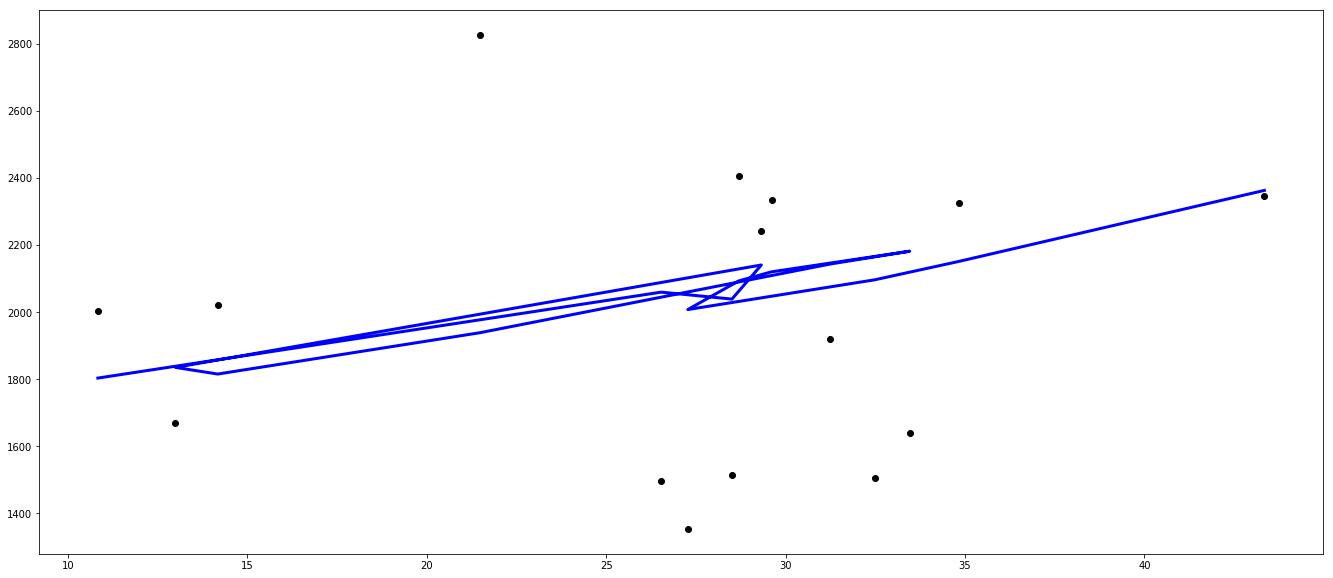

Linear Regression: Home F Daily MAE :  358.7749263258889


In [515]:
kw_daily_df = homef_daily_df[['Usage [kW]']]

kw_train = kw_daily_df[0:335]
kw_test = kw_daily_df[335:]

best_temperature_df = getBestLinearRegressionFeaturesDF(homef_daily_df, 335, 'f')

temperature_train = best_temperature_df[0:335]
temperature_test = best_temperature_df[335:]

regression.fit(temperature_train, kw_train)
kw_prediction = regression.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, kw_prediction)
hfdailymae.append(error)
print("Linear Regression: Home F Daily MAE : ", error)
linear_regression_type.append("Home F Daily")
linear_regression_mae.append(error)

In [516]:
print("Linear Regression Method")

comparison = pd.DataFrame({
        'Type': linear_regression_type,
        'MAE': linear_regression_mae,
    })

display(comparison)

Linear Regression Method


Type         MAE
0  Home B Hourly    0.461046
1  Home C Hourly   18.970539
2  Home F Hourly   42.508479
3   Home B Daily    5.946851
4   Home C Daily  216.661517
5   Home F Daily  358.774926

# # XGBoost

The XGBoost library implements the gradient boosting decision tree algorithm. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models. As discussed above training data set is taken from January - November and test data set is taken for December. We are then fitting training data to the XG Boost regressor and then predicting test results using the given regressor. Then, we calculate mean absolute error for each prediction. For parameter tuning, we are taking several features which are highly corelated with respect to other features. In our case, they are : temperature, appartentTemperature and dewPoint.

In [517]:
models.append("XGBoost")

xgboost_type=[]
xgboost_mae=[]

best_temperature_df = homeb_hourly_df

def getXGBoostMAE(input_df,temperature_df, split):
    kw_train = input_df[0:split]
    kw_test = input_df[split:]
    temperature_train = temperature_df[0:split]
    temperature_test = temperature_df[split:]
    model = XGBRegressor().fit(temperature_train,kw_train)
    prediction_XGB = model.predict(temperature_test)
    error= mean_absolute_error(kw_test, prediction_XGB)
    return error

def getBestXGBoostFeaturesDF(inputDf, split, home):
    minError = 1000
    features=[]
    xgboost_mae_error=[]
    
    temperature_df = inputDf[['temperature','apparentTemperature','dewPoint']]
    features.append("'temperature','apparentTemperature','dewPoint'")

    if (home == 'f'):
        error = getXGBoostMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getXGBoostMAE(inputDf[['use [kW]']], temperature_df, split)

    xgboost_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature','apparentTemperature']]
    features.append("'temperature','apparentTemperature'")
    
    if (home == 'f'):
        error = getXGBoostMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getXGBoostMAE(inputDf[['use [kW]']], temperature_df, split)
    
    xgboost_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature']]
    features.append("'temperature'")
    
    if (home == 'f'):
        error = getXGBoostMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getXGBoostMAE(inputDf[['use [kW]']], temperature_df, split)
    
    xgboost_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['apparentTemperature']]
    features.append("'apparentTemperature'")
    
    if (home == 'f'):
        error = getXGBoostMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getXGBoostMAE(inputDf[['use [kW]']], temperature_df, split)
    
    xgboost_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['apparentTemperature','dewPoint']]
    features.append("'apparentTemperature','dewPoint'")
    
    if (home == 'f'):
        error = getXGBoostMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getXGBoostMAE(inputDf[['use [kW]']], temperature_df, split)    
    
    xgboost_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['dewPoint']]
    features.append("'dewPoint'")
    
    if (home == 'f'):
        error = getXGBoostMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getXGBoostMAE(inputDf[['use [kW]']], temperature_df, split)
    
    xgboost_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    temperature_df = inputDf[['temperature','dewPoint']]
    features.append("'temperature','dewPoint'")
    
    if (home == 'f'):
        error = getXGBoostMAE(inputDf[['Usage [kW]']], temperature_df, split)
    else:
        error = getXGBoostMAE(inputDf[['use [kW]']], temperature_df, split)
    
    xgboost_mae_error.append(error)
    if (error < minError):
        minError = error
        best_temperature_df = temperature_df

    finalcomparison = pd.DataFrame({
        'Features': features,
        'MAE error': xgboost_mae_error,
    })
    display(finalcomparison)
    return best_temperature_df

# # # Hourly

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'   0.507786
1             'temperature','apparentTemperature'   0.512740
2                                   'temperature'   0.506709
3                           'apparentTemperature'   0.490824
4                'apparentTemperature','dewPoint'   0.515458
5                                      'dewPoint'   0.515424
6                        'temperature','dewPoint'   0.496823

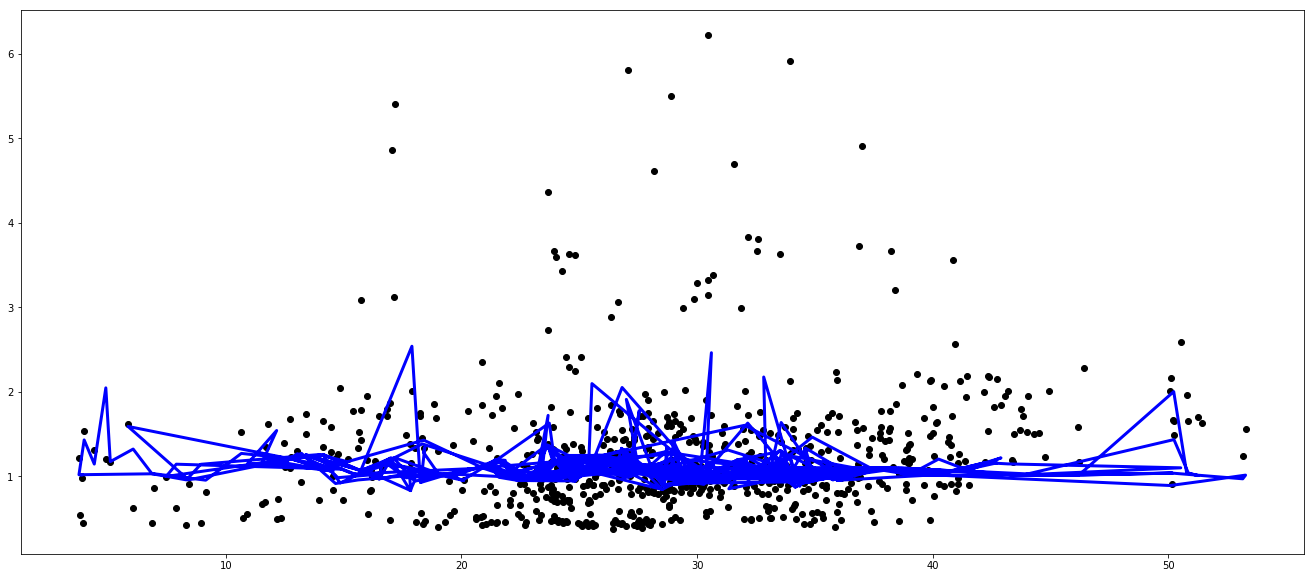

XGBoost: Home B Hourly MAE :  0.4908241770591424


In [518]:
kw_hourly_df = homeb_hourly_df[['use [kW]']]
kw_train = kw_hourly_df[0:8016]
kw_test = kw_hourly_df[8016:]

best_temperature_df = getBestXGBoostFeaturesDF(homeb_hourly_df, 8016, 'b')

temperature_train = best_temperature_df[0:8016]
temperature_test = best_temperature_df[8016:]

model = XGBRegressor().fit(temperature_train,kw_train)
prediction_XGB = model.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], prediction_XGB, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, prediction_XGB)
hbhourlymae.append(error)
print("XGBoost: Home B Hourly MAE : ", error)
xgboost_type.append("Home B Hourly")
xgboost_mae.append(error)

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'  19.853917
1             'temperature','apparentTemperature'  19.963201
2                                   'temperature'  19.581167
3                           'apparentTemperature'  19.683403
4                'apparentTemperature','dewPoint'  18.937385
5                                      'dewPoint'  19.195351
6                        'temperature','dewPoint'  19.397417

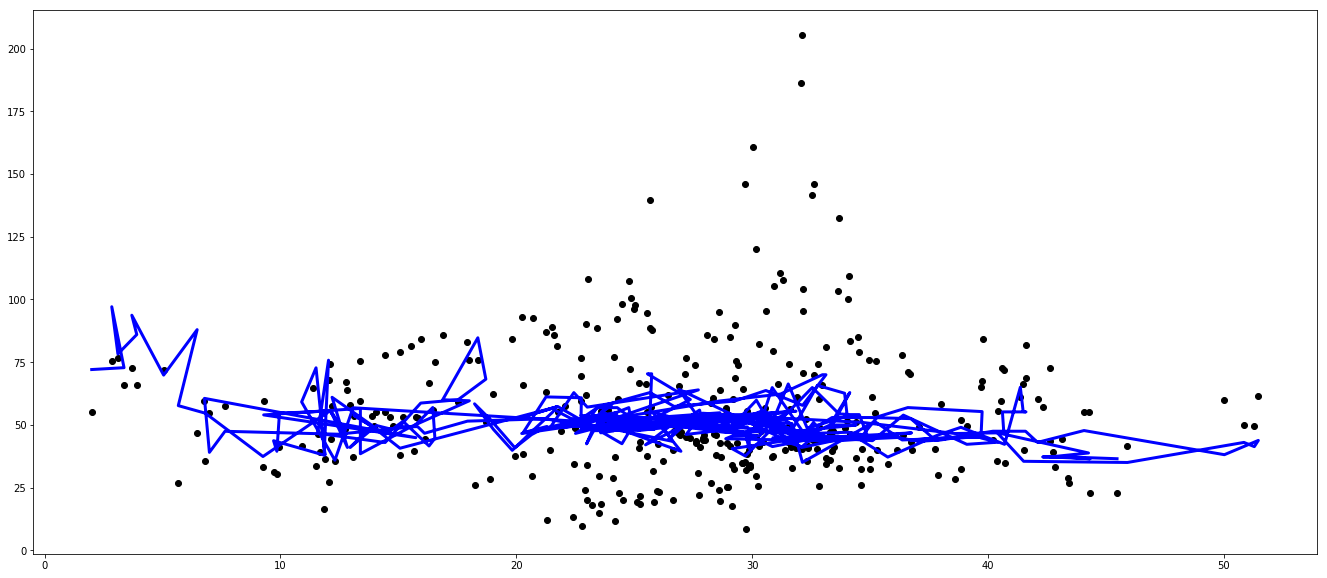

XGBoost: Home C Hourly MAE :  18.937385423918208


In [519]:
kw_hourly_df = homec_hourly_df[['use [kW]']]
kw_train = kw_hourly_df[0:8040]
kw_test = kw_hourly_df[8040:]

best_temperature_df = getBestXGBoostFeaturesDF(homec_hourly_df, 8040, 'c')

temperature_train = best_temperature_df[0:8040]
temperature_test = best_temperature_df[8040:]

model = XGBRegressor().fit(temperature_train,kw_train)
prediction_XGB = model.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], prediction_XGB, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, prediction_XGB)
hchourlymae.append(error)
print("XGBoost: Home C Hourly MAE : ", error)
xgboost_type.append("Home C Hourly")
xgboost_mae.append(error)

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'  49.491819
1             'temperature','apparentTemperature'  49.684049
2                                   'temperature'  49.962776
3                           'apparentTemperature'  47.504633
4                'apparentTemperature','dewPoint'  44.468650
5                                      'dewPoint'  50.488185
6                        'temperature','dewPoint'  48.723398

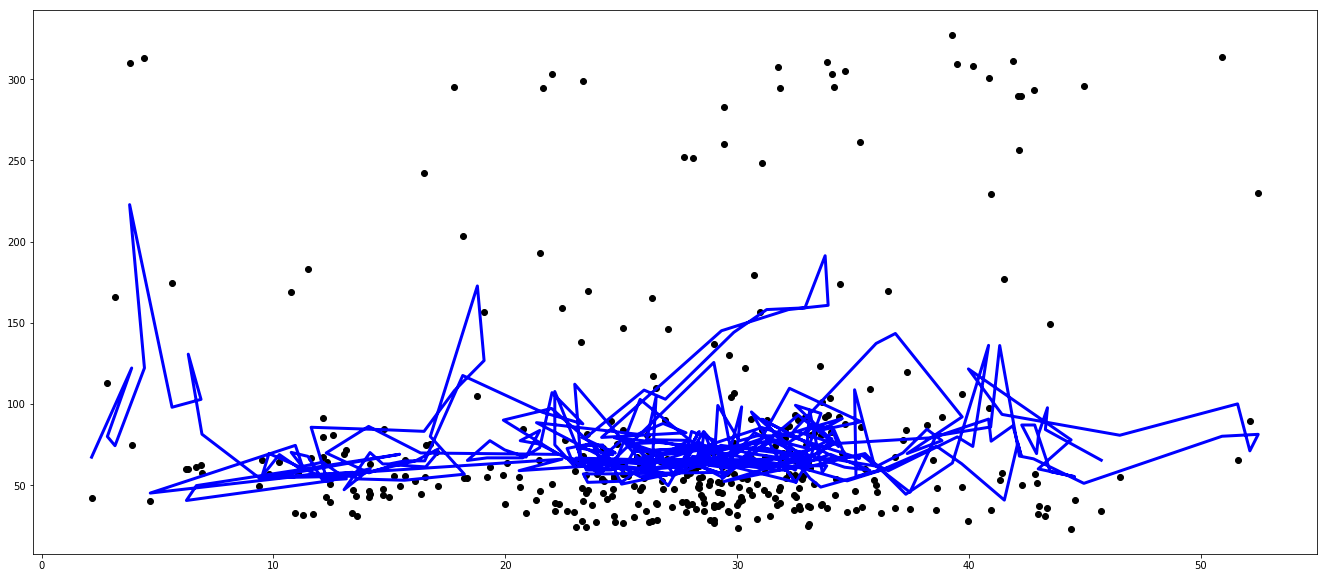

XGBoost: Home F Hourly MAE :  44.468649502440215


In [520]:
kw_hourly_df = homef_hourly_df[['Usage [kW]']]
kw_train = kw_hourly_df[0:8040]
kw_test = kw_hourly_df[8040:]

best_temperature_df = getBestXGBoostFeaturesDF(homef_hourly_df, 8040, 'f')

temperature_train = best_temperature_df[0:8040]
temperature_test = best_temperature_df[8040:]

model = XGBRegressor().fit(temperature_train,kw_train)
prediction_XGB = model.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], prediction_XGB, color='blue', linewidth=3)

plt.show()

error= mean_absolute_error(kw_test, prediction_XGB)
hfhourlymae.append(error)
print("XGBoost: Home F Hourly MAE : ", error)
xgboost_type.append("Home F Hourly")
xgboost_mae.append(error)

# # # Daily

Features  MAE error
0  'temperature','apparentTemperature','dewPoint'   8.520278
1             'temperature','apparentTemperature'   8.792680
2                                   'temperature'   8.850267
3                           'apparentTemperature'   8.566979
4                'apparentTemperature','dewPoint'   7.653215
5                                      'dewPoint'   8.358828
6                        'temperature','dewPoint'   8.788807

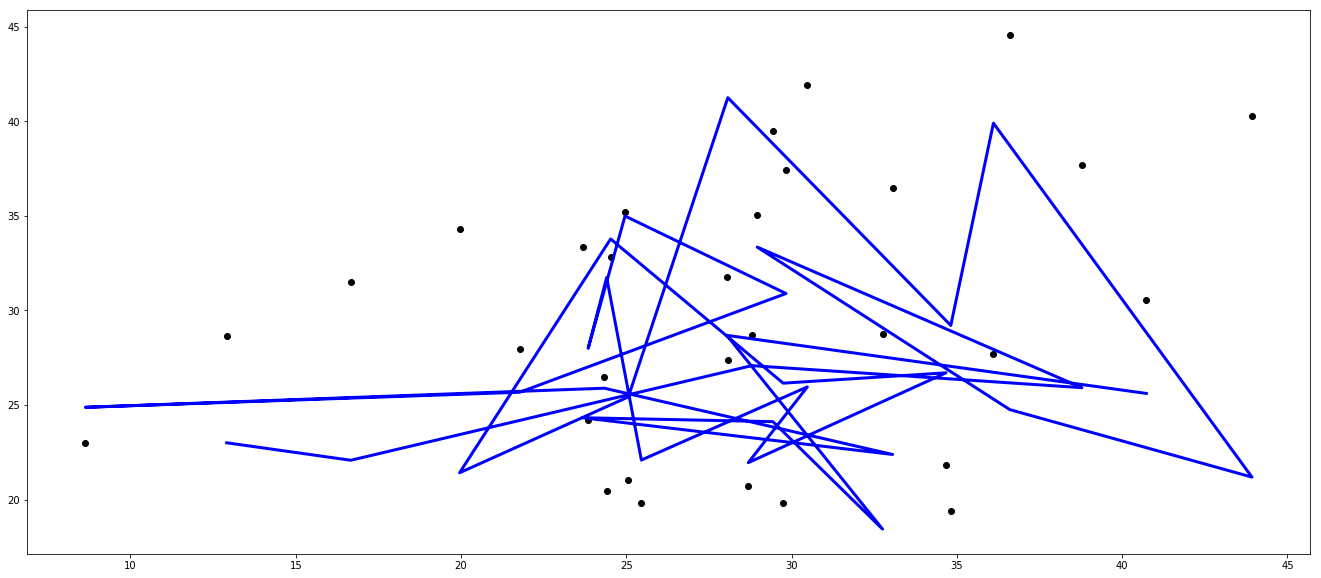

XGBoost: Home B Daily MAE :  7.653214682748991


In [521]:
best_temperature_df = homeb_daily_df

kw_daily_df = homeb_daily_df[['use [kW]']]

kw_train = kw_daily_df[0:334]
kw_test = kw_daily_df[334:]

best_temperature_df = getBestXGBoostFeaturesDF(homeb_daily_df, 334, 'b')

temperature_train = best_temperature_df[0:334]
temperature_test = best_temperature_df[334:]

model = XGBRegressor().fit(temperature_train,kw_train)
prediction_XGB = model.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], prediction_XGB, color='blue', linewidth=3)
plt.show()

error= mean_absolute_error(kw_test, prediction_XGB)
hbdailymae.append(error)
print("XGBoost: Home B Daily MAE : ", error)
xgboost_type.append("Home B Daily")
xgboost_mae.append(error)

Features   MAE error
0  'temperature','apparentTemperature','dewPoint'  242.154976
1             'temperature','apparentTemperature'  271.767675
2                                   'temperature'  240.127255
3                           'apparentTemperature'  277.527366
4                'apparentTemperature','dewPoint'  220.129492
5                                      'dewPoint'  248.127151
6                        'temperature','dewPoint'  257.303667

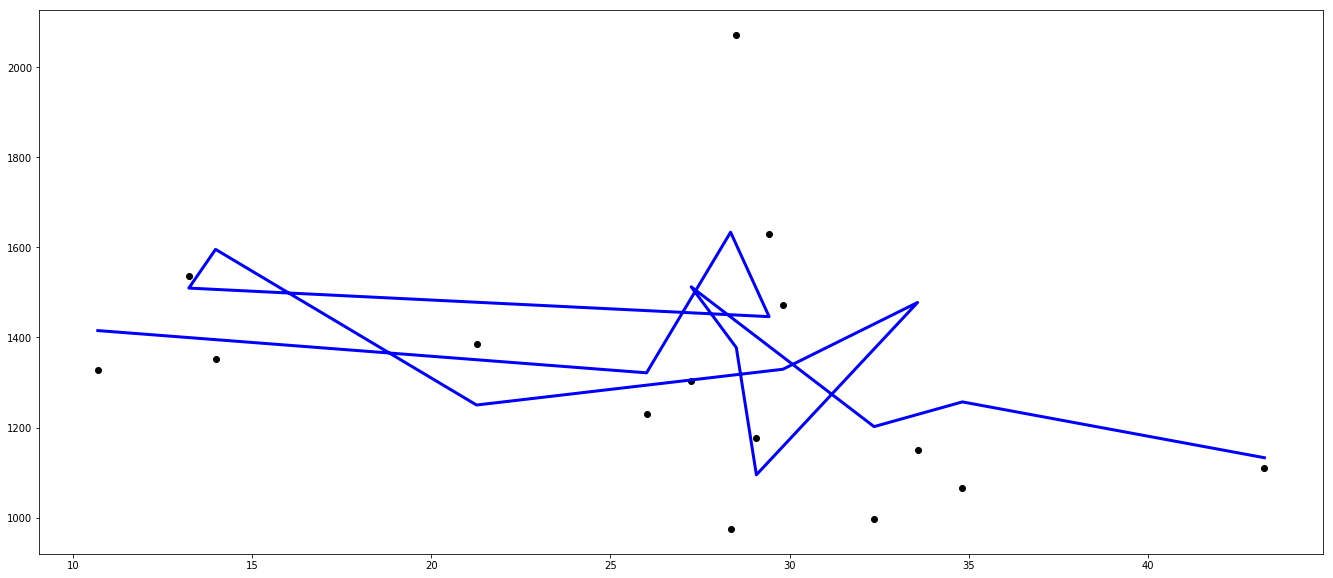

XGBoost: Home C Daily MAE :  220.12949228097906


In [522]:
best_temperature_df = homec_daily_df

kw_daily_df = homec_daily_df[['use [kW]']]

kw_train = kw_daily_df[0:335]
kw_test = kw_daily_df[335:]

best_temperature_df = getBestXGBoostFeaturesDF(homec_daily_df, 335, 'c')

temperature_train = best_temperature_df[0:335]
temperature_test = best_temperature_df[335:]

model = XGBRegressor().fit(temperature_train,kw_train)
prediction_XGB = model.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], prediction_XGB, color='blue', linewidth=3)
plt.show()

error= mean_absolute_error(kw_test, prediction_XGB)
hcdailymae.append(error)
print("XGBoost: Home C Daily MAE : ", error)
xgboost_type.append("Home C Daily")
xgboost_mae.append(error)

Features   MAE error
0  'temperature','apparentTemperature','dewPoint'  367.194634
1             'temperature','apparentTemperature'  456.299849
2                                   'temperature'  445.135323
3                           'apparentTemperature'  493.651375
4                'apparentTemperature','dewPoint'  388.558022
5                                      'dewPoint'  480.734448
6                        'temperature','dewPoint'  482.323704

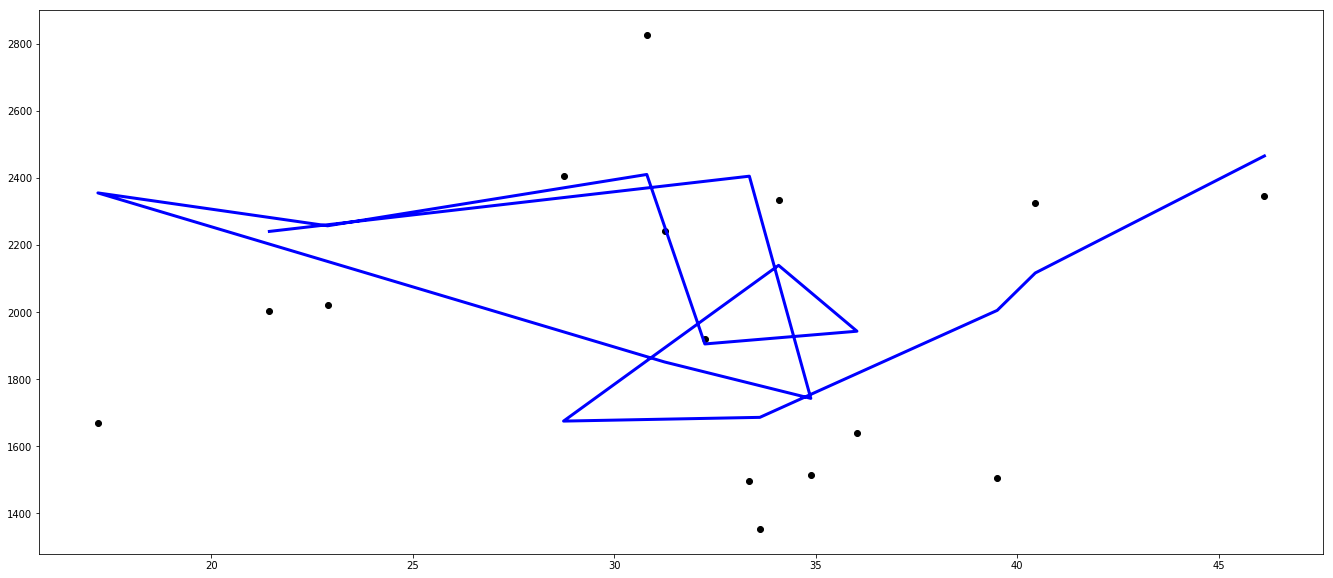

XGBoost: Home F Daily MAE :  367.19463440344157


In [523]:
best_temperature_df = homef_daily_df

kw_daily_df = homef_daily_df[['Usage [kW]']]

kw_train = kw_daily_df[0:335]
kw_test = kw_daily_df[335:]

best_temperature_df = getBestXGBoostFeaturesDF(homef_daily_df, 335, 'f')

temperature_train = best_temperature_df[0:335]
temperature_test = best_temperature_df[335:]

model = XGBRegressor().fit(temperature_train,kw_train)
prediction_XGB = model.predict(temperature_test)
plt.figure(figsize=(23,10))
plt.scatter(temperature_test[best_temperature_df.columns[0]], kw_test,  color='black')
plt.plot(temperature_test[best_temperature_df.columns[0]], prediction_XGB, color='blue', linewidth=3)
plt.show()

error= mean_absolute_error(kw_test, prediction_XGB)
hfdailymae.append(error)
print("XGBoost: Home F Daily MAE : ", error)
xgboost_type.append("Home F Daily")
xgboost_mae.append(error)

In [524]:
print("XGBoost Method")

comparison = pd.DataFrame({
        'Type': xgboost_type,
        'MAE': xgboost_mae,
    })

display(comparison)

XGBoost Method


Type         MAE
0  Home B Hourly    0.490824
1  Home C Hourly   18.937385
2  Home F Hourly   44.468650
3   Home B Daily    7.653215
4   Home C Daily  220.129492
5   Home F Daily  367.194634

# # Random Forest

Training data set is taken from January - November and test data set is taken for December. Random Forest/ Random Decsion Forest constructs decision trees at the time of training. While testing the regression, random forest gives the mean prediction of the indiviual trees. We are fitting training data to the model and then predicting test results using the given model. Finally, we calculate mean absolute error for each prediction. 

Some parameters of Random Forest regression are max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split, bootstrap, oob_score, n_jobs, random_state, verbose, warm_start, ccp_alpha, max_samples.
In my random forest regression, I am only tuning max_depth paramter to show the differnces which happens on various values of max_depth. Optimal value of tree depth is chosen based on optimal value of mean absolute error on validation set. If this parameter is not set, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [525]:
models.append("Random Forest")

best_temperature_df = homeb_hourly_df
depth = 0
randomforest_type=[]
randomforest_mae=[]

def getBestRandomForestDF(input_df, split, home):
    minError = 1000
    features=[]
    random_mae_error=[]
    random_depth=[]
    
    inputDf = input_df.copy()
    
    if (home == 'f'):
        power = inputDf[['Usage [kW]']]
    else:
        power = inputDf[['use [kW]']]
    
    power_train = power[0:split]
    power_test = power[split:]
    i = 1;
    while (i<=10):
        regr = RandomForestRegressor(max_depth=i)  
    
        temperature_df = inputDf[['temperature','apparentTemperature','dewPoint']]
        features.append("'temperature','apparentTemperature','dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]

        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['temperature','apparentTemperature']]
        features.append("'temperature','apparentTemperature'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['temperature']]
        features.append("'temperature'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['apparentTemperature']]
        features.append("'apparentTemperature'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['dewPoint']]
        features.append("'dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['apparentTemperature','dewPoint']]
        features.append("'apparentTemperature','dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i

        temperature_df = inputDf[['temperature','dewPoint']]
        features.append("'temperature','dewPoint'")
        temp_train = temperature_df[0:split]
        temp_test = temperature_df[split:]
        regr.fit(temp_train, power_train)
        kw_prediction = regr.predict(temp_test)
        error = mean_absolute_error(power_test, kw_prediction)
        random_mae_error.append(error)
        random_depth.append(i)
        if (error < minError):
            minError = error
            best_temperature_df = temperature_df
            depth = i
        
        i=i+1
        
    finalcomparison = pd.DataFrame({
        'Depth': random_depth,
        'Features': features,
        'MAE error': random_mae_error,
    })
    display(finalcomparison)
    return best_temperature_df, depth


# # # Hourly

In [526]:
best_temperature_df, depth = getBestRandomForestDF(homeb_hourly_df, 8016, 'b')
power = homeb_hourly_df[['use [kW]']]
power_train = power[0:8016]
power_test = power[8016:]
temp_train = best_temperature_df[0:8016]
temp_test = best_temperature_df[8016:]
regr = RandomForestRegressor(max_depth=depth)  
regr.fit(temp_train, power_train)
kw_prediction = regr.predict(temp_test)
error = mean_absolute_error(power_test, kw_prediction) 

Depth                                        Features  MAE error
0       1  'temperature','apparentTemperature','dewPoint'   0.488458
1       1             'temperature','apparentTemperature'   0.489530
2       1                                   'temperature'   0.489338
3       1                           'apparentTemperature'   0.489532
4       1                                      'dewPoint'   0.488461
..    ...                                             ...        ...
65     10                                   'temperature'   0.480089
66     10                           'apparentTemperature'   0.485576
67     10                                      'dewPoint'   0.491176
68     10                'apparentTemperature','dewPoint'   0.484935
69     10                        'temperature','dewPoint'   0.478495

[70 rows x 3 columns]

Index(['temperature', 'apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 7


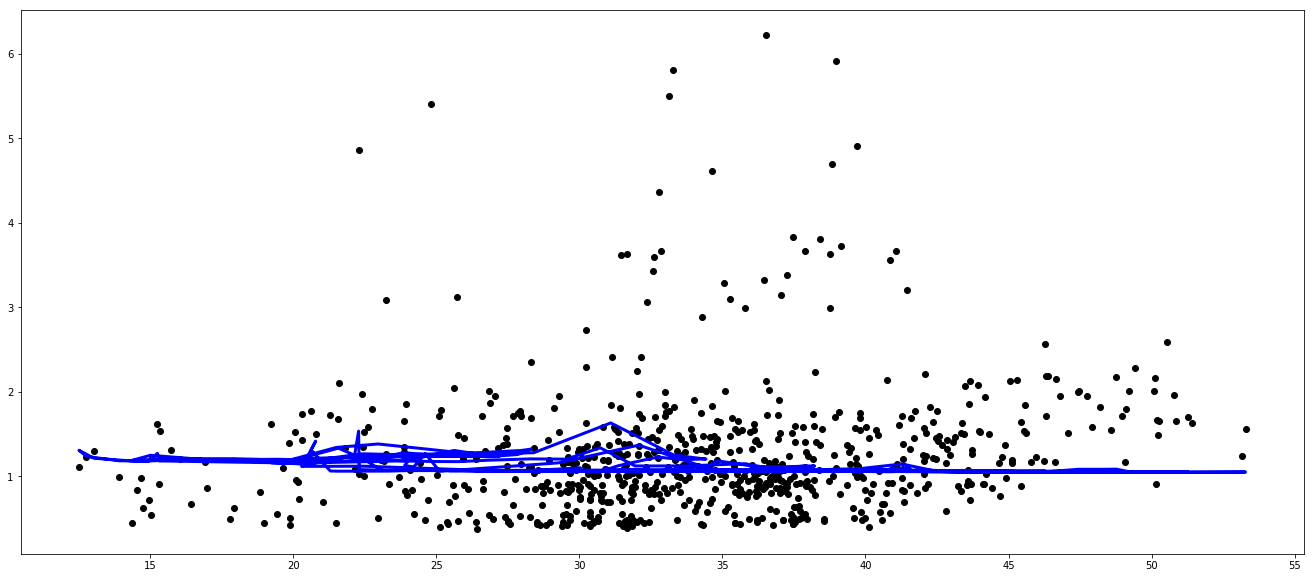

Random Forest: Home B Hourly MAE:  0.47817633249843683


In [527]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[best_temperature_df.columns[0]], power_test,  color='black')
plt.plot(temp_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)
plt.show()

print("Random Forest: Home B Hourly MAE: ",error)
hbhourlymae.append(error)
randomforest_type.append("Home B Hourly")
randomforest_mae.append(error)

In [528]:
best_temperature_df, depth = getBestRandomForestDF(homec_hourly_df, 8040, 'c')
power = homec_hourly_df[['use [kW]']]
power_train = power[0:8040]
power_test = power[8040:]
temp_train = best_temperature_df[0:8040]
temp_test = best_temperature_df[8040:]
regr = RandomForestRegressor(max_depth=depth)  
regr.fit(temp_train, power_train)
kw_prediction = regr.predict(temp_test)
error = mean_absolute_error(power_test, kw_prediction) 

Depth                                        Features  MAE error
0       1  'temperature','apparentTemperature','dewPoint'  19.058587
1       1             'temperature','apparentTemperature'  19.054402
2       1                                   'temperature'  19.149118
3       1                           'apparentTemperature'  19.061435
4       1                                      'dewPoint'  18.932838
..    ...                                             ...        ...
65     10                                   'temperature'  19.675584
66     10                           'apparentTemperature'  19.794958
67     10                                      'dewPoint'  19.110041
68     10                'apparentTemperature','dewPoint'  19.251427
69     10                        'temperature','dewPoint'  19.296344

[70 rows x 3 columns]

Index(['dewPoint'], dtype='object')
Best Depth 5


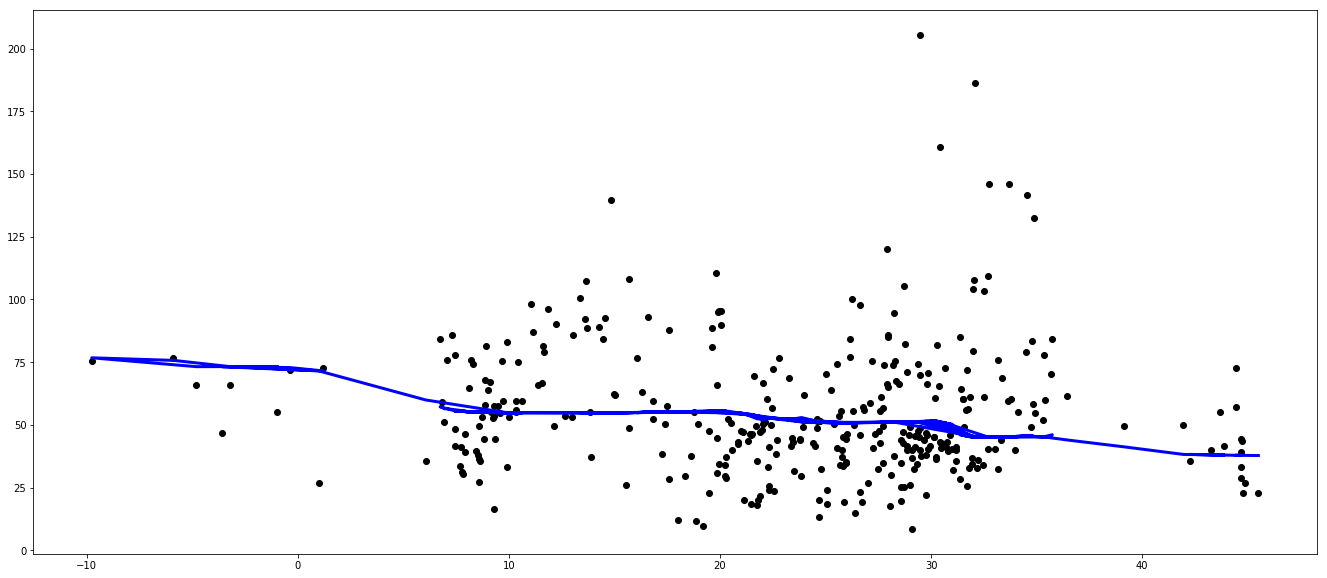

Random Forest: Home C Hourly MAE:  19.019180539870792


In [529]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[best_temperature_df.columns[0]], power_test,  color='black')
plt.plot(temp_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)
plt.show()

print("Random Forest: Home C Hourly MAE: ",error)
hchourlymae.append(error)
randomforest_type.append("Home C Hourly")
randomforest_mae.append(error)

In [530]:
best_temperature_df, depth = getBestRandomForestDF(homef_hourly_df, 8040, 'f')
power = homef_hourly_df[['Usage [kW]']]
power_train = power[0:8040]
power_test = power[8040:]
temp_train = best_temperature_df[0:8040]
temp_test = best_temperature_df[8040:]
regr = RandomForestRegressor(max_depth=depth)  
regr.fit(temp_train, power_train)
kw_prediction = regr.predict(temp_test)
error = mean_absolute_error(power_test, kw_prediction) 

Depth                                        Features  MAE error
0       1  'temperature','apparentTemperature','dewPoint'  51.658190
1       1             'temperature','apparentTemperature'  51.579616
2       1                                   'temperature'  51.644760
3       1                           'apparentTemperature'  51.609186
4       1                                      'dewPoint'  50.929552
..    ...                                             ...        ...
65     10                                   'temperature'  48.372924
66     10                           'apparentTemperature'  47.867240
67     10                                      'dewPoint'  48.566586
68     10                'apparentTemperature','dewPoint'  43.635945
69     10                        'temperature','dewPoint'  46.188182

[70 rows x 3 columns]

Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 9


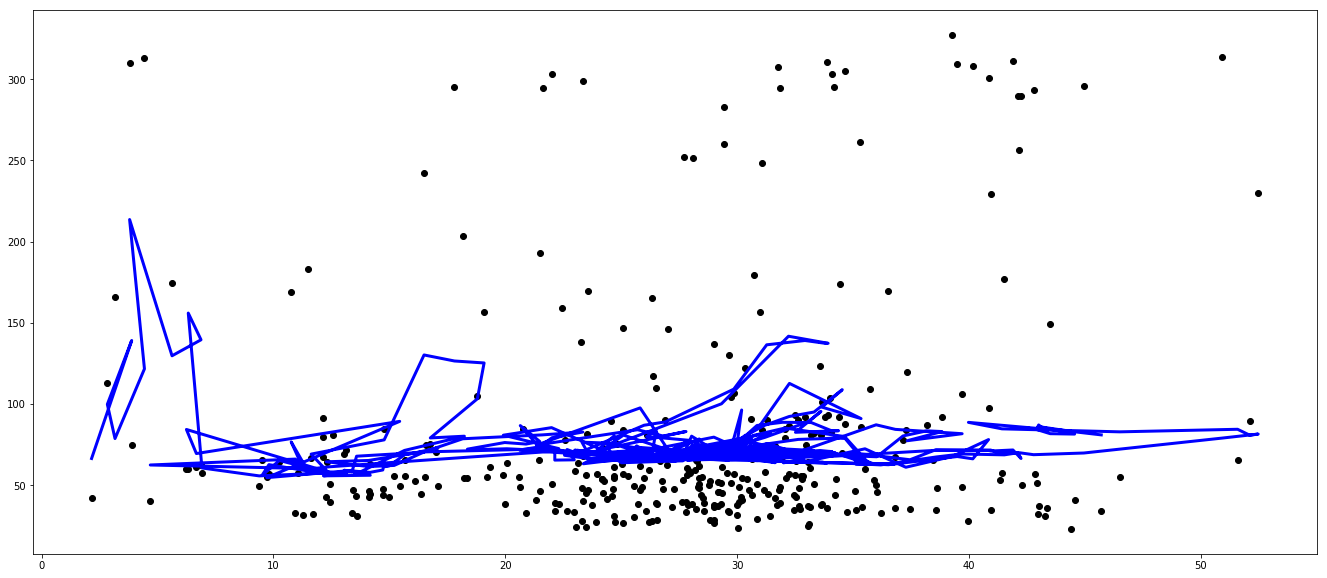

Random Forest: Home F Hourly MAE:  43.40657738761296


In [531]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[best_temperature_df.columns[0]], power_test,  color='black')
plt.plot(temp_test[best_temperature_df.columns[0]], kw_prediction, color='blue', linewidth=3)
plt.show()

print("Random Forest: Home F Hourly MAE: ",error)
hfhourlymae.append(error)
randomforest_type.append("Home F Hourly")
randomforest_mae.append(error)

# # # Daily

In [532]:
inputdf = homeb_daily_df.copy()
power = inputdf[['use [kW]']]
temperature,depth = getBestRandomForestDF(homeb_daily_df, 334, 'b')
power_train = power[0:334]
power_test = power[334:]
temp_train = temperature[0:334]
temp_test = temperature[334:]
regr = RandomForestRegressor(max_depth=depth)  
model = regr.fit(temp_train, power_train)
validationpred = regr.predict(temp_test)
validationerror= mean_absolute_error(power_test, validationpred)

Depth                                        Features  MAE error
0       1  'temperature','apparentTemperature','dewPoint'   6.145249
1       1             'temperature','apparentTemperature'   6.158797
2       1                                   'temperature'   6.134767
3       1                           'apparentTemperature'   6.136648
4       1                                      'dewPoint'   6.138086
..    ...                                             ...        ...
65     10                                   'temperature'   8.410528
66     10                           'apparentTemperature'   7.132903
67     10                                      'dewPoint'   7.300636
68     10                'apparentTemperature','dewPoint'   7.294918
69     10                        'temperature','dewPoint'   8.084975

[70 rows x 3 columns]

Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 1


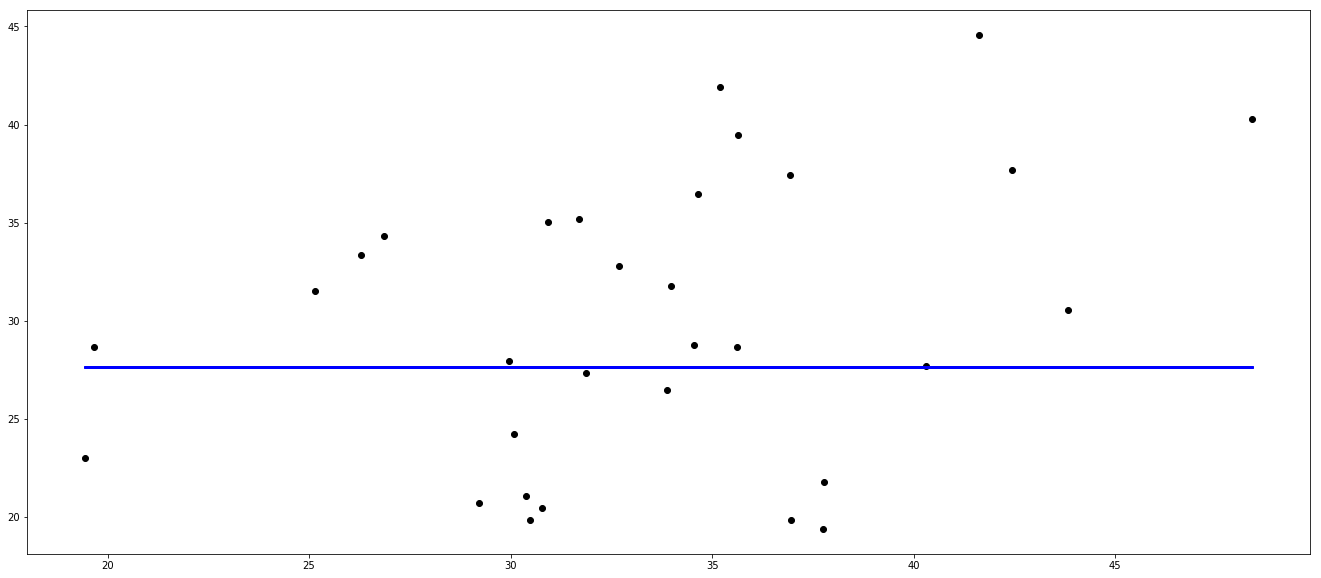

Random Forest: Home B Daily MAE:  6.165902278089001


In [533]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[temperature.columns[0]], power_test,  color='black')
plt.plot(temp_test[temperature.columns[0]], validationpred, color='blue', linewidth=3)
plt.show()

hbdailymae.append(validationerror)
print("Random Forest: Home B Daily MAE: ",validationerror)
randomforest_type.append("Home B Daily")
randomforest_mae.append(validationerror)

In [534]:
inputdf = homec_daily_df.copy()
power = inputdf[['use [kW]']]
temperature,depth = getBestRandomForestDF(homec_daily_df, 335, 'c')
power_train = power[0:335]
power_test = power[335:]
temp_train = temperature[0:335]
temp_test = temperature[335:]
regr = RandomForestRegressor(max_depth=depth)  
model = regr.fit(temp_train, power_train)
validationpred = regr.predict(temp_test)
validationerror= mean_absolute_error(power_test, validationpred)

Depth                                        Features   MAE error
0       1  'temperature','apparentTemperature','dewPoint'  250.340273
1       1             'temperature','apparentTemperature'  252.915067
2       1                                   'temperature'  248.554672
3       1                           'apparentTemperature'  250.373832
4       1                                      'dewPoint'  242.210027
..    ...                                             ...         ...
65     10                                   'temperature'  202.345232
66     10                           'apparentTemperature'  229.272500
67     10                                      'dewPoint'  214.851461
68     10                'apparentTemperature','dewPoint'  225.526382
69     10                        'temperature','dewPoint'  213.552190

[70 rows x 3 columns]

Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 5


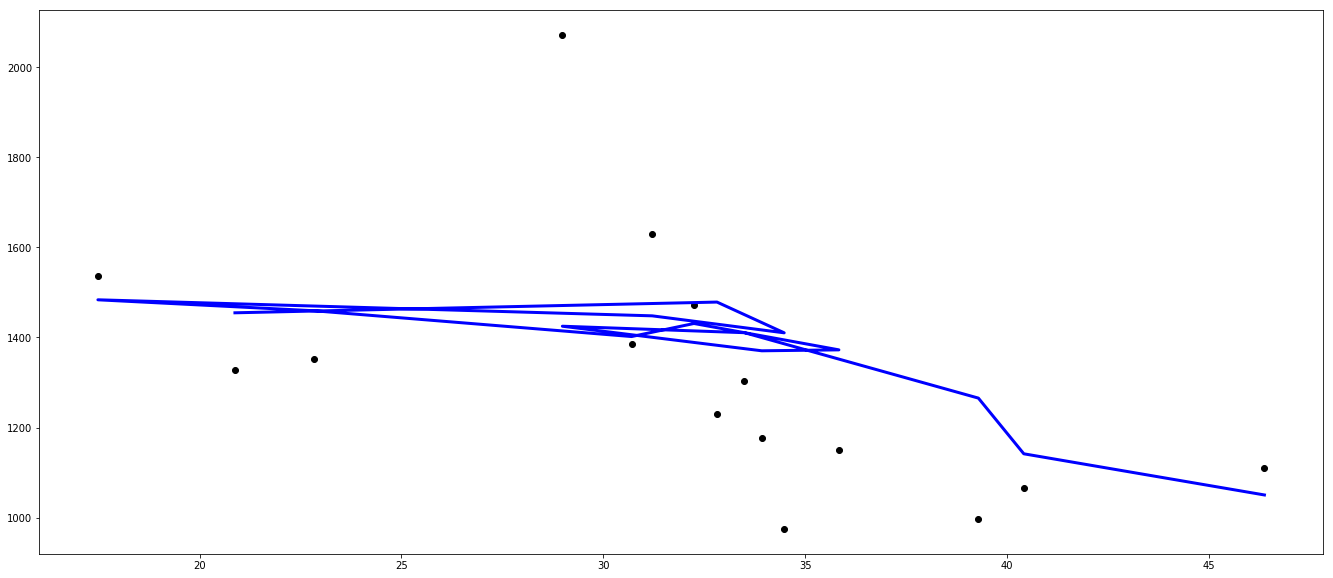

Random Forest: Home C Daily MAE:  185.65851429022263


In [535]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[temperature.columns[0]], power_test,  color='black')
plt.plot(temp_test[temperature.columns[0]], validationpred, color='blue', linewidth=3)
plt.show()

hcdailymae.append(validationerror)
print("Random Forest: Home C Daily MAE: ",validationerror)
randomforest_type.append("Home C Daily")
randomforest_mae.append(validationerror)

In [536]:
inputdf = homef_daily_df.copy()
power = inputdf[['Usage [kW]']]

temperature,depth = getBestRandomForestDF(homef_daily_df, 335, 'f')
print(temperature.columns)
print("Best Depth", depth)
power_train = power[0:335]
power_test = power[335:]
temp_train = temperature[0:335]
temp_test = temperature[335:]
regr = RandomForestRegressor(max_depth=depth)  
model = regr.fit(temp_train, power_train)
validationpred = regr.predict(temp_test)
validationerror= mean_absolute_error(power_test, validationpred)

Depth                                        Features   MAE error
0       1  'temperature','apparentTemperature','dewPoint'  373.743283
1       1             'temperature','apparentTemperature'  372.490589
2       1                                   'temperature'  373.225503
3       1                           'apparentTemperature'  372.250236
4       1                                      'dewPoint'  374.285867
..    ...                                             ...         ...
65     10                                   'temperature'  408.634875
66     10                           'apparentTemperature'  414.468514
67     10                                      'dewPoint'  411.664061
68     10                'apparentTemperature','dewPoint'  422.068648
69     10                        'temperature','dewPoint'  404.169133

[70 rows x 3 columns]

Index(['dewPoint'], dtype='object')
Best Depth 2


Index(['apparentTemperature', 'dewPoint'], dtype='object')
Best Depth 2


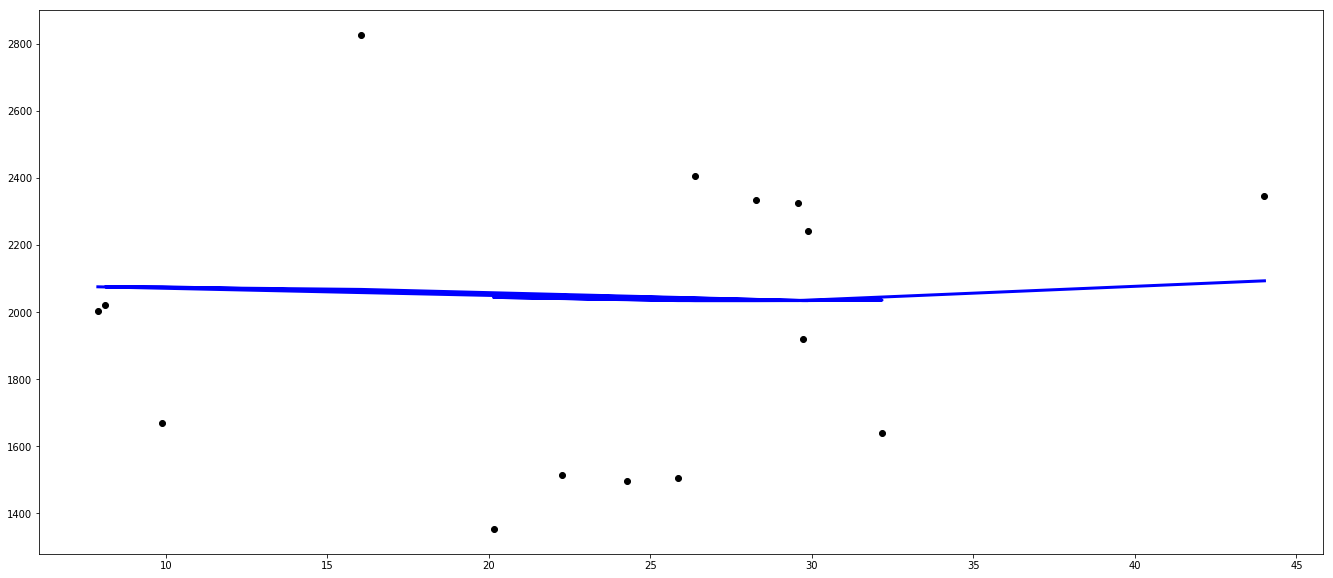

Random Forest: Home F Daily MAE:  367.66454960217743


In [537]:
print(best_temperature_df.columns)
print("Best Depth", depth)

plt.figure(figsize=(23,10))
plt.scatter(temp_test[temperature.columns[0]], power_test,  color='black')
plt.plot(temp_test[temperature.columns[0]], validationpred, color='blue', linewidth=3)
plt.show()

hfdailymae.append(validationerror)
print("Random Forest: Home F Daily MAE: ",validationerror)
randomforest_type.append("Home F Daily")
randomforest_mae.append(validationerror)

In [538]:
print("Random Forest Method")

comparison = pd.DataFrame({
        'Type': randomforest_type,
        'MAE': randomforest_mae,
    })

display(comparison)

Random Forest Method


Type         MAE
0  Home B Hourly    0.478176
1  Home C Hourly   19.019181
2  Home F Hourly   43.406577
3   Home B Daily    6.165902
4   Home C Daily  185.658514
5   Home F Daily  367.664550

# # ARIMA

ARIMA - ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values. It has got hyperparameters like 'p' which is the order of the Auto Regressive (AR only) term, 'q' which is the order of the Moving Average (MA) term, d is the number of differencing required to make the time series stationary. In the ARIMA model trained below, I am tuning p and d values.

The data is divided into training (January - November) and test (December) sets. We fine tune our hyperparameters, like "p" and "d" in the order component. This chosen optimal model is then used for prediction of test data.

In [539]:
models.append("ARIMA")
arima_type=[]
arima_mae=[]

def GetBestModel(train, test, home, split, hourly):
    ypredicted=[]
    optimalp =0
    optimald = 0
    leasterror = float("inf")
    for p in range(0,10):
        for d in range(0,2):
            newmodel = ARIMA(train, order=(p,d,0))
            model_fit = newmodel.fit(disp=0)
            
            if (home == 'b'):
                if (hourly):
                    ypredicted = model_fit.predict(start=split, end=(split+742))
                else:
                    ypredicted = model_fit.predict(start=split, end=(split+30))
            if (home =='c'):
                if (hourly):
                    ypredicted = model_fit.predict(start=split, end=(split+357))
                else:
                    ypredicted = model_fit.predict(start=split, end=(split+14))
            if (home == 'f'):
                if (hourly):
                    ypredicted = model_fit.predict(start=split, end=(split+357))
                else:
                    ypredicted = model_fit.predict(start=split, end=(split+14))
                
            error = mean_absolute_error(test, ypredicted)
            if(error<leasterror):
                leasterror = error
                optimalp = p
                optimald = d
    
    return optimalp,optimald

# # # Hourly

In [540]:
meter_data = homeb_hourly_df[['use [kW]']].values
train = meter_data[:8016]
test = meter_data[8016:]
optimalp,optimald = GetBestModel(train, test,'b',8016, True)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=8016, end=8758)
error = mean_absolute_error(test, ypredicted)
hbhourlymae.append(error)
print("ARIMA: Home B Hourly MAE : ", error)

Best P Value: 6
Best D Value: 0
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 8016
Model:                     ARMA(6, 0)   Log Likelihood              -11239.685
Method:                       css-mle   S.D. of innovations              0.983
Date:                Mon, 15 Mar 2021   AIC                          22495.370
Time:                        18:20:31   BIC                          22551.284
Sample:                             0   HQIC                         22514.507
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3330      0.034     39.235      0.000       1.266       1.400
ar.L1.y        0.6481      0.011     58.033      0.000       0.626       0.670
ar.L2.y       -0.000

ARIMA: Home B Hourly MAE :  0.5215727419346186


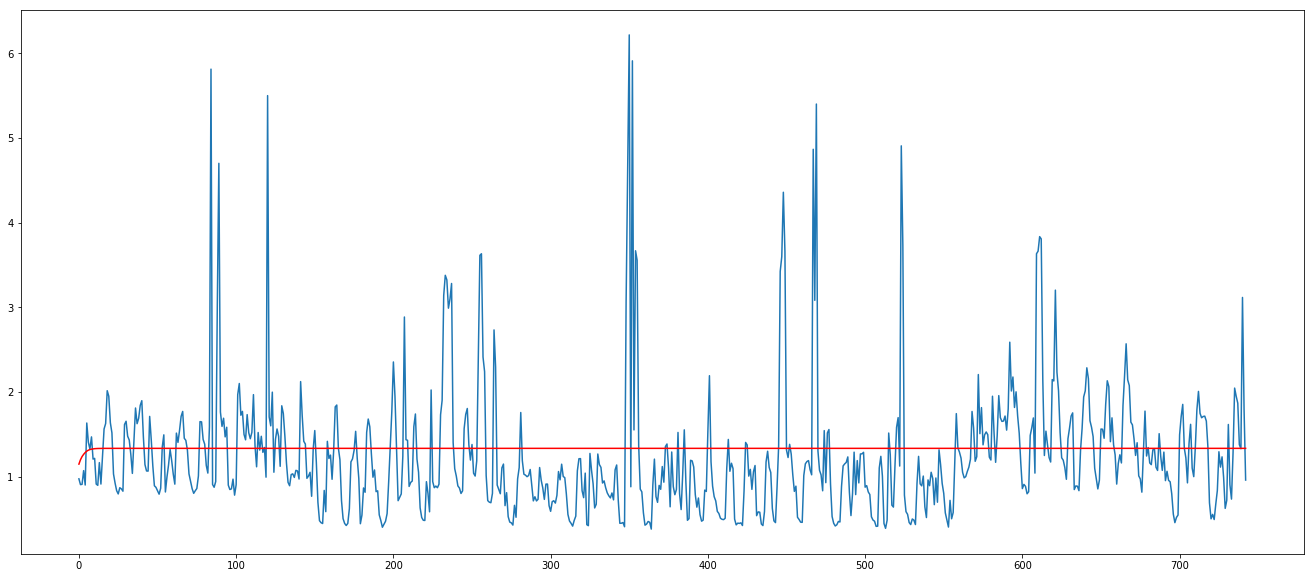

In [541]:
print("ARIMA: Home B Hourly MAE : ", error)
arima_type.append("Home B Hourly")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [542]:
meter_data = homec_hourly_df[['use [kW]']].values
train = meter_data[:8040]
test = meter_data[8040:]
optimalp,optimald = GetBestModel(train, test,'c', 8040, True)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=8040, end=8397)
error = mean_absolute_error(test, ypredicted)
hchourlymae.append(error)
print("ARIMA: Home C Hourly MAE : ", error)

Best P Value: 1
Best D Value: 0
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 8040
Model:                     ARMA(1, 0)   Log Likelihood              -38955.125
Method:                       css-mle   S.D. of innovations             30.759
Date:                Mon, 15 Mar 2021   AIC                          77916.251
Time:                        18:20:44   BIC                          77937.227
Sample:                             0   HQIC                         77923.429
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3802      1.557     33.000      0.000      48.329      54.432
ar.L1.y        0.7798      0.007    111.730      0.000       0.766       0.793
                    

ARIMA: Home C Hourly MAE :  18.928456207358405


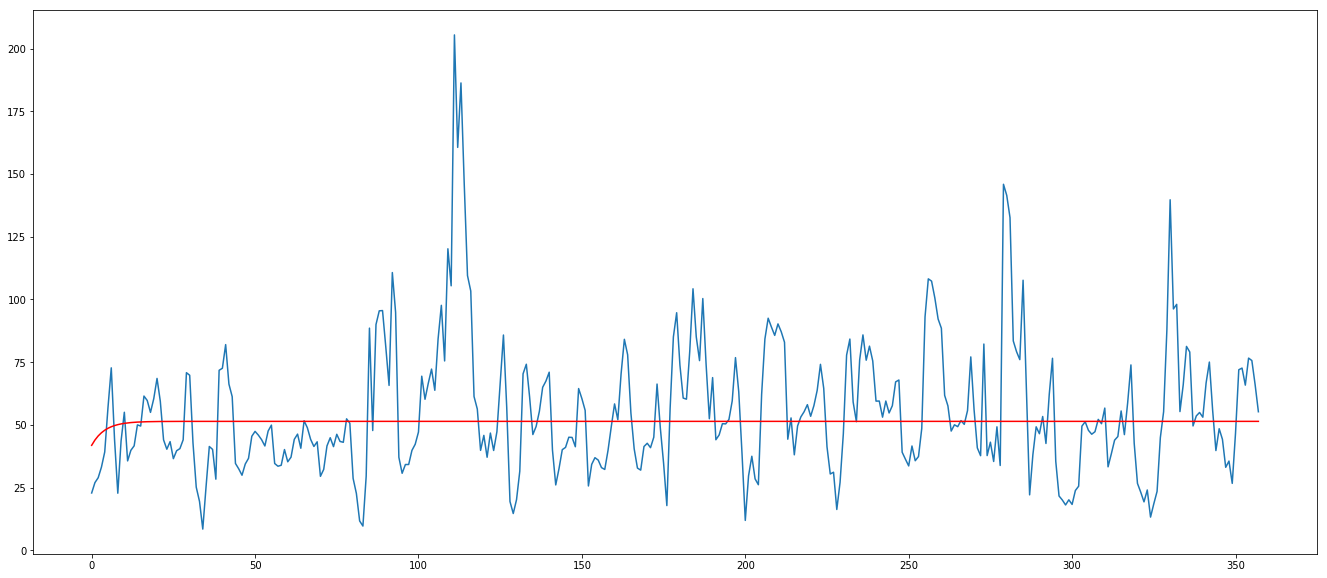

In [543]:
print("ARIMA: Home C Hourly MAE : ", error)
arima_type.append("Home C Hourly")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [544]:
meter_data = homef_hourly_df[['Usage [kW]']].values
train = meter_data[:8040]
test = meter_data[8040:]
optimalp,optimald = GetBestModel(train, test,'f',8040, True)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=8040, end=8397)
error = mean_absolute_error(test, ypredicted)
hfhourlymae.append(error)
print("ARIMA: Home F Hourly MAE : ", error)

Best P Value: 1
Best D Value: 0
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 8040
Model:                     ARMA(1, 0)   Log Likelihood              -44840.932
Method:                       css-mle   S.D. of innovations             63.960
Date:                Mon, 15 Mar 2021   AIC                          89687.865
Time:                        18:20:54   BIC                          89708.841
Sample:                             0   HQIC                         89695.043
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.9622      2.199     44.097      0.000      92.652     101.272
ar.L1.y        0.6757      0.008     82.198      0.000       0.660       0.692
                    

ARIMA: Home F Hourly MAE :  56.83213662554961


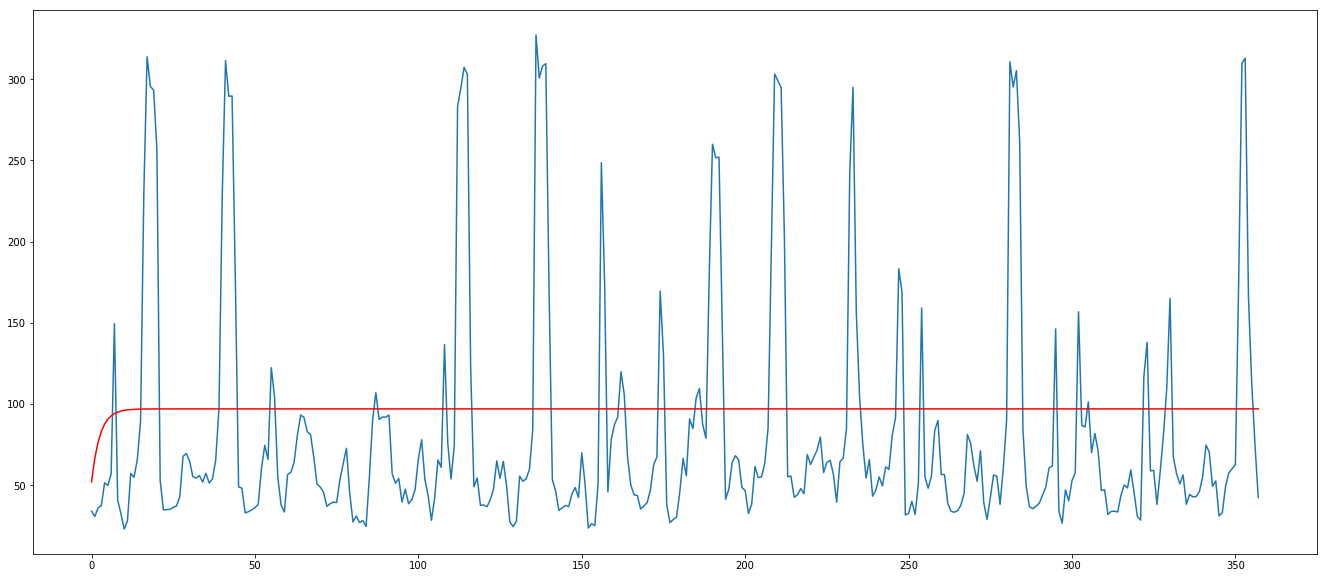

In [545]:
print("ARIMA: Home F Hourly MAE : ", error)
arima_type.append("Home F Hourly")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

# # # Daily

In [546]:
meter_data = homeb_daily_df[['use [kW]']].values
train = meter_data[:334]
test = meter_data[334:]
optimalp,optimald = GetBestModel(train, test, 'b', 334, False)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=334, end=364)
error = mean_absolute_error(test, ypredicted)
hbdailymae.append(error)
print("ARIMA: Home B Daily MAE :", error)

Best P Value: 8
Best D Value: 0
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  334
Model:                     ARMA(8, 0)   Log Likelihood               -1274.597
Method:                       css-mle   S.D. of innovations             10.975
Date:                Mon, 15 Mar 2021   AIC                           2569.194
Time:                        18:21:01   BIC                           2607.305
Sample:                             0   HQIC                          2584.389
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.3542      4.058      7.973      0.000      24.401      40.307
ar.L1.y        0.3818      0.055      6.919      0.000       0.274       0.490
ar.L2.y       -0.009

ARIMA: Home B Daily MAE : 6.1069459127849095


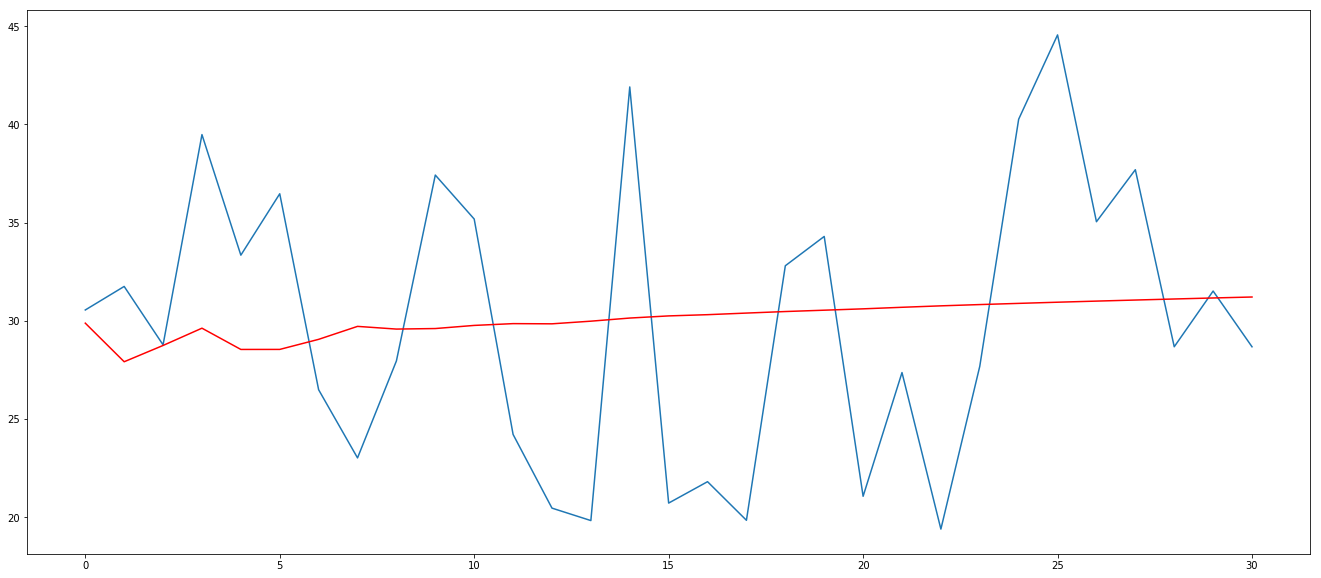

In [547]:
print("ARIMA: Home B Daily MAE :", error)
arima_type.append("Home B Daily")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [548]:
meter_data = homec_daily_df[['use [kW]']].values
train = meter_data[:335]
test = meter_data[335:]
optimalp,optimald = GetBestModel(train, test, 'c', 335, False)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=335, end=349)
error = mean_absolute_error(test, ypredicted)
hcdailymae.append(error)
print("ARIMA: Home C Daily MAE :", error)

Best P Value: 1
Best D Value: 0
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(1, 0)   Log Likelihood               -2579.818
Method:                       css-mle   S.D. of innovations            534.453
Date:                Mon, 15 Mar 2021   AIC                           5165.637
Time:                        18:21:09   BIC                           5177.079
Sample:                             0   HQIC                          5170.199
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1235.0964     79.385     15.558      0.000    1079.504    1390.689
ar.L1.y        0.6341      0.042     15.061      0.000       0.552       0.717
                    

ARIMA: Home C Daily MAE : 195.2155012359685


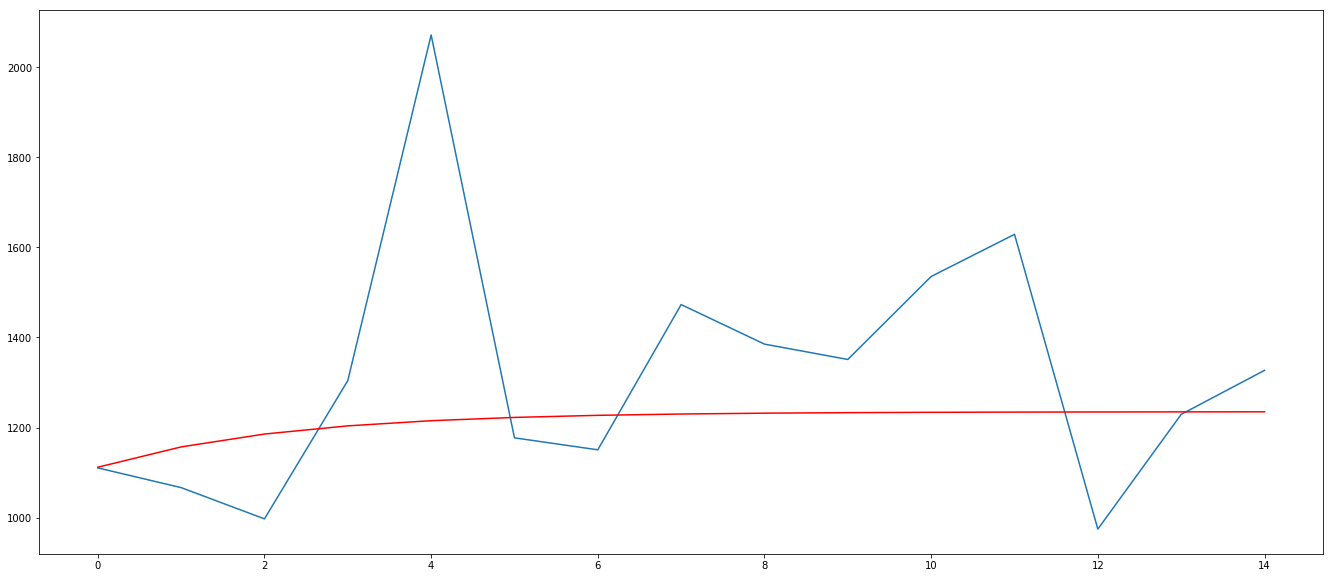

In [549]:
print("ARIMA: Home C Daily MAE :", error)
arima_type.append("Home C Daily")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [550]:
meter_data = homef_daily_df[['Usage [kW]']].values
train = meter_data[:335]
test = meter_data[335:]
optimalp,optimald = GetBestModel(train, test, 'f', 335, False)
print("Best P Value:", optimalp)
print("Best D Value:", optimald)
model = ARIMA(train, order=(optimalp,optimald,0))
model_fit = model.fit()
print(model_fit.summary())
ypredicted = model_fit.predict(start=335, end=349)
error = mean_absolute_error(test, ypredicted)
hfdailymae.append(error)
print("ARIMA: Home F Daily MAE :", error)

Best P Value: 6
Best D Value: 0
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  335
Model:                     ARMA(6, 0)   Log Likelihood               -2566.787
Method:                       css-mle   S.D. of innovations            513.856
Date:                Mon, 15 Mar 2021   AIC                           5149.574
Time:                        18:21:18   BIC                           5180.087
Sample:                             0   HQIC                          5161.739
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2313.3857    111.595     20.730      0.000    2094.664    2532.108
ar.L1.y        0.4650      0.053      8.746      0.000       0.361       0.569
ar.L2.y       -0.027

ARIMA: Home F Daily MAE : 395.0910409377559


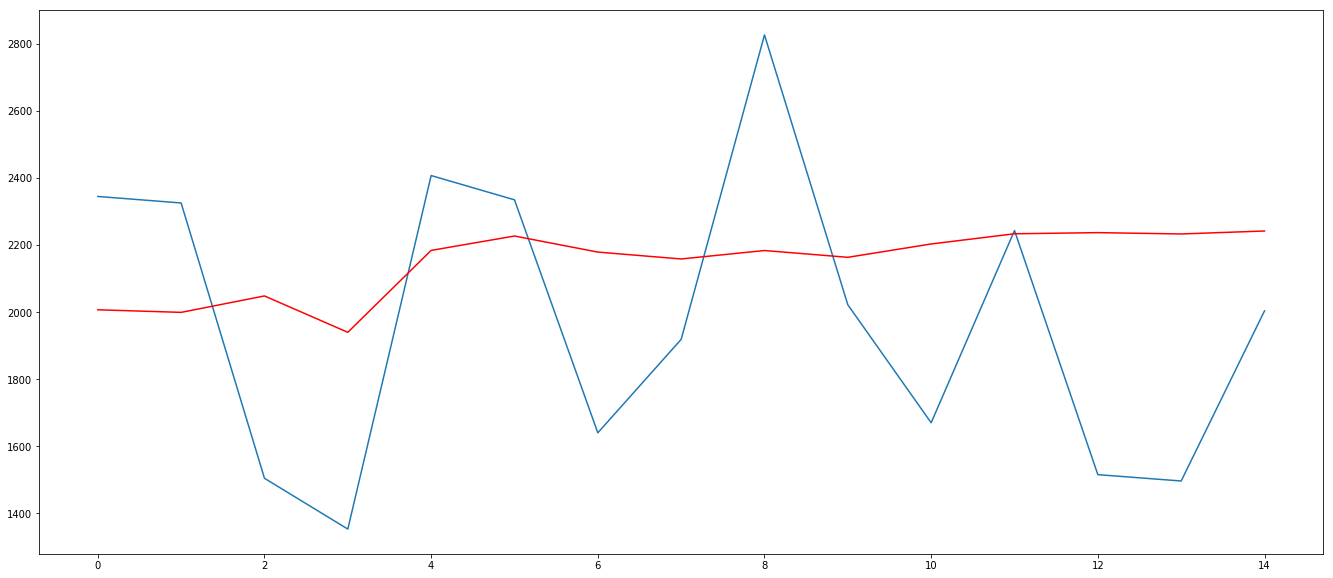

In [551]:
print("ARIMA: Home F Daily MAE :", error)
arima_type.append("Home F Daily")
arima_mae.append(error)
plt.figure(figsize=(23,10))
plt.plot(test)
plt.plot(ypredicted, color='red')
plt.show()

In [552]:
comparison = pd.DataFrame({
    'Type': arima_type,
    'MAE': arima_mae,
})
print("ARIMA: MEAN ABSOLUTE ERROR:")
display(comparison)

ARIMA: MEAN ABSOLUTE ERROR:


Type         MAE
0  Home B Hourly    0.521573
1  Home C Hourly   18.928456
2  Home F Hourly   56.832137
3   Home B Daily    6.106946
4   Home C Daily  195.215501
5   Home F Daily  395.091041

# # Result

In [553]:
models.append("Mean MAE")
hbhourlymae.append((hbhourlymae[0]+hbhourlymae[1]+hbhourlymae[2]+hbhourlymae[3]+hbhourlymae[4])/5)
hchourlymae.append((hchourlymae[0]+hchourlymae[1]+hchourlymae[2]+hchourlymae[3]+hchourlymae[4])/5)
hfhourlymae.append((hfhourlymae[0]+hfhourlymae[1]+hfhourlymae[2]+hfhourlymae[3]+hfhourlymae[4])/5)
hbdailymae.append((hbdailymae[0]+hbdailymae[1]+hbdailymae[2]+hbdailymae[3]+hbdailymae[4])/5)
hcdailymae.append((hcdailymae[0]+hcdailymae[1]+hcdailymae[2]+hcdailymae[3]+hcdailymae[4])/5)
hfdailymae.append((hfdailymae[0]+hfdailymae[1]+hfdailymae[2]+hfdailymae[3]+hfdailymae[4])/5)
finalcomparison = pd.DataFrame({
    'Model': models,
    'House B:Hourly': hbhourlymae,
    'House C:Hourly': hchourlymae,
    'House F:Hourly': hfhourlymae,
    'House B:Daily': hbdailymae,
    'House C:Daily': hcdailymae,
    'House F:Daily': hfdailymae,
})
print("MEAN ABSOLUTE ERROR:")
display(finalcomparison)

MEAN ABSOLUTE ERROR:


Model  House B:Hourly  House C:Hourly  House F:Hourly  \
0              Naive        0.479529       21.314183       52.485079   
1  Linear Regression        0.461046       18.970539       42.508479   
2            XGBoost        0.490824       18.937385       44.468650   
3      Random Forest        0.478176       19.019181       43.406577   
4              ARIMA        0.521573       18.928456       56.832137   
5           Mean MAE        0.486230       19.433949       47.940184   

   House B:Daily  House C:Daily  House F:Daily  
0       6.272364     292.763913     412.652921  
1       5.946851     216.661517     358.774926  
2       7.653215     220.129492     367.194634  
3       6.165902     185.658514     367.664550  
4       6.106946     195.215501     395.091041  
5       6.429056     222.085788     380.275614

Comparing the mean absolute error for all our models. 

All the models almost performed well than the Naive model. There were certain cases where Naive performed better than the model selected in case for Hourly Home B prediction which could be due to the less variance of the data when compared to november and december data to the whole year data. But the other models did fairly well when compared to our baseline model. 

For the time series prediction model - ARIMA, the mean absolute error was slightly on a higher side than random forest and linear regression. Among non time series model, XGBoost did not perform well whereas Random Forest worked the best.

Other traditional models whch could be used were moving average, exponential smoothnening, Holt's linear trend and Winters method. Among time-series, SARIMA, Facebook's Prophet can be used which could have given better results than the used time series ARIMA model. SARIMA is an improvement of the ARIMA method where it takes seasonality into account as well.  

Random forest gave the lowest mean absolute error in cases where the values were high and almost similar values with Linear Regression where values were low. It performed well across all the hourly and daily energy house predictions.

For Home B Hourly, Linear Regression performed best.
For Home B Daily, Linear Regression performed best.
For Home C Hourly, ARIMA performed best.
For Home C Daily, Random Forest performed best
For Home F Hourly, Linear Regression performed best.
For Home F Daily, Linear Regression performed best.